['_unit_id', 'context', 'relation_gold', 'relation_gold_reason', 'sentence_1', 'sentence_2', 'speaker_1', 'speaker_2', 'topic']
24711
4104
147
411


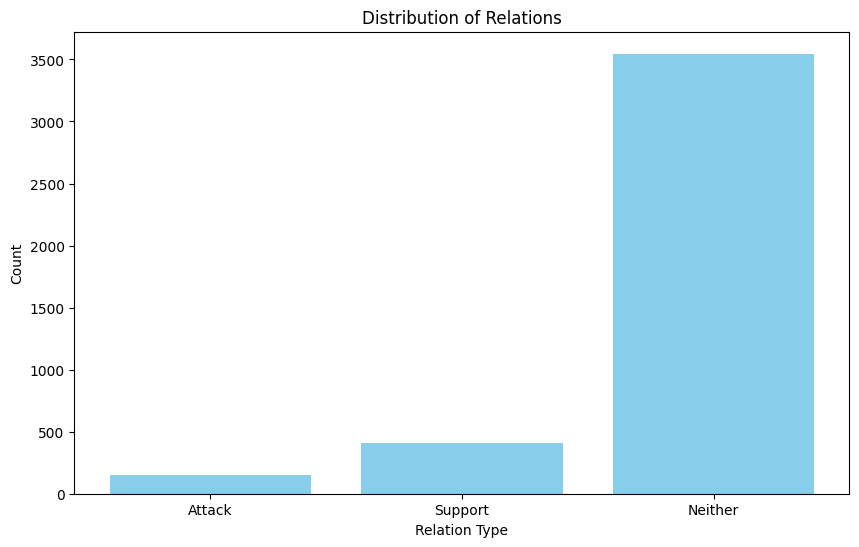

In [3]:
import csv
import matplotlib.pyplot as plt
import re
import random

dataset  = "full_dataset.csv"
#_unit_id,_golden,_missed,_tainted,_trust,_worker_id,confidence,relation,orig__golden,context,pair_id,relation_gold,
#relation_gold_reason,sentence_1,sentence_2,speaker_1,speaker_2,topic

#_unit_id,context,relation_gold,relation_gold_reason,sentence_1,sentence_2,speaker_1,speaker_2,topic

with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)

     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    reat = 0
    resu = 0
    rene = 0
    
    cur_u = lignes[1][0]
    for ligne in lignes[1:]:
        if cur_u == ligne[0]:
            if (ligne[7] == 'Attack' or ligne[7] == 'attack'):
                reat+= int(ligne[6])*float(ligne[4])
            elif (ligne[7] == 'Support' or ligne[7] == 'support'):
                resu+= int(ligne[6])*float(ligne[4])
            elif (ligne[7] == 'Neither' or ligne[7] == 'neither'):
                rene+= int(ligne[6])*float(ligne[4])
        else:
            cur_u = ligne[0]
            m = max(reat,resu,rene)
            if(m==reat):
               rel = 'Attack' 
            elif(m==resu):
                rel = 'Support'
            elif(m==rene):
                rel = 'Neither'
            reat = 0
            resu = 0
            rene = 0
            if ligne[11] not in ['Attack','attack','Support','support','Neither','neither']:
                ligne[11]= rel
    
    new_lignes = []
    lignes[0]= [lignes[0][0], lignes[0][9], lignes[0][11], lignes[0][12], lignes[0][13], lignes[0][14],lignes[0][15],lignes[0][16],lignes[0][17]]
                                                     #11
    print(lignes[0])
    for ligne in lignes[1:]:
        ligne[9] = re.sub(r'<[^>]*>', '', ligne[9])
        ligne= [ligne[0], ligne[9], ligne[11], ligne[12], ligne[13], ligne[14],ligne[15],ligne[16],ligne[17]]
                                    #11
        if new_lignes == []: 
            new_lignes.append(ligne)
        else:
            if ligne[0] != new_lignes[-1][0]:
                if ligne[2]!='  ':
                    new_lignes.append(ligne)
        
print(len(lignes))
print(len(new_lignes))

l=0
j=0
for i in range(len(new_lignes)):
    new_lignes[i] = new_lignes[i][1:]
    if new_lignes[i][1] == 'Attack' or new_lignes[i][1] == 'attack':
        l = l+1
    if new_lignes[i][1] == 'Support' or new_lignes[i][1] == 'support':
        j = j+1

print(l)
print(j)

x = ['Attack','Support','Neither']
y = [l,j,len(new_lignes)-l-j]

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')

plt.xlabel('Relation Type')
plt.ylabel('Count')
plt.title('Distribution of Relations')
plt.show()
#['context', 'relation', 'relation_gold_reason', 'sentence_1', 'sentence_2', 'speaker_1', 'speaker_2', 'topic

# SVM 

## Abstract Argumentation Framework

147
147
Results for linear kernel with k_fold = 5:
Mean Accuracy: 0.584979544126242
Mean Precision: 0.5868938875942271
Mean Recall: 0.5857471264367815
Mean F1 Score: 0.5802736583629391

Confusion Matrix:
 [[17 12]
 [13 16]]


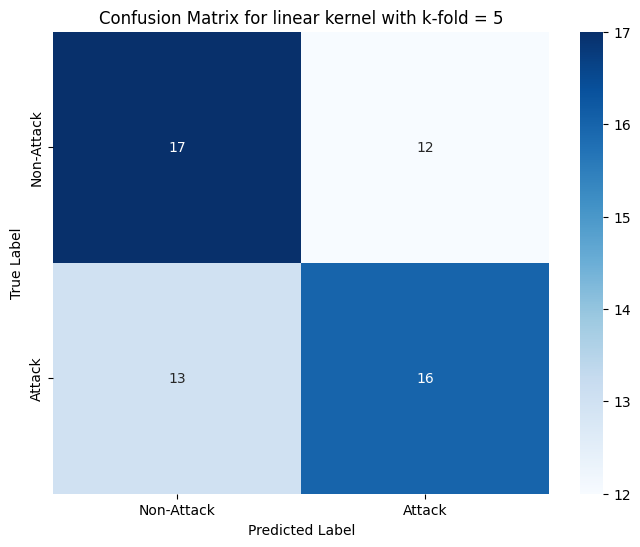

Results for linear kernel with k_fold = 8:
Mean Accuracy: 0.5573385885885886
Mean Precision: 0.5593754075983768
Mean Recall: 0.5581140350877193
Mean F1 Score: 0.5543461697761376

Confusion Matrix:
 [[14  4]
 [ 8 10]]


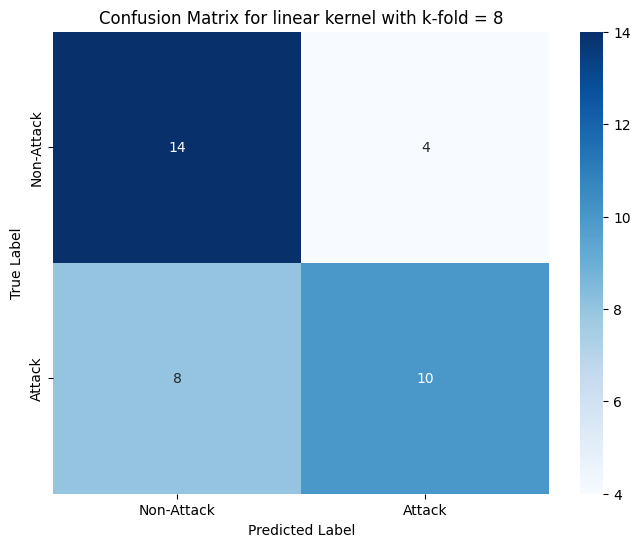

Results for poly kernel with k_fold = 5:
Mean Accuracy: 0.5545295149035652
Mean Precision: 0.560941937464283
Mean Recall: 0.5559770114942528
Mean F1 Score: 0.5365221710838401

Confusion Matrix:
 [[23  6]
 [18 11]]


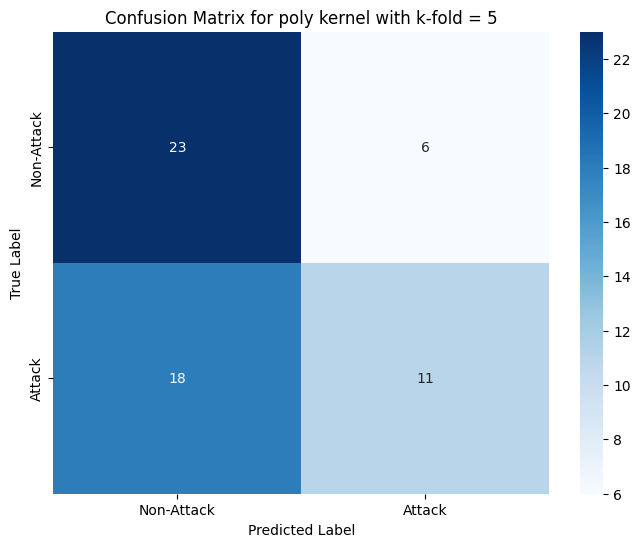

Results for poly kernel with k_fold = 8:
Mean Accuracy: 0.5472972972972974
Mean Precision: 0.5626369450739956
Mean Recall: 0.5486111111111112
Mean F1 Score: 0.530963597519917

Confusion Matrix:
 [[16  2]
 [12  6]]


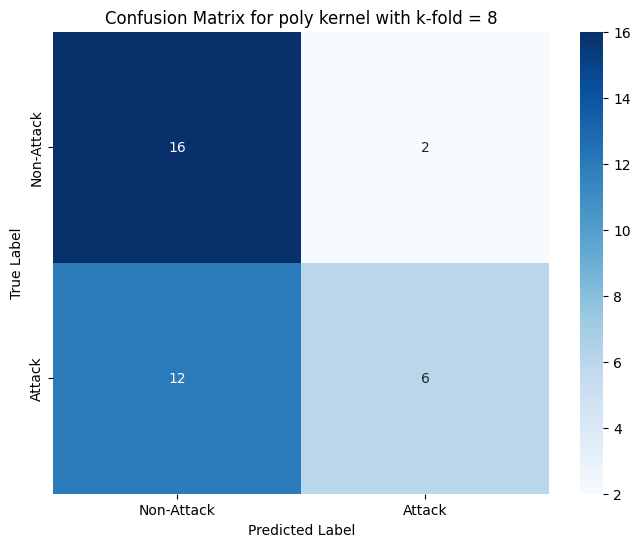

Results for rbf kernel with k_fold = 5:
Mean Accuracy: 0.5781414377556985
Mean Precision: 0.5810299710322612
Mean Recall: 0.5793103448275861
Mean F1 Score: 0.5713184386350747

Confusion Matrix:
 [[16 13]
 [13 16]]


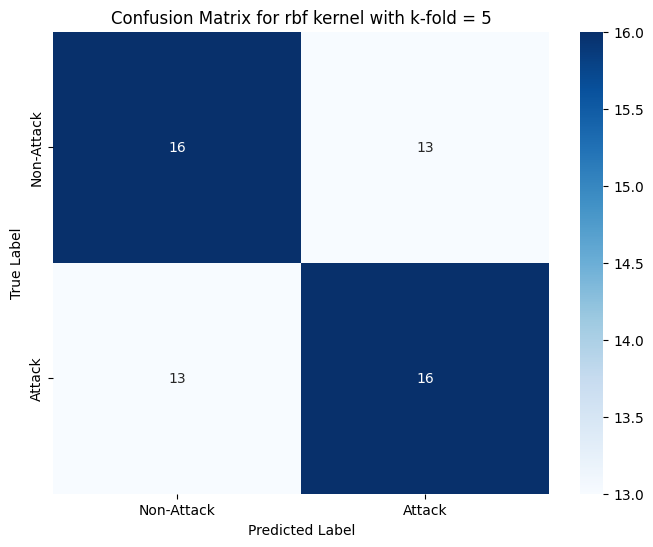

Results for rbf kernel with k_fold = 8:
Mean Accuracy: 0.5574324324324325
Mean Precision: 0.5591622985960212
Mean Recall: 0.5579312865497076
Mean F1 Score: 0.5541316138887143

Confusion Matrix:
 [[14  4]
 [ 7 11]]


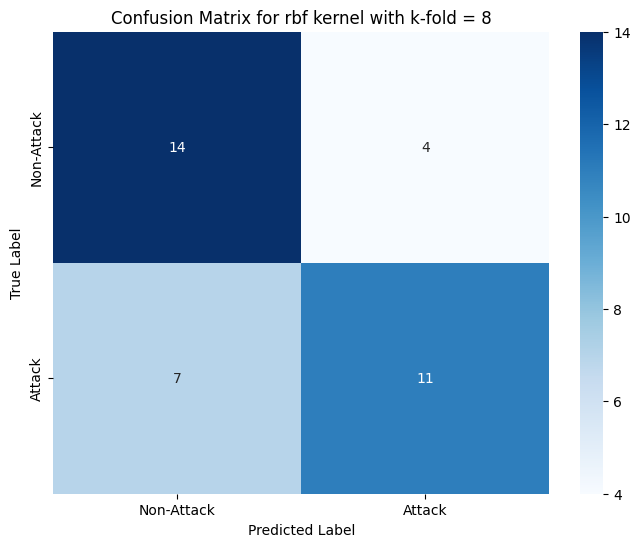

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.5850379894798363
Mean Precision: 0.5869145356540632
Mean Recall: 0.585977011494253
Mean F1 Score: 0.5784852391094082

Confusion Matrix:
 [[18 11]
 [13 16]]


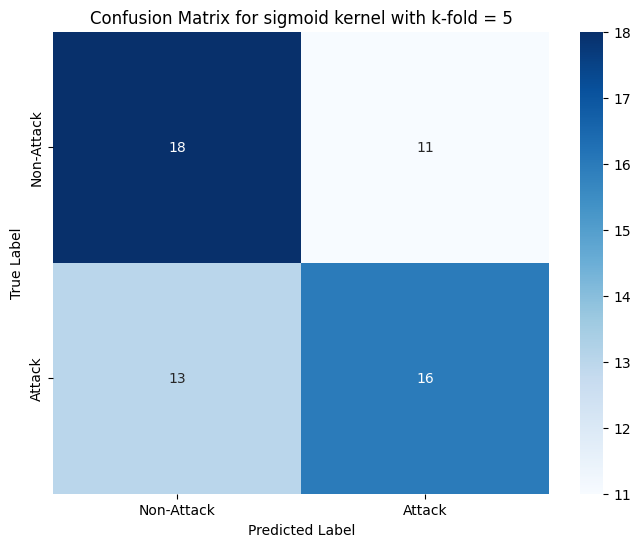

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.5710397897897898
Mean Precision: 0.5725534921122946
Mean Recall: 0.5712719298245614
Mean F1 Score: 0.5682291693231435

Confusion Matrix:
 [[14  4]
 [ 7 11]]


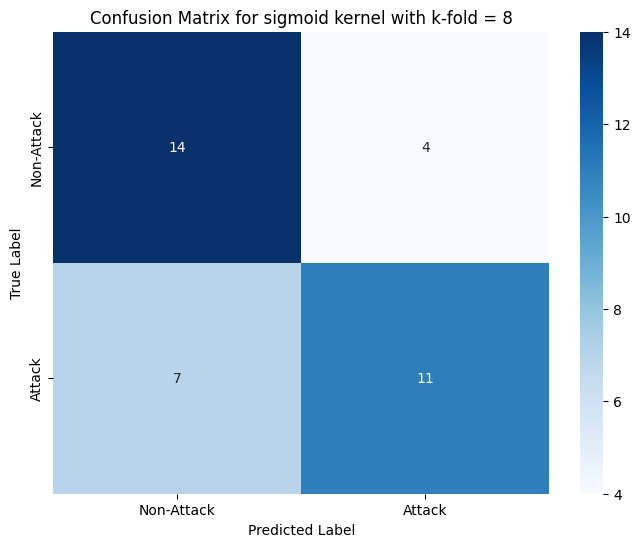

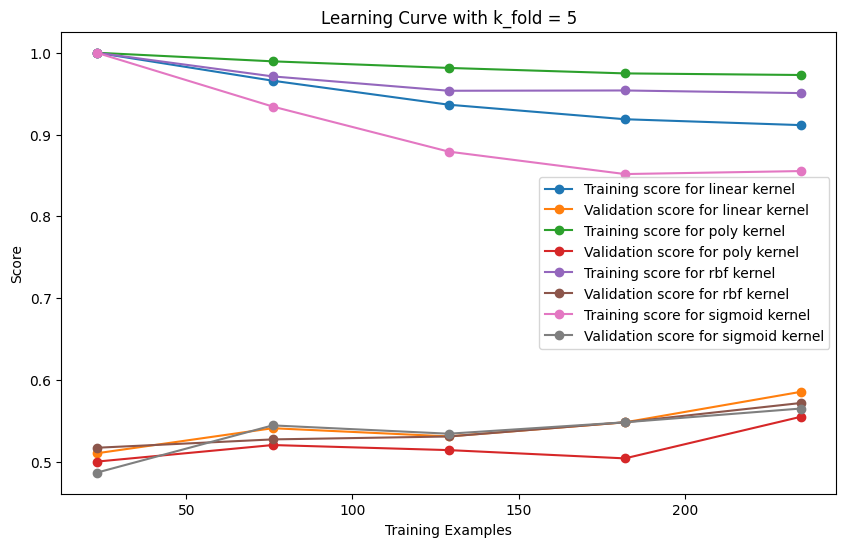

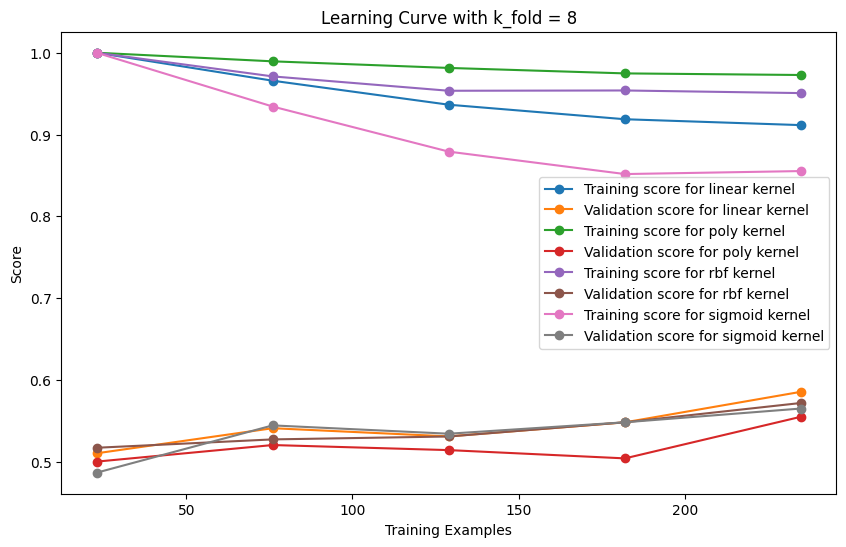

In [5]:
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X = []
y = []
for ligne in new_lignes:
    X.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y.append(1)
    else:  # if equal Neither or Support
        y.append(0)

# Assuming X_baf and y_baf contain your text data and labels, respectively
minority_class = [X[i] for i in range(len(y)) if y[i] == 1]  # First minority class (e.g., Attack)
majority_class = [X[i] for i in range(len(y)) if y[i] == 0]    # Dominant class (e.g., Non-Attack)

# Define the number of samples to match for the majority class
num_majority_class = len(minority_class)

# Randomly sample from the majority class
undersampled_majority_class = random.sample(majority_class, num_majority_class)

# Combine the undersampled majority class with minority classes
X_undersampled = undersampled_majority_class + minority_class
y_undersampled = [0] * num_majority_class + [1] * len(minority_class) 

# Shuffle the data
combined = list(zip(X_undersampled, y_undersampled))
random.shuffle(combined)
X_undersampled, y_undersampled = zip(*combined)

y = y_undersampled
t=0
tt=0
for i in range(len(y)):
    if y[i]==1:
        t+=1
    else: 
        tt+=1
print(t)
print(tt)

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf = []
for ligne in X_undersampled:
    new_l = " ".join(ligne) 
    X_tf.append(new_l)

X_tfidf = vectorizer.fit_transform(X_tf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

# Définition des différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

result = []
accu = 0
train_scores_mean_list_5 = []
train_scores_mean_list_8 = []
val_scores_mean_list_5 = []
val_scores_mean_list_8 = []
lab_5 = []
lab_8 = []

for kernel in kernels:
    result_kernel = []
    for k_fold in k_folds: 
        result_kfold = []
        kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []
    
        # Validation croisée
        for train_index, test_index in kf.split(X_tfidf, y):
            X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            
            # Entraînement du classifieur SVM
            clf = SVC(kernel=kernel, class_weight='balanced')
            clf.fit(X_train, y_train)
            
            # Prédiction sur les données de test
            y_pred = clf.predict(X_test)
            #print(Counter(y_pred))
            
            # Calcul des métriques
            accuracies.append(accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
            recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=1))
            f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=1))

        print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
        print(f"Mean Accuracy: {np.mean(accuracies)}")
        result_kfold.append(np.mean(accuracies))
        if accu<np.mean(accuracies):
            # Save the vectorizer and classifier
            with open('vectorizer_svm_aa.pkl', 'wb') as f:
                pickle.dump(vectorizer, f)
            with open('classifier_svm_aa.pkl', 'wb') as f:
                pickle.dump(clf, f)
        print(f"Mean Precision: {np.mean(precisions)}")
        result_kfold.append(np.mean(precisions))
        print(f"Mean Recall: {np.mean(recalls)}")
        result_kfold.append(np.mean(recalls))
        print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n",conf_matrix)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attack', 'Attack'], yticklabels=['Non-Attack', 'Attack'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"Confusion Matrix for {kernel} kernel with k-fold = {k_fold}")
        plt.show()

        train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)

        if k_fold==5:
            train_scores_mean_list_5.append(train_scores_mean)
            val_scores_mean_list_5.append(val_scores_mean)
            lab_5.append(f"for {kernel} kernel")
        if k_fold==8:
            train_scores_mean_list_8.append(train_scores_mean)
            val_scores_mean_list_8.append(val_scores_mean)
            lab_8.append(f"for {kernel} kernel")

        result_kfold.append(np.mean(f1_scores))
        result_kernel.append(result_kfold)
    result.append(result_kernel)


plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5)):
    lab_train = "Training score " + lab_5[i]
    lab_val = "Validation score "+ lab_5[i]
    plt.plot(train_sizes, train_scores_mean_list_5[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8)):
    lab_train = "Training score " + lab_8[i]
    lab_val = "Validation score "+ lab_8[i]
    plt.plot(train_sizes, train_scores_mean_list_8[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

#### Oversampling

Results for linear kernel with k_fold = 5:
Mean Accuracy: 0.8466666666666667
Mean Precision: 0.6851879699248121
Mean Recall: 0.5166666666666667
Mean F1 Score: 0.49788379472589994

Confusion Matrix:
 [[18  0]
 [ 2  0]]


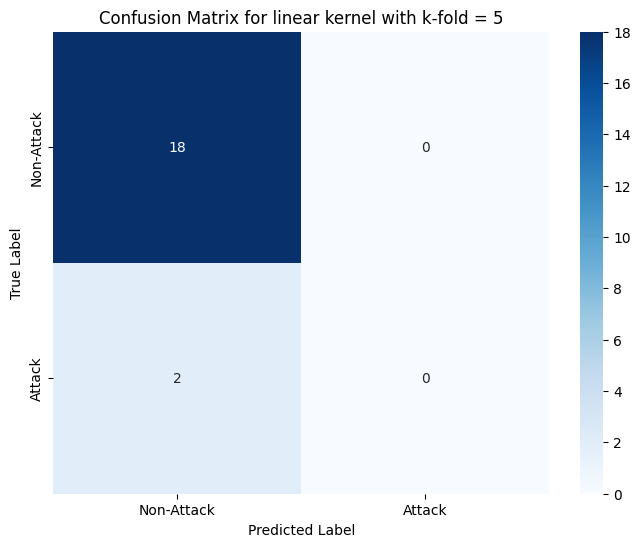

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for linear kernel with k_fold = 8:
Mean Accuracy: 0.8365384615384617
Mean Precision: 0.7462485431235432
Mean Recall: 0.5085227272727273
Mean F1 Score: 0.49586462450592883

Confusion Matrix:
 [[11  0]
 [ 2  0]]


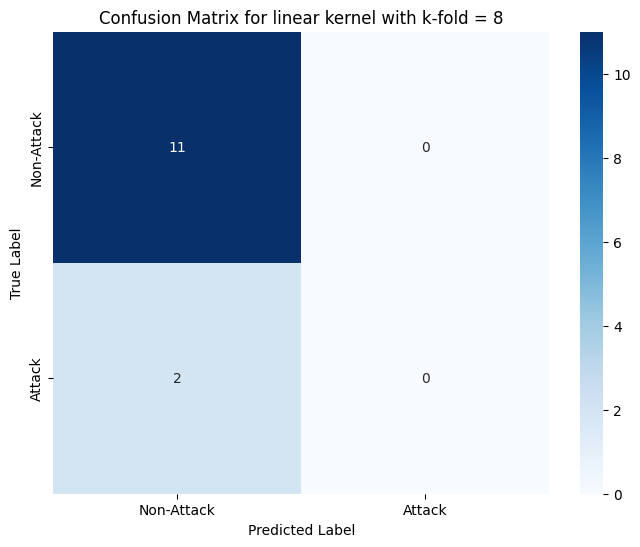

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for poly kernel with k_fold = 5:
Mean Accuracy: 0.8561904761904762
Mean Precision: 0.8321428571428571
Mean Recall: 0.49444444444444446
Mean F1 Score: 0.4611336032388665

Confusion Matrix:
 [[18  0]
 [ 2  0]]


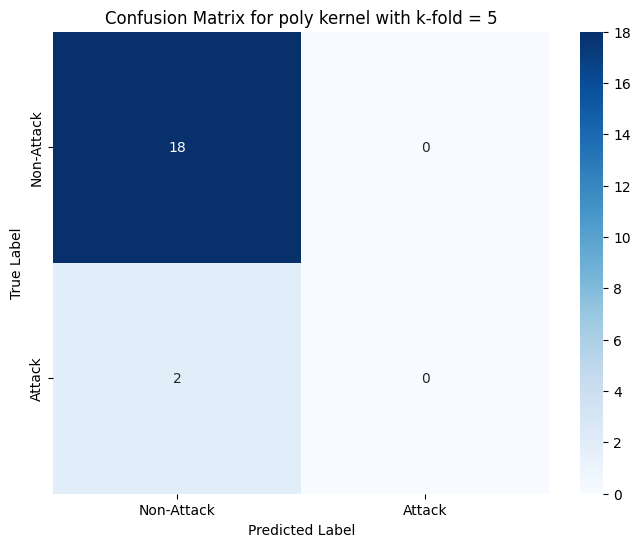

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for poly kernel with k_fold = 8:
Mean Accuracy: 0.8461538461538461
Mean Precision: 0.868444055944056
Mean Recall: 0.48863636363636365
Mean F1 Score: 0.45759469696969696

Confusion Matrix:
 [[11  0]
 [ 2  0]]


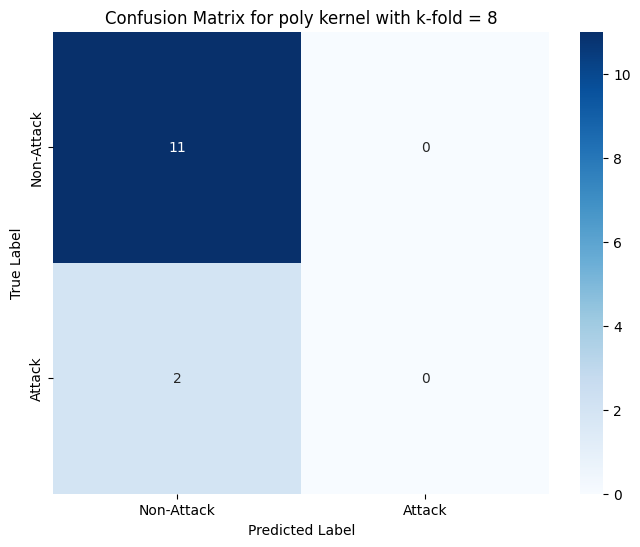

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for rbf kernel with k_fold = 5:
Mean Accuracy: 0.8371428571428572
Mean Precision: 0.6307142857142857
Mean Recall: 0.4833333333333333
Mean F1 Score: 0.45546558704453444

Confusion Matrix:
 [[18  0]
 [ 2  0]]


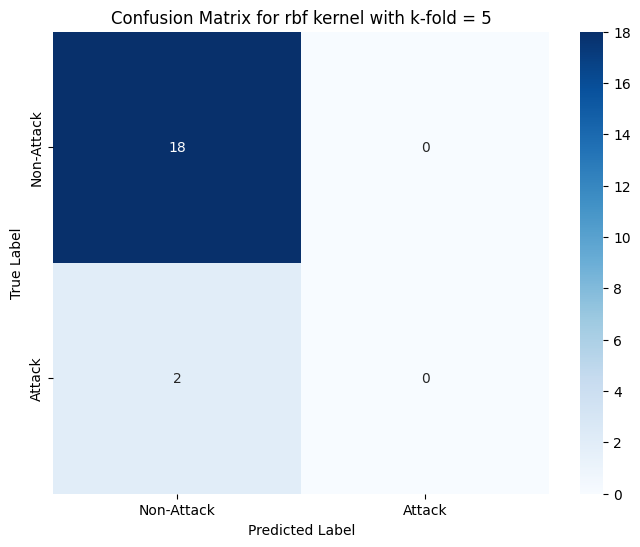

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for rbf kernel with k_fold = 8:
Mean Accuracy: 0.8269230769230769
Mean Precision: 0.741841491841492
Mean Recall: 0.4772727272727273
Mean F1 Score: 0.45170701581027667

Confusion Matrix:
 [[11  0]
 [ 2  0]]


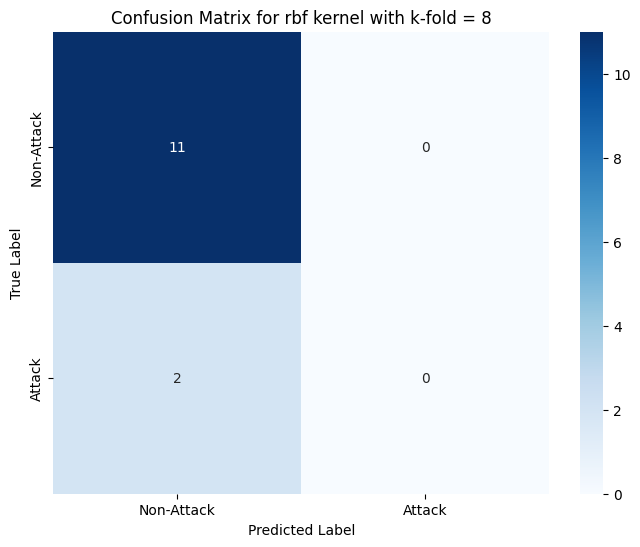

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.8371428571428572
Mean Precision: 0.6679365079365078
Mean Recall: 0.5111111111111111
Mean F1 Score: 0.4882141250562303

Confusion Matrix:
 [[18  0]
 [ 2  0]]


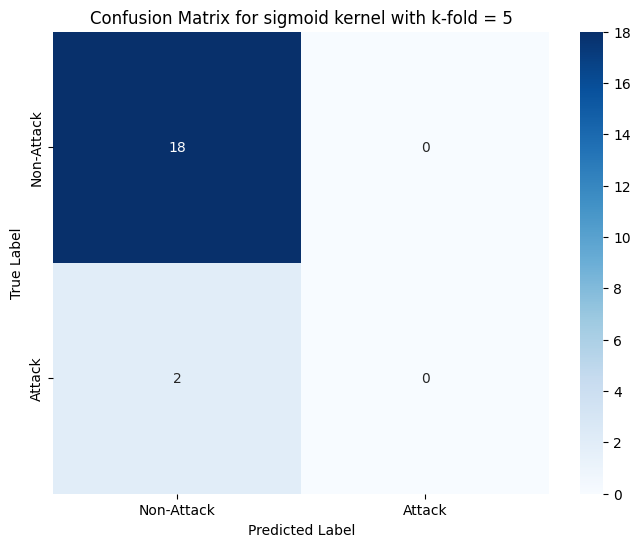

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.8365384615384617
Mean Precision: 0.7462485431235432
Mean Recall: 0.5085227272727273
Mean F1 Score: 0.49586462450592883

Confusion Matrix:
 [[11  0]
 [ 2  0]]


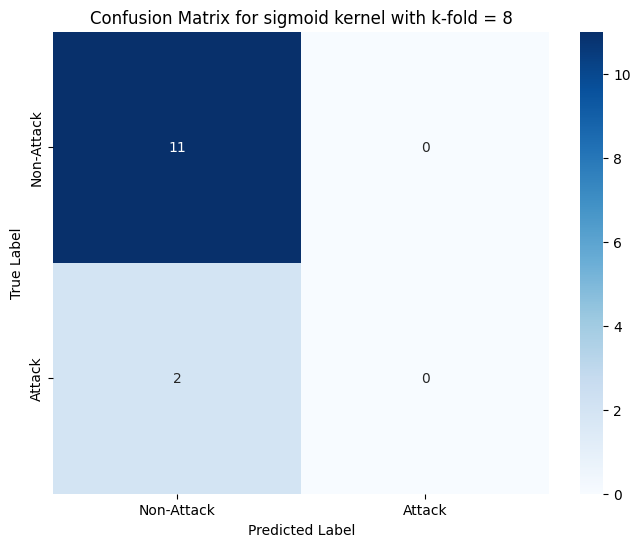

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

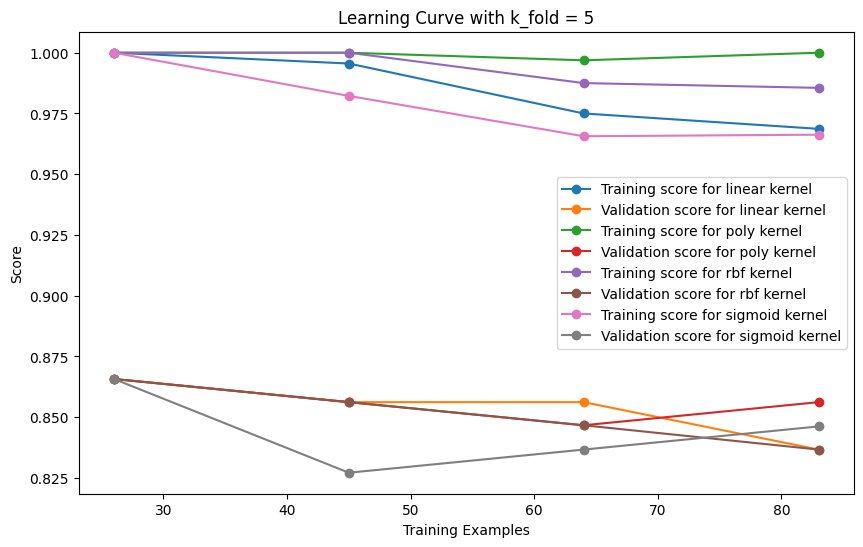

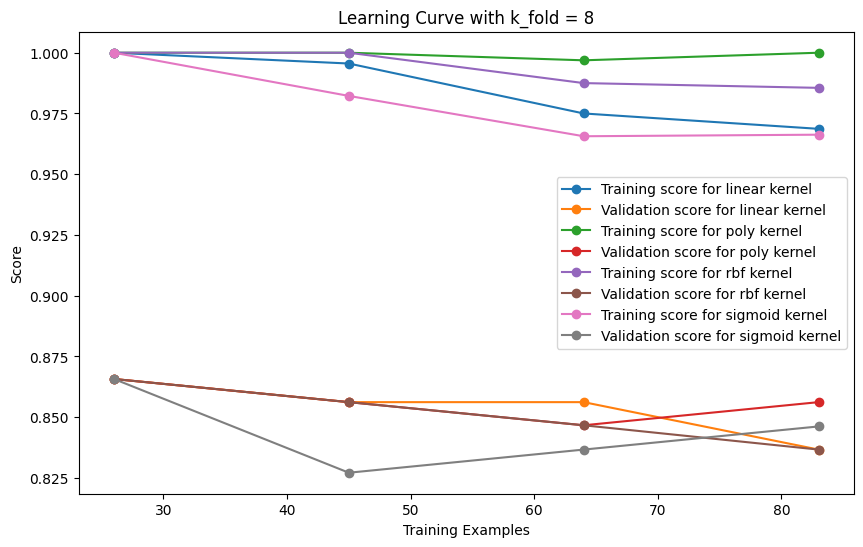

[[[0.8466666666666667, 0.6851879699248121, 0.5166666666666667, 0.49788379472589994], [0.8365384615384617, 0.7462485431235432, 0.5085227272727273, 0.49586462450592883]], [[0.8561904761904762, 0.8321428571428571, 0.49444444444444446, 0.4611336032388665], [0.8461538461538461, 0.868444055944056, 0.48863636363636365, 0.45759469696969696]], [[0.8371428571428572, 0.6307142857142857, 0.4833333333333333, 0.45546558704453444], [0.8269230769230769, 0.741841491841492, 0.4772727272727273, 0.45170701581027667]], [[0.8371428571428572, 0.6679365079365078, 0.5111111111111111, 0.4882141250562303], [0.8365384615384617, 0.7462485431235432, 0.5085227272727273, 0.49586462450592883]]]


In [46]:
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X = []
y = []
for ligne in new_lignes:
    X.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y.append(1)
    else:  # if equal Neither or Support
        y.append(0)


# Assume X and y contain your text data and labels, respectively
minority_class = [X[i] for i in range(len(y)) if y[i] == 1]  # Attack class
majority_class = [X[i] for i in range(len(y)) if y[i] == 0]  # Non-Attack class

# Oversample the minority class
oversample_minority = random.choices(minority_class, k=len(majority_class))

# Combine oversampled minority class with majority class
X_oversampled = majority_class + oversample_minority
y_oversampled = [0] * len(majority_class) + [1] * len(oversample_minority)

# Shuffle the data to mix classes
combined = list(zip(X_oversampled, y_oversampled))
random.shuffle(combined)
X_oversampled, y_oversampled = zip(*combined)

y=y_oversampled

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf = []
for ligne in X_oversampled:
    new_l = " ".join(ligne) 
    X_tf.append(new_l)

X_tfidf = vectorizer.fit_transform(X_tf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

# Définition des différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

result = []
accu = 0
train_scores_mean_list_5 = []
train_scores_mean_list_8 = []
val_scores_mean_list_5 = []
val_scores_mean_list_8 = []
lab_5 = []
lab_8 = []

for kernel in kernels:
    result_kernel = []
    for k_fold in k_folds: 
        result_kfold = []
        kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []
    
        # Validation croisée
        for train_index, test_index in kf.split(X_tfidf, y):
            X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            
            # Entraînement du classifieur SVM
            clf = SVC(kernel=kernel, class_weight='balanced')
            clf.fit(X_train, y_train)
            
            # Prédiction sur les données de test
            y_pred = clf.predict(X_test)
            #print(Counter(y_pred))
            
            # Calcul des métriques
            accuracies.append(accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
            recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=1))
            f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=1))

        print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
        print(f"Mean Accuracy: {np.mean(accuracies)}")
        result_kfold.append(np.mean(accuracies))
        if accu<np.mean(accuracies):
            # Save the vectorizer and classifier
            with open('vectorizer_svm_aa.pkl', 'wb') as f:
                pickle.dump(vectorizer, f)
            with open('classifier_svm_aa.pkl', 'wb') as f:
                pickle.dump(clf, f)
        print(f"Mean Precision: {np.mean(precisions)}")
        result_kfold.append(np.mean(precisions))
        print(f"Mean Recall: {np.mean(recalls)}")
        result_kfold.append(np.mean(recalls))
        print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n",conf_matrix)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attack', 'Attack'], yticklabels=['Non-Attack', 'Attack'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"Confusion Matrix for {kernel} kernel with k-fold = {k_fold}"'Confusion Matrix')
        plt.show()

        train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)

        if k_fold==5:
            train_scores_mean_list_5.append(train_scores_mean)
            val_scores_mean_list_5.append(val_scores_mean)
            lab_5.append(f"for {kernel} kernel")
        if k_fold==8:
            train_scores_mean_list_8.append(train_scores_mean)
            val_scores_mean_list_8.append(val_scores_mean)
            lab_8.append(f"for {kernel} kernel")

        result_kfold.append(np.mean(f1_scores))
        result_kernel.append(result_kfold)
    result.append(result_kernel)


plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5)):
    lab_train = "Training score " + lab_5[i]
    lab_val = "Validation score "+ lab_5[i]
    plt.plot(train_sizes, train_scores_mean_list_5[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8)):
    lab_train = "Training score " + lab_8[i]
    lab_val = "Validation score "+ lab_8[i]
    plt.plot(train_sizes, train_scores_mean_list_8[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()


    
print(result)

### Extraction

In [30]:
import random

# Load the vectorizer and classifier
with open('vectorizer_svm_aa.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier_svm_aa.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_svm_aaf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$conntext$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia
                while indice2==ia:
                    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    if predictions[0] == 1 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
        writer = csv.writer(file)
print("donne")

donne


## Bipolar Argumantation Framework

Results for linear kernel with k_fold = 5:
Mean Accuracy: 0.364114552893045
Mean Precision: 0.36382179753959265
Mean Recall: 0.3704476904817462
Mean F1 Score: 0.359836564595967

Confusion Matrix:
 [[10  4  5]
 [ 5  6  7]
 [ 9  4  8]]


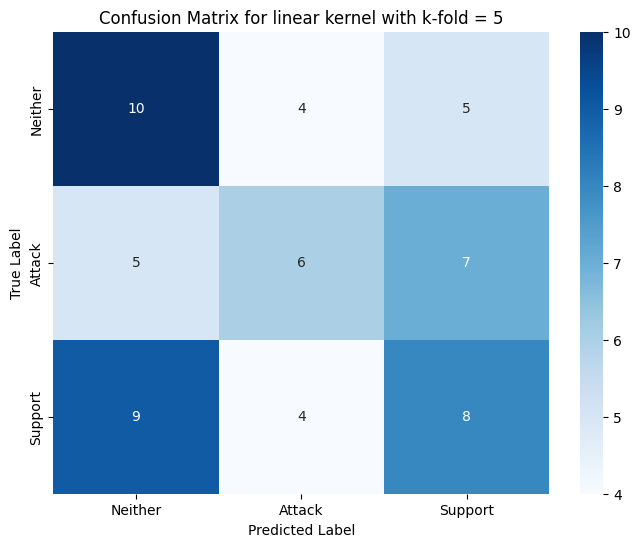

Results for linear kernel with k_fold = 8:
Mean Accuracy: 0.38813813813813813
Mean Precision: 0.38600891891333067
Mean Recall: 0.3943581537428287
Mean F1 Score: 0.3778353978833518

Confusion Matrix:
 [[4 1 2]
 [4 3 3]
 [8 3 8]]


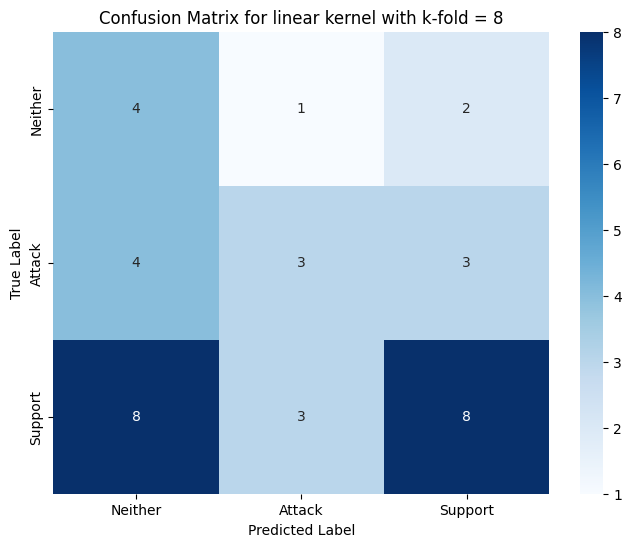

Results for poly kernel with k_fold = 5:
Mean Accuracy: 0.34383401519579193
Mean Precision: 0.34310323119146646
Mean Recall: 0.35952859186450514
Mean F1 Score: 0.31718845635796167

Confusion Matrix:
 [[14  1  4]
 [ 7  4  7]
 [11  3  7]]


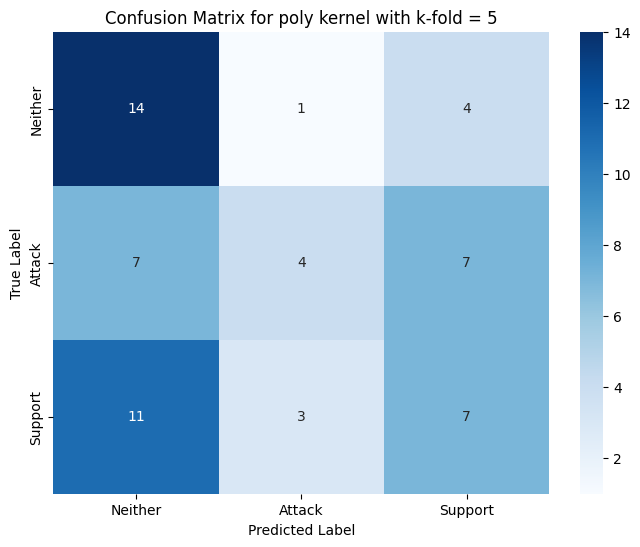

Results for poly kernel with k_fold = 8:
Mean Accuracy: 0.3506006006006006
Mean Precision: 0.3608506655381655
Mean Recall: 0.3630364874705045
Mean F1 Score: 0.32663283246220853

Confusion Matrix:
 [[ 5  0  2]
 [ 5  1  4]
 [10  2  7]]


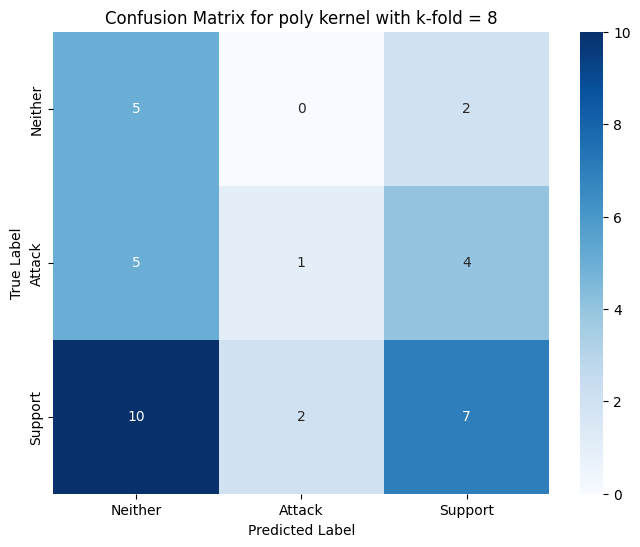

Results for rbf kernel with k_fold = 5:
Mean Accuracy: 0.3675043834015196
Mean Precision: 0.36370870639358993
Mean Recall: 0.37365615052302364
Mean F1 Score: 0.3553052212942459

Confusion Matrix:
 [[11  3  5]
 [ 5  4  9]
 [ 8  4  9]]


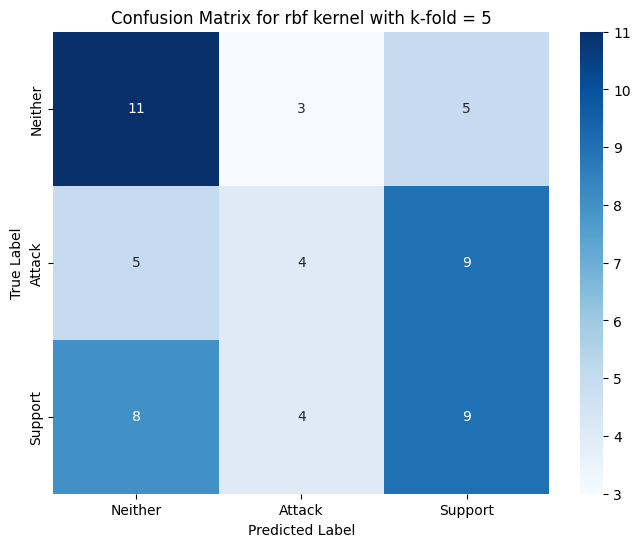

Results for rbf kernel with k_fold = 8:
Mean Accuracy: 0.3674924924924925
Mean Precision: 0.36900240246795973
Mean Recall: 0.3713170549422484
Mean F1 Score: 0.3525917062223739

Confusion Matrix:
 [[4 1 2]
 [5 1 4]
 [9 3 7]]


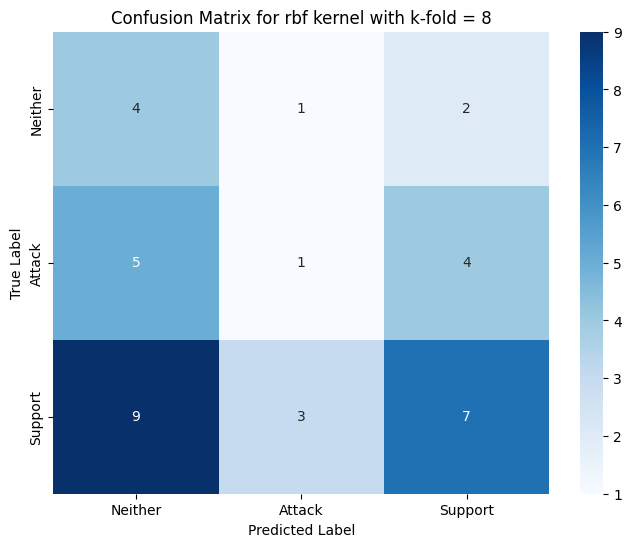

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.37767387492694326
Mean Precision: 0.3798759849055986
Mean Recall: 0.38376319850313656
Mean F1 Score: 0.37662038094745887

Confusion Matrix:
 [[10  3  6]
 [ 5  6  7]
 [ 9  4  8]]


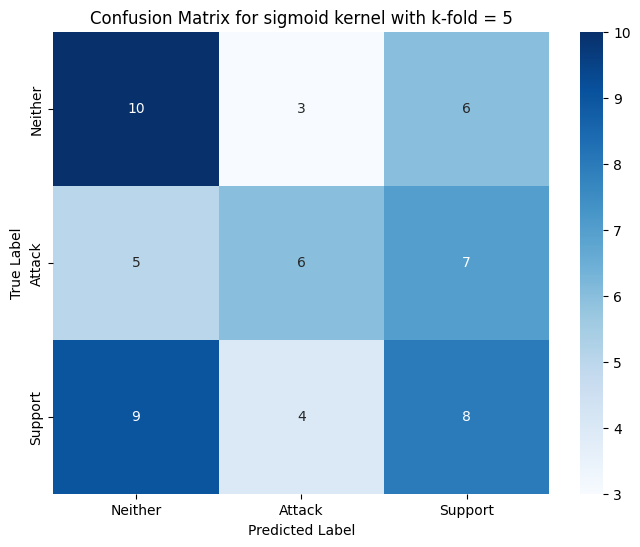

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.3880442942942943
Mean Precision: 0.3875901875901876
Mean Recall: 0.39257793845158395
Mean F1 Score: 0.37788590854227155

Confusion Matrix:
 [[3 1 3]
 [4 3 3]
 [8 3 8]]


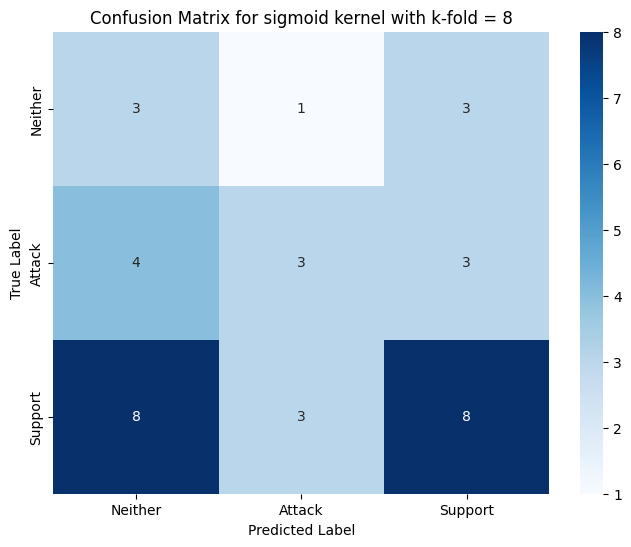

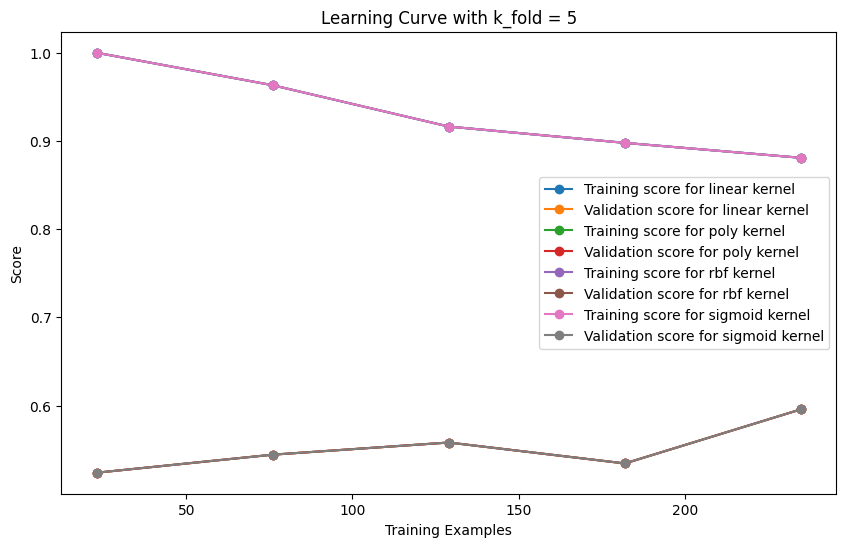

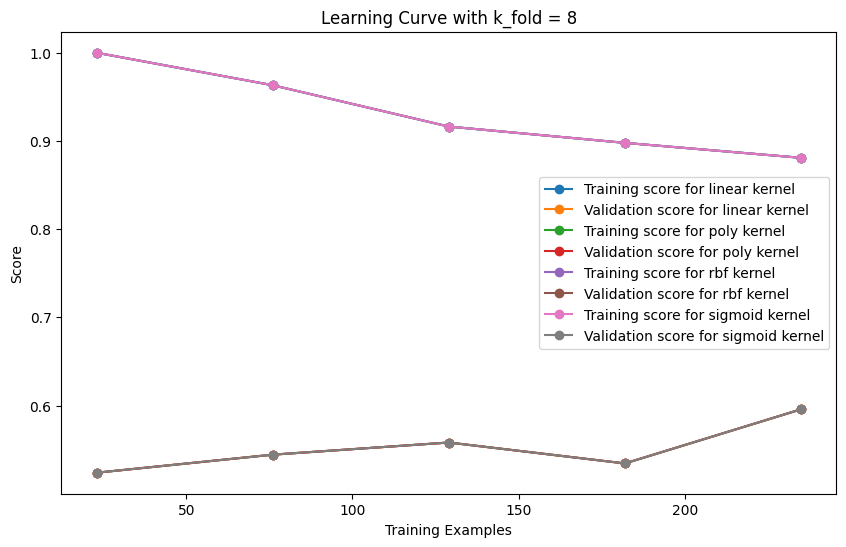

[[[0.364114552893045, 0.36382179753959265, 0.3704476904817462, 0.359836564595967], [0.38813813813813813, 0.38600891891333067, 0.3943581537428287, 0.3778353978833518]], [[0.34383401519579193, 0.34310323119146646, 0.35952859186450514, 0.31718845635796167], [0.3506006006006006, 0.3608506655381655, 0.3630364874705045, 0.32663283246220853]], [[0.3675043834015196, 0.36370870639358993, 0.37365615052302364, 0.3553052212942459], [0.3674924924924925, 0.36900240246795973, 0.3713170549422484, 0.3525917062223739]], [[0.37767387492694326, 0.3798759849055986, 0.38376319850313656, 0.37662038094745887], [0.3880442942942943, 0.3875901875901876, 0.39257793845158395, 0.37788590854227155]]]


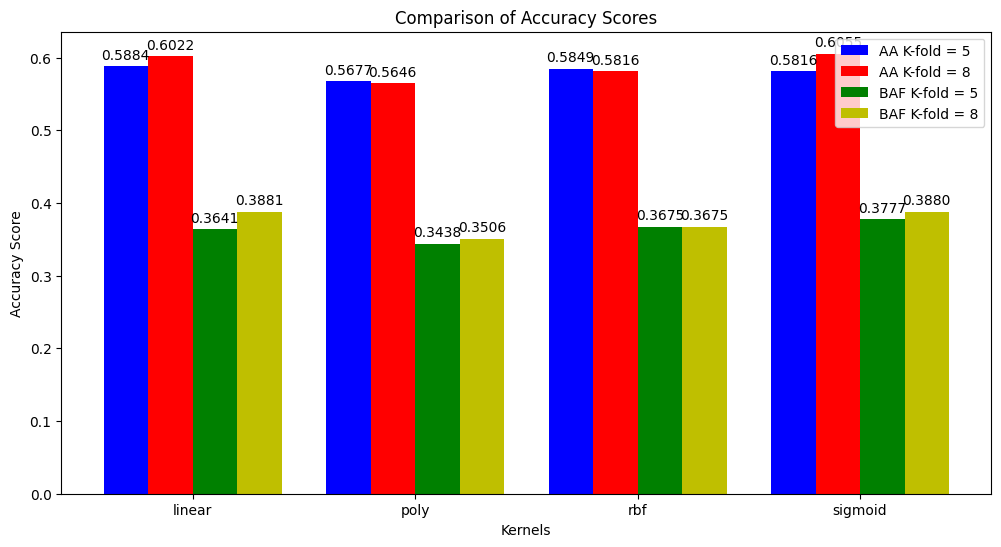

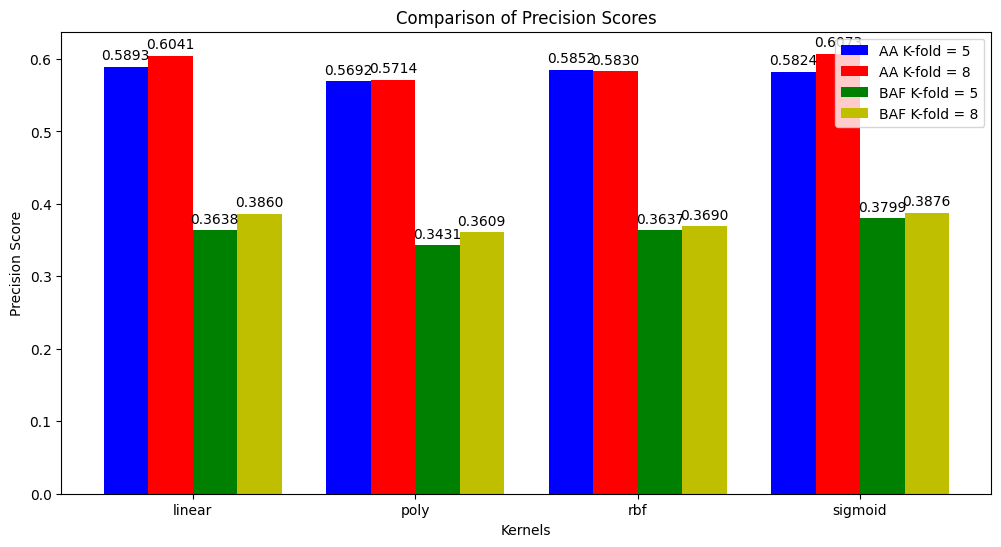

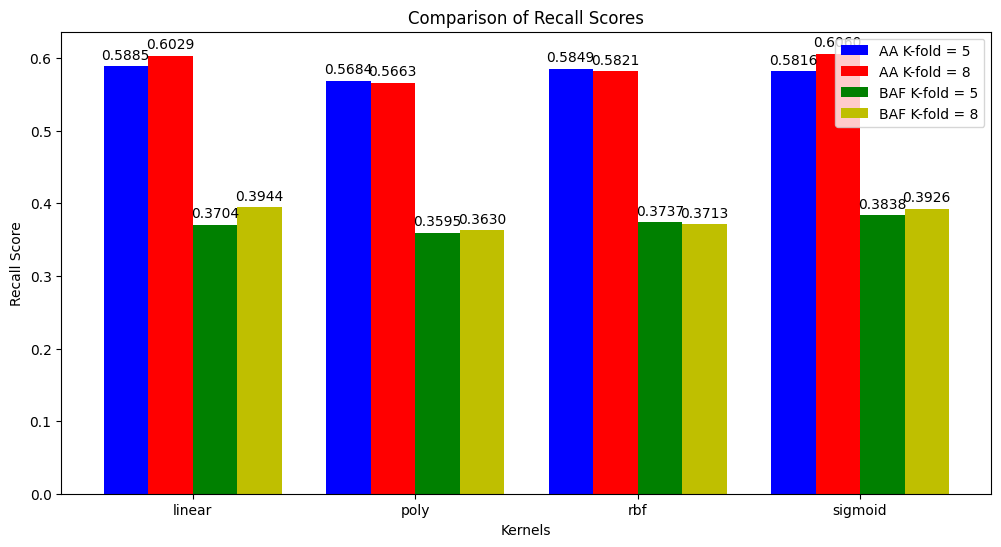

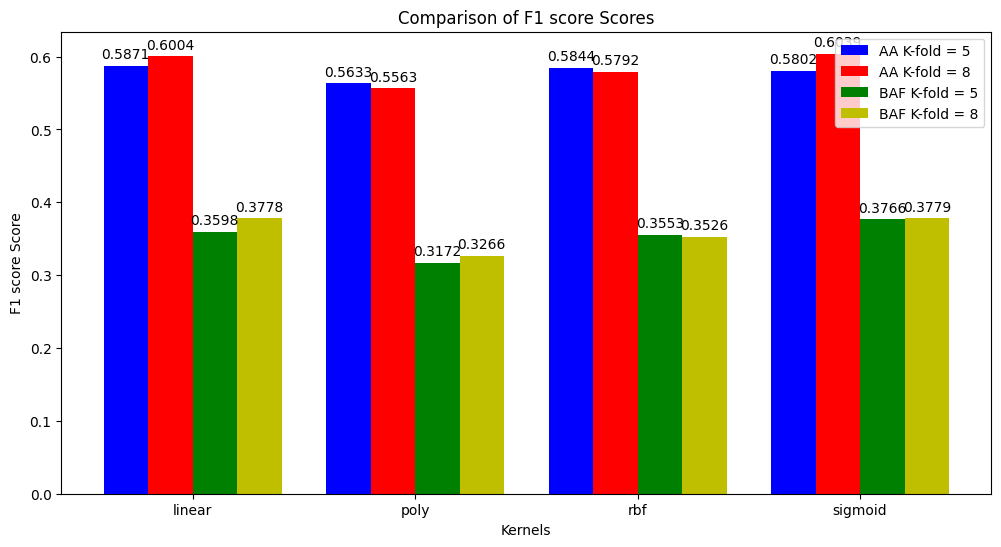

In [31]:
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from collections import Counter
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Assuming X_baf and y_baf contain your text data and labels, respectively
minority_class_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 1]  # First minority class (e.g., Attack)
majority_class_1_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 2]  # Second minority class
majority_class_2_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 0]    # Dominant class (e.g., Non-Attack)

# Define the number of samples to match for the majority class
num_minority_class = len(minority_class_baf)
num_majority_class_1 = num_minority_class
num_majority_class_2 = num_minority_class  # Choose the smallest class size to balance

# Randomly sample from the majority class
undersampled_majority_class_1 = random.sample(majority_class_1_baf, num_majority_class_1)
undersampled_majority_class_2 = random.sample(majority_class_2_baf, num_majority_class_2)

# Combine the undersampled majority class with minority classes
X_undersampled_baf = undersampled_majority_class_1 + undersampled_majority_class_2 + minority_class_baf
y_undersampled_baf = [0] * num_majority_class_1 + [1] * len(minority_class_baf) + [2] * num_majority_class_1

# Shuffle the data
combined_baf = list(zip(X_undersampled_baf, y_undersampled_baf))
random.shuffle(combined_baf)
X_undersampled_baf, y_undersampled_baf = zip(*combined_baf)

y_baf = y_undersampled_baf

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf_baf = []
for ligne in X_undersampled_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)
# Initialisation de StratifiedKFold
k_folds = [5,8]

# Définition des différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

result_baf = []
accu = 0
train_scores_mean_list_5_baf = []
train_scores_mean_list_8_baf = []
val_scores_mean_list_5_baf = []
val_scores_mean_list_8_baf = []
lab_5_baf = []
lab_8_baf = []

for kernel in kernels:
    result_kernel_baf = []
    for k_fold in k_folds: 
        result_kfold_baf = []
        kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
        accuracies_baf = []
        precisions_baf = []
        recalls_baf = []
        f1_scores_baf = []
    
        # Validation croisée
        for train_index_baf, test_index_baf in kf.split(X_tfidf, y):
            X_train_baf, X_test_baf = X_tfidf_baf[train_index_baf], X_tfidf_baf[test_index_baf]
            y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
            
            # Entraînement du classifieur SVM
            clf_baf = SVC(kernel=kernel, C=10, gamma='scale', class_weight='balanced')
            clf_baf.fit(X_train_baf, y_train_baf)
            
            # Prédiction sur les données de test
            y_pred_baf = clf_baf.predict(X_test_baf)
            #print(Counter(y_pred))
            
            # Calcul des métriques
            accuracies_baf.append(accuracy_score(y_test_baf, y_pred_baf))
            precisions_baf.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
            recalls_baf.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
            f1_scores_baf.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        
        print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
        print(f"Mean Accuracy: {np.mean(accuracies_baf)}")
        result_kfold_baf.append(np.mean(accuracies_baf))
        if accu<np.mean(accuracies):
            # Save the vectorizer and classifier
            with open('vectorizer_svm_baf.pkl', 'wb') as f:
                pickle.dump(vectorizer_baf, f)
            with open('classifier_svm_baf.pkl', 'wb') as f:
                pickle.dump(clf_baf, f)
        print(f"Mean Precision: {np.mean(precisions_baf)}")
        result_kfold_baf.append(np.mean(precisions_baf))
        print(f"Mean Recall: {np.mean(recalls_baf)}")
        result_kfold_baf.append(np.mean(recalls_baf))
        print(f"Mean F1 Score: {np.mean(f1_scores_baf)}\n")
        conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
        print("Confusion Matrix:\n",conf_matrix_baf )
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"Confusion Matrix for {kernel} kernel with k-fold = {k_fold}")
        plt.show()

        train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)
        
        if k_fold==5:
            train_scores_mean_list_5_baf.append(train_scores_mean)
            val_scores_mean_list_5_baf.append(val_scores_mean)
            lab_5_baf.append(f"for {kernel} kernel")
        if k_fold==8:
            train_scores_mean_list_8_baf.append(train_scores_mean)
            val_scores_mean_list_8_baf.append(val_scores_mean)
            lab_8_baf.append(f"for {kernel} kernel")
        
        result_kfold_baf.append(np.mean(f1_scores_baf))
        result_kernel_baf.append(result_kfold_baf)
    result_baf.append(result_kernel_baf)


plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5_baf)):
    lab_train = "Training score " + lab_5_baf[i]
    lab_val = "Validation score "+ lab_5_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_5_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8_baf)):
    lab_train = "Training score " + lab_8_baf[i]
    lab_val = "Validation score "+ lab_8_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_8_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

print(result_baf)

result_5 = []
result_8 = []
for i in range(len(result)):
    result_5.append(result[i][0])
    result_8.append(result[i][1])

result_baf_5 = []
result_baf_8 = []
for i in range(len(result_baf)):
    result_baf_5.append(result_baf[i][0])
    result_baf_8.append(result_baf[i][1])

metrics = ['Accuracy','Precision','Recall','F1 score']

def plot_metrics(metric_index):
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.2  # Width of the bars
    x = np.arange(len(kernels))  # x locations for the kernels
    
    # Bars for result_5
    ax.bar(x - 1.5 * width, [result_5[i][metric_index] for i in range(len(kernels))], width, label='AA K-fold = 5', color='b')
    
    # Bars for result_8
    ax.bar(x - 0.5 * width, [result_8[i][metric_index] for i in range(len(kernels))], width, label='AA K-fold = 8', color='r')
    
    # Bars for result_baf_5
    ax.bar(x + 0.5 * width, [result_baf_5[i][metric_index] for i in range(len(kernels))], width, label='BAF K-fold = 5', color='g')
    
    # Bars for result_baf_8
    ax.bar(x + 1.5 * width, [result_baf_8[i][metric_index] for i in range(len(kernels))], width, label='BAF K-fold = 8', color='y')

    # Set labels and title
    ax.set_xlabel('Kernels')
    ax.set_ylabel(f'{metrics[metric_index]} Score')
    ax.set_title(f'Comparison of {metrics[metric_index]} Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(kernels)
    ax.legend()
    
    # Adding value labels on bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    bars_list = [
        ax.bar(x - 1.5 * width, [result_5[i][metric_index] for i in range(len(kernels))], width, color='b'),
        ax.bar(x - 0.5 * width, [result_8[i][metric_index] for i in range(len(kernels))], width, color='r'),
        ax.bar(x + 0.5 * width, [result_baf_5[i][metric_index] for i in range(len(kernels))], width, color='g'),
        ax.bar(x + 1.5 * width, [result_baf_8[i][metric_index] for i in range(len(kernels))], width, color='y')
    ]
    
    for bars in bars_list:
        add_labels(bars)
    
    plt.show()

# Plot each metric
for i, metric in enumerate(metrics):
    plot_metrics(i)

#### Normal

Results for linear kernel with k_fold = 5:
Mean Accuracy: 0.6047619047619047
Mean Precision: 0.6259004127966976
Mean Recall: 0.39603988603988605
Mean F1 Score: 0.34506379417195354

Confusion Matrix:
 [[9 0 0]
 [1 0 1]
 [8 0 1]]


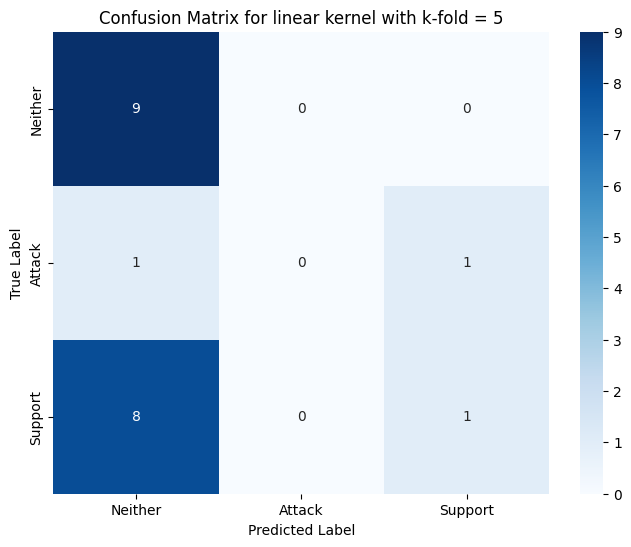

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for linear kernel with k_fold = 8:
Mean Accuracy: 0.5865384615384617
Mean Precision: 0.6153651903651904
Mean Recall: 0.39814814814814814
Mean F1 Score: 0.33515191164184965

Confusion Matrix:
 [[6 0 0]
 [1 0 1]
 [5 0 0]]


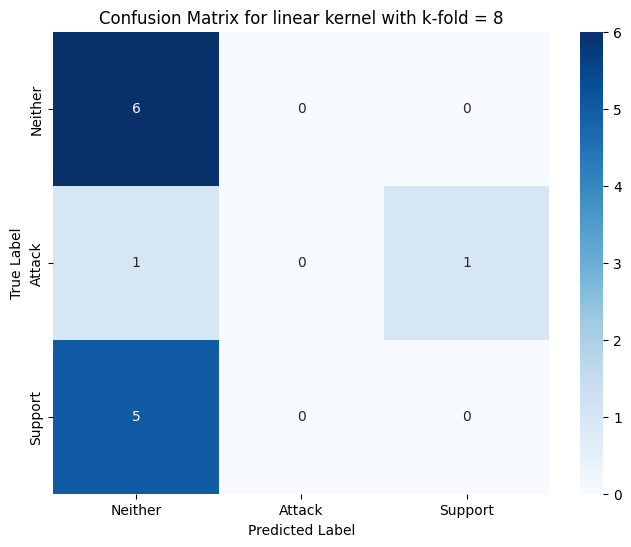

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for poly kernel with k_fold = 5:
Mean Accuracy: 0.5857142857142856
Mean Precision: 0.6245419103313841
Mean Recall: 0.33381766381766387
Mean F1 Score: 0.2742375982651125

Confusion Matrix:
 [[9 0 0]
 [2 0 0]
 [8 0 1]]


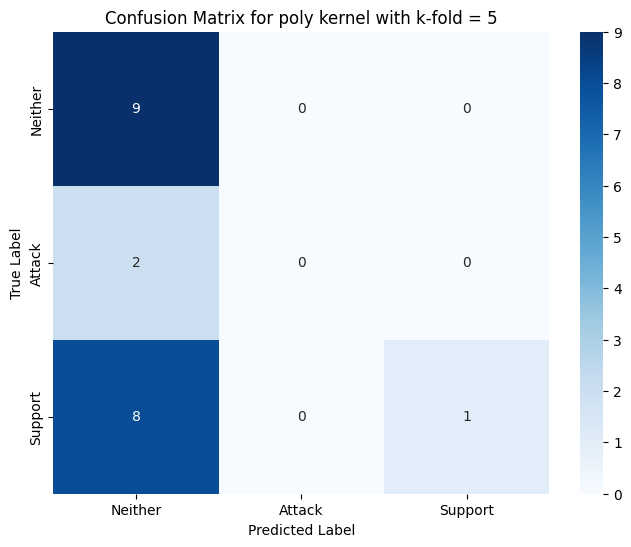

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for poly kernel with k_fold = 8:
Mean Accuracy: 0.576923076923077
Mean Precision: 0.697940947940948
Mean Recall: 0.3300925925925926
Mean F1 Score: 0.26709771818719863

Confusion Matrix:
 [[6 0 0]
 [2 0 0]
 [5 0 0]]


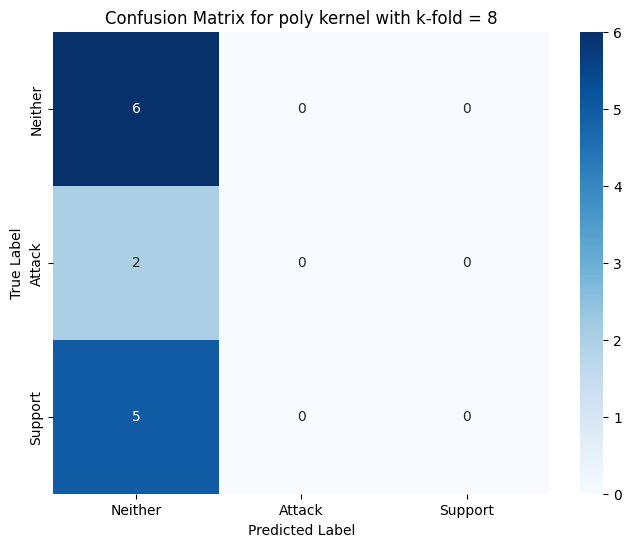

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for rbf kernel with k_fold = 5:
Mean Accuracy: 0.5761904761904761
Mean Precision: 0.6234892787524366
Mean Recall: 0.3293732193732194
Mean F1 Score: 0.2718846570886419

Confusion Matrix:
 [[9 0 0]
 [2 0 0]
 [8 0 1]]


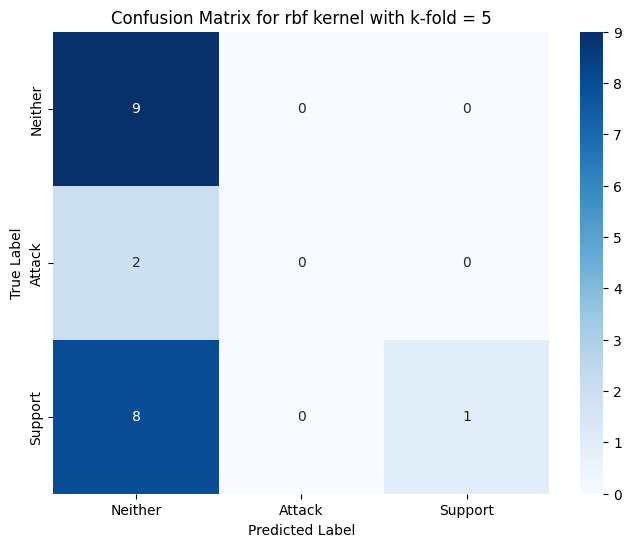

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for rbf kernel with k_fold = 8:
Mean Accuracy: 0.5673076923076923
Mean Precision: 0.6554729992229993
Mean Recall: 0.3259259259259259
Mean F1 Score: 0.2649567432201366

Confusion Matrix:
 [[6 0 0]
 [2 0 0]
 [5 0 0]]


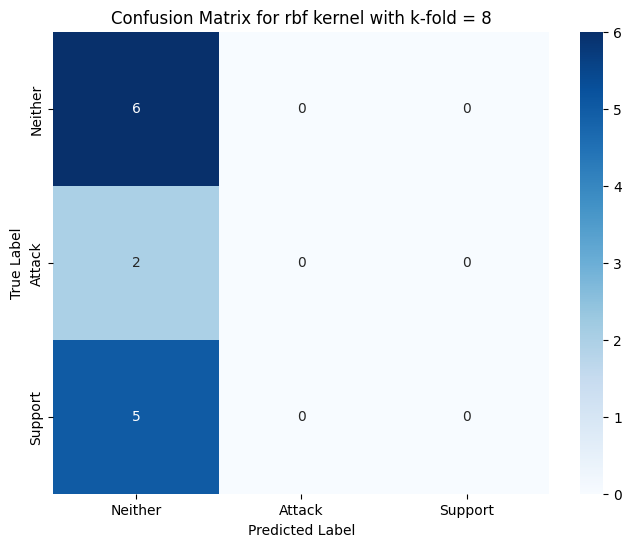

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.6047619047619047
Mean Precision: 0.5763880509468745
Mean Recall: 0.42911680911680905
Mean F1 Score: 0.38037972347761

Confusion Matrix:
 [[9 0 0]
 [1 0 1]
 [8 0 1]]


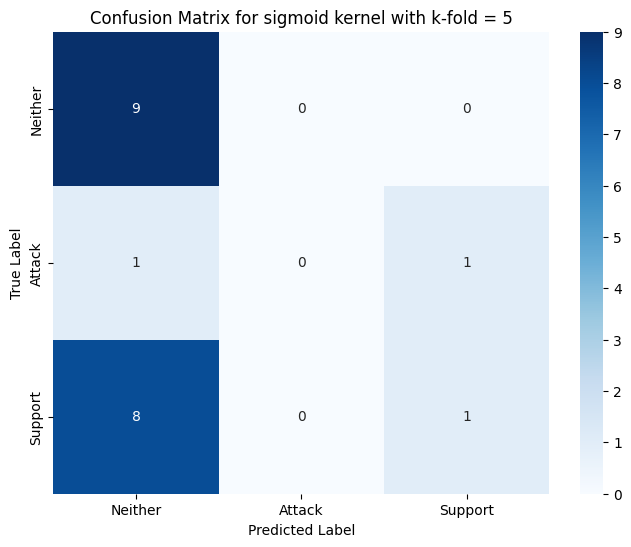

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.576923076923077
Mean Precision: 0.5833438552188552
Mean Recall: 0.40324074074074073
Mean F1 Score: 0.34178640023260765

Confusion Matrix:
 [[6 0 0]
 [1 0 1]
 [5 0 0]]


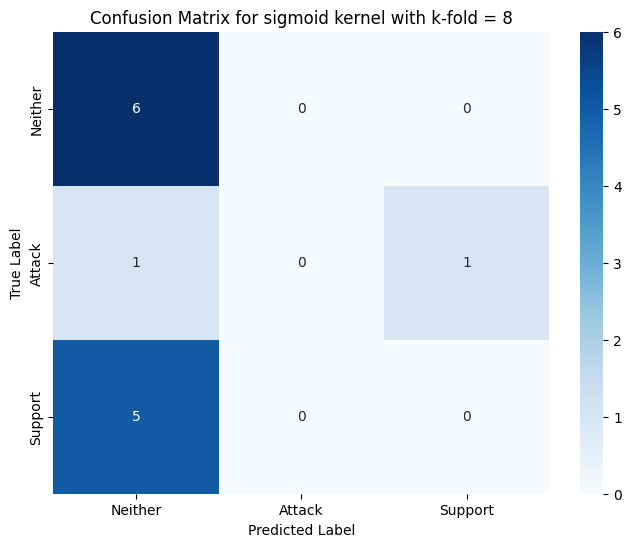

C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\robin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\robin\AppData\

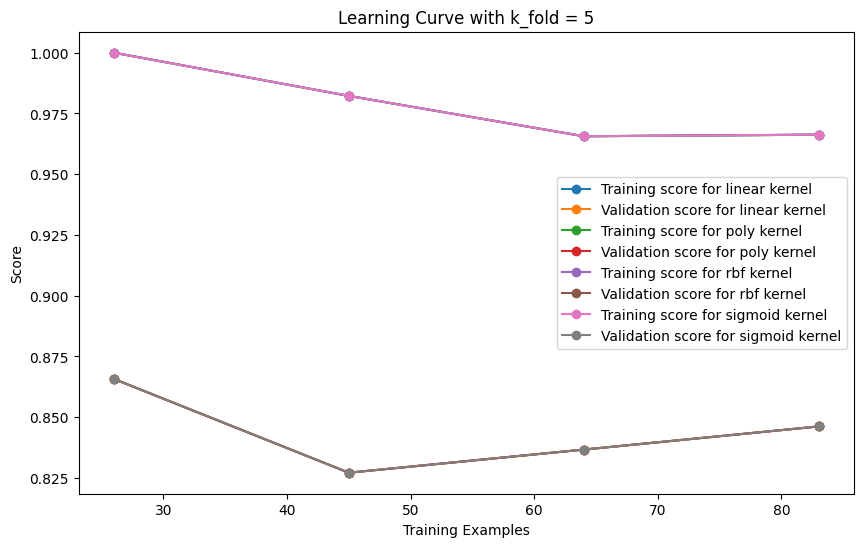

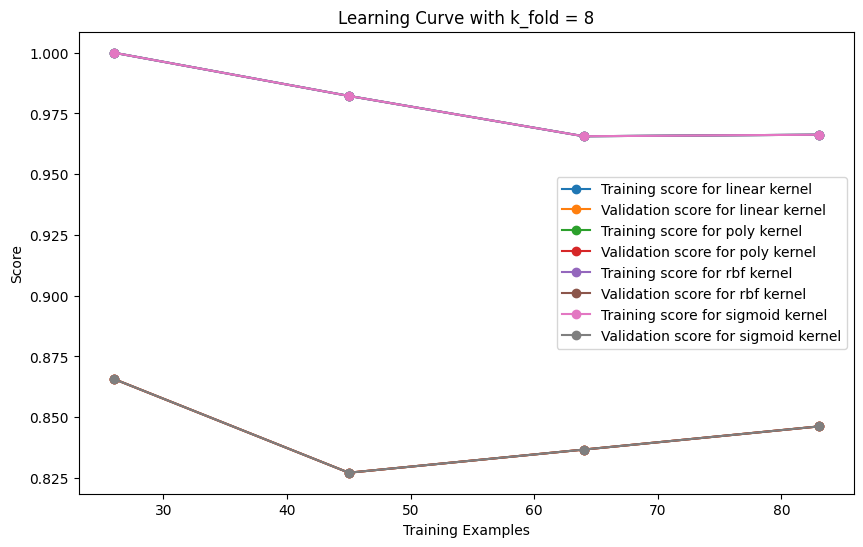

[[[0.6047619047619047, 0.6259004127966976, 0.39603988603988605, 0.34506379417195354], [0.5865384615384617, 0.6153651903651904, 0.39814814814814814, 0.33515191164184965]], [[0.5857142857142856, 0.6245419103313841, 0.33381766381766387, 0.2742375982651125], [0.576923076923077, 0.697940947940948, 0.3300925925925926, 0.26709771818719863]], [[0.5761904761904761, 0.6234892787524366, 0.3293732193732194, 0.2718846570886419], [0.5673076923076923, 0.6554729992229993, 0.3259259259259259, 0.2649567432201366]], [[0.6047619047619047, 0.5763880509468745, 0.42911680911680905, 0.38037972347761], [0.576923076923077, 0.5833438552188552, 0.40324074074074073, 0.34178640023260765]]]


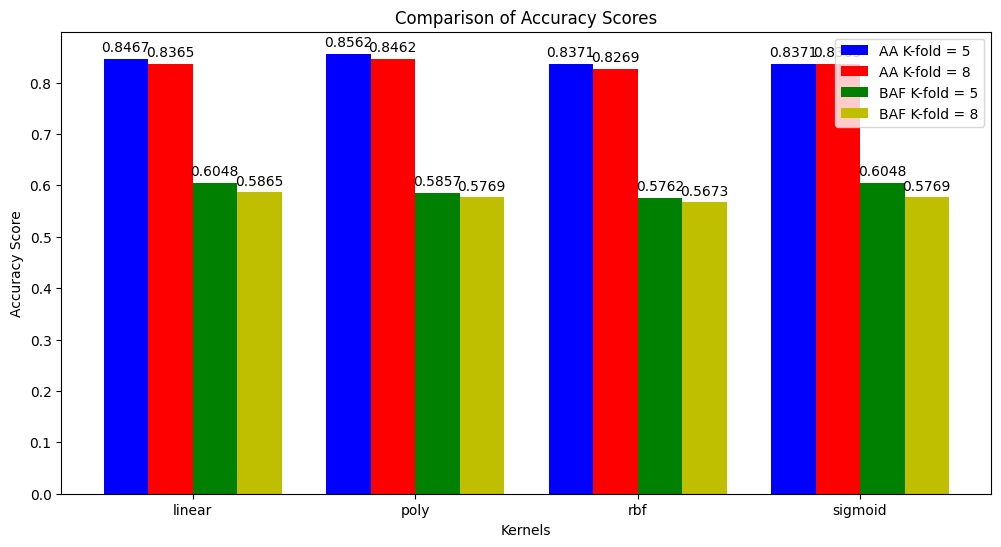

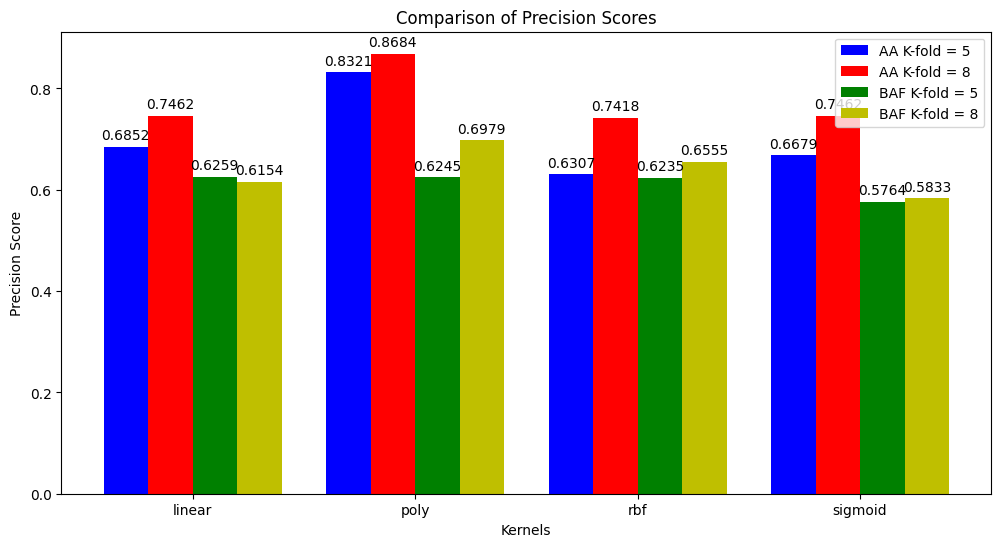

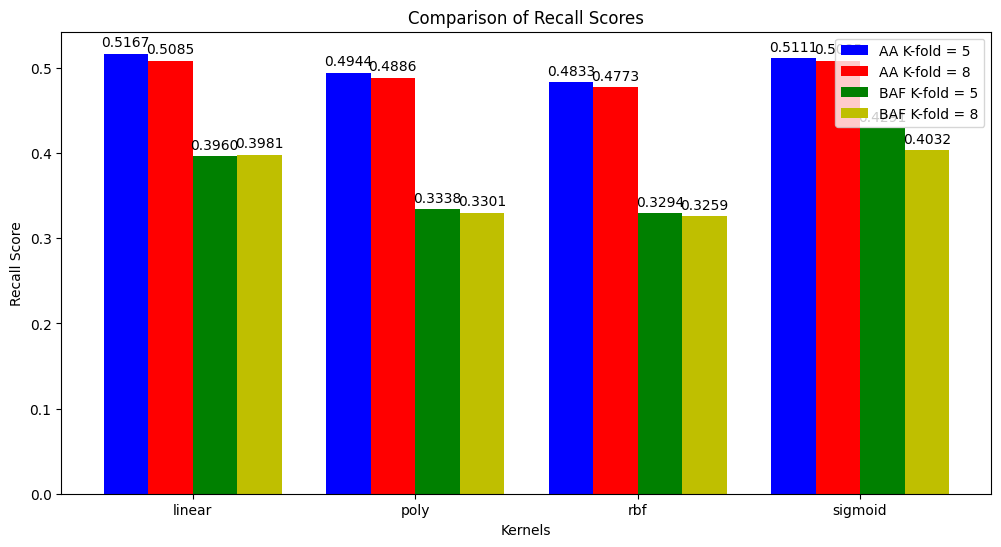

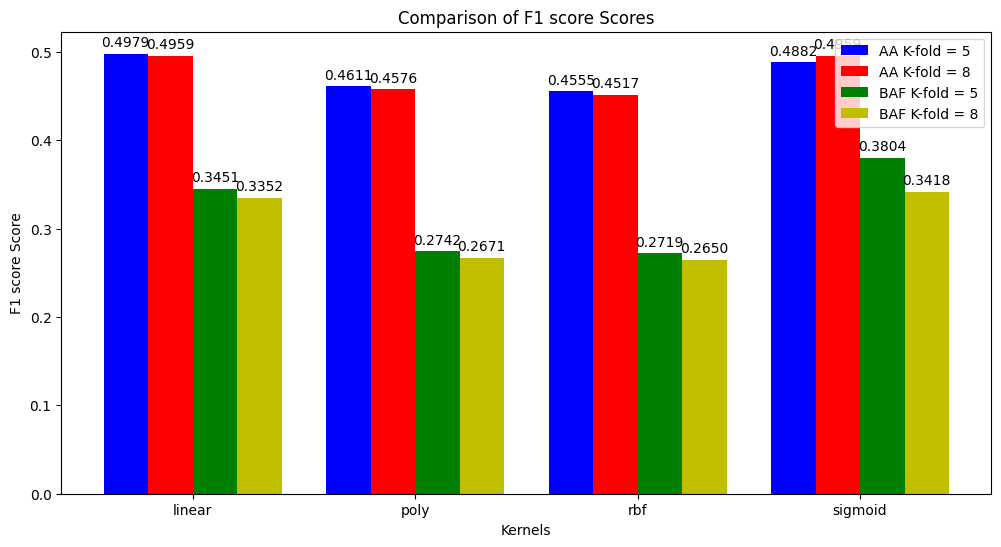

In [47]:
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from collections import Counter
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf_baf = []
for ligne in X_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)
# Initialisation de StratifiedKFold
k_folds = [5,8]

# Définition des différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

result_baf = []
accu = 0
train_scores_mean_list_5_baf = []
train_scores_mean_list_8_baf = []
val_scores_mean_list_5_baf = []
val_scores_mean_list_8_baf = []
lab_5_baf = []
lab_8_baf = []

for kernel in kernels:
    result_kernel_baf = []
    for k_fold in k_folds: 
        result_kfold_baf = []
        kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
        accuracies_baf = []
        precisions_baf = []
        recalls_baf = []
        f1_scores_baf = []
    
        # Validation croisée
        for train_index_baf, test_index_baf in kf.split(X_tfidf, y):
            X_train_baf, X_test_baf = X_tfidf_baf[train_index_baf], X_tfidf_baf[test_index_baf]
            y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
            
            # Entraînement du classifieur SVM
            clf_baf = SVC(kernel=kernel, C=10, gamma='scale', class_weight='balanced')
            clf_baf.fit(X_train_baf, y_train_baf)
            
            # Prédiction sur les données de test
            y_pred_baf = clf_baf.predict(X_test_baf)
            #print(Counter(y_pred))
            
            # Calcul des métriques
            accuracies_baf.append(accuracy_score(y_test_baf, y_pred_baf))
            precisions_baf.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
            recalls_baf.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
            f1_scores_baf.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        
        print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
        print(f"Mean Accuracy: {np.mean(accuracies_baf)}")
        result_kfold_baf.append(np.mean(accuracies_baf))
        if accu<np.mean(accuracies):
            # Save the vectorizer and classifier
            with open('vectorizer_svm_baf.pkl', 'wb') as f:
                pickle.dump(vectorizer_baf, f)
            with open('classifier_svm_baf.pkl', 'wb') as f:
                pickle.dump(clf_baf, f)
        print(f"Mean Precision: {np.mean(precisions_baf)}")
        result_kfold_baf.append(np.mean(precisions_baf))
        print(f"Mean Recall: {np.mean(recalls_baf)}")
        result_kfold_baf.append(np.mean(recalls_baf))
        print(f"Mean F1 Score: {np.mean(f1_scores_baf)}\n")
        conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
        print("Confusion Matrix:\n",conf_matrix_baf )
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"Confusion Matrix for {kernel} kernel with k-fold = {k_fold}")
        plt.show()

        train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)
        
        if k_fold==5:
            train_scores_mean_list_5_baf.append(train_scores_mean)
            val_scores_mean_list_5_baf.append(val_scores_mean)
            lab_5_baf.append(f"for {kernel} kernel")
        if k_fold==8:
            train_scores_mean_list_8_baf.append(train_scores_mean)
            val_scores_mean_list_8_baf.append(val_scores_mean)
            lab_8_baf.append(f"for {kernel} kernel")
        
        result_kfold_baf.append(np.mean(f1_scores_baf))
        result_kernel_baf.append(result_kfold_baf)
    result_baf.append(result_kernel_baf)


plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5_baf)):
    lab_train = "Training score " + lab_5_baf[i]
    lab_val = "Validation score "+ lab_5_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_5_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8_baf)):
    lab_train = "Training score " + lab_8_baf[i]
    lab_val = "Validation score "+ lab_8_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_8_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

print(result_baf)

result_5 = []
result_8 = []
for i in range(len(result)):
    result_5.append(result[i][0])
    result_8.append(result[i][1])

result_baf_5 = []
result_baf_8 = []
for i in range(len(result_baf)):
    result_baf_5.append(result_baf[i][0])
    result_baf_8.append(result_baf[i][1])

metrics = ['Accuracy','Precision','Recall','F1 score']

def plot_metrics(metric_index):
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.2  # Width of the bars
    x = np.arange(len(kernels))  # x locations for the kernels
    
    # Bars for result_5
    ax.bar(x - 1.5 * width, [result_5[i][metric_index] for i in range(len(kernels))], width, label='AA K-fold = 5', color='b')
    
    # Bars for result_8
    ax.bar(x - 0.5 * width, [result_8[i][metric_index] for i in range(len(kernels))], width, label='AA K-fold = 8', color='r')
    
    # Bars for result_baf_5
    ax.bar(x + 0.5 * width, [result_baf_5[i][metric_index] for i in range(len(kernels))], width, label='BAF K-fold = 5', color='g')
    
    # Bars for result_baf_8
    ax.bar(x + 1.5 * width, [result_baf_8[i][metric_index] for i in range(len(kernels))], width, label='BAF K-fold = 8', color='y')

    # Set labels and title
    ax.set_xlabel('Kernels')
    ax.set_ylabel(f'{metrics[metric_index]} Score')
    ax.set_title(f'Comparison of {metrics[metric_index]} Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(kernels)
    ax.legend()
    
    # Adding value labels on bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    bars_list = [
        ax.bar(x - 1.5 * width, [result_5[i][metric_index] for i in range(len(kernels))], width, color='b'),
        ax.bar(x - 0.5 * width, [result_8[i][metric_index] for i in range(len(kernels))], width, color='r'),
        ax.bar(x + 0.5 * width, [result_baf_5[i][metric_index] for i in range(len(kernels))], width, color='g'),
        ax.bar(x + 1.5 * width, [result_baf_8[i][metric_index] for i in range(len(kernels))], width, color='y')
    ]
    
    for bars in bars_list:
        add_labels(bars)
    
    plt.show()

# Plot each metric
for i, metric in enumerate(metrics):
    plot_metrics(i)

#### Oversampling

Results for linear kernel with k_fold = 5:
Mean Accuracy: 0.8944444444444445
Mean Precision: 0.8868765493765494
Mean Recall: 0.8917409442409442
Mean F1 Score: 0.8876796490626564

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 2  0 10]]


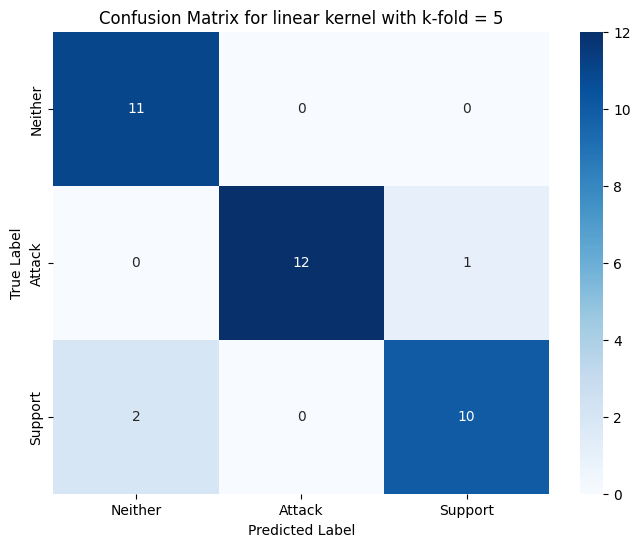

Results for linear kernel with k_fold = 8:
Mean Accuracy: 0.9278656126482214
Mean Precision: 0.9312635281385282
Mean Recall: 0.9290494227994228
Mean F1 Score: 0.9274294323001249

Confusion Matrix:
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  0  8]]


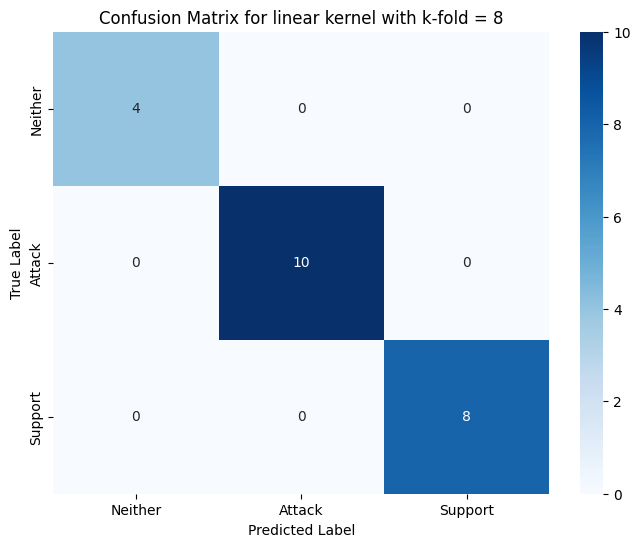

Results for poly kernel with k_fold = 5:
Mean Accuracy: 0.9111111111111111
Mean Precision: 0.9075548634372164
Mean Recall: 0.9125742775742776
Mean F1 Score: 0.9070271926821298

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 2  0 10]]


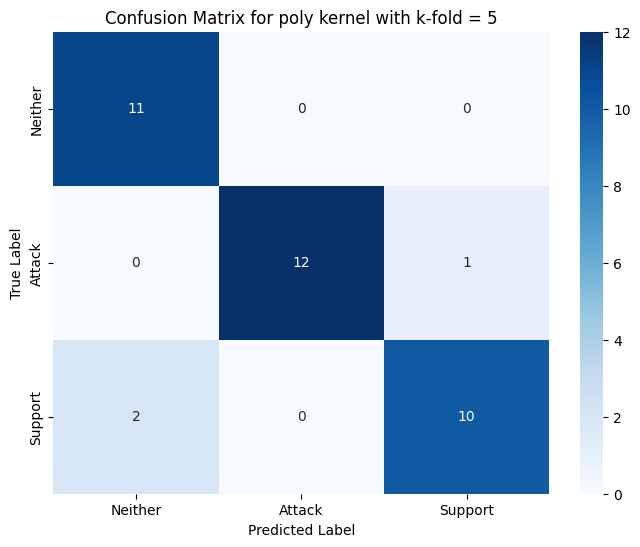

Results for poly kernel with k_fold = 8:
Mean Accuracy: 0.933300395256917
Mean Precision: 0.9356301106301106
Mean Recall: 0.9342577561327562
Mean F1 Score: 0.9319905370450532

Confusion Matrix:
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  0  8]]


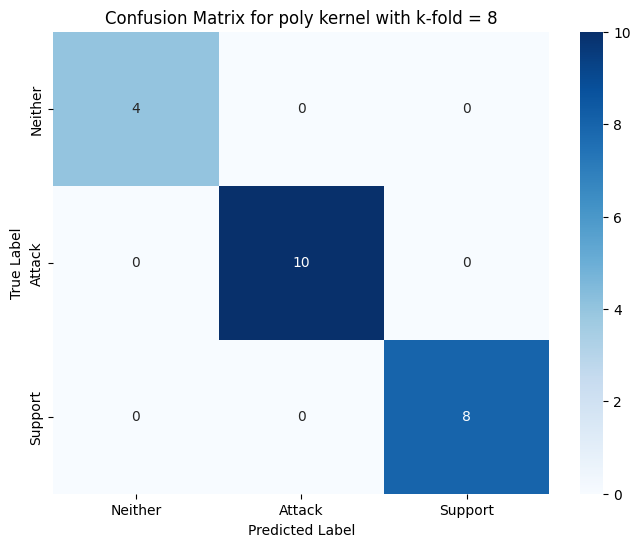

Results for rbf kernel with k_fold = 5:
Mean Accuracy: 0.9055555555555556
Mean Precision: 0.9023656082479612
Mean Recall: 0.907018722018722
Mean F1 Score: 0.9018455348338053

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 2  0 10]]


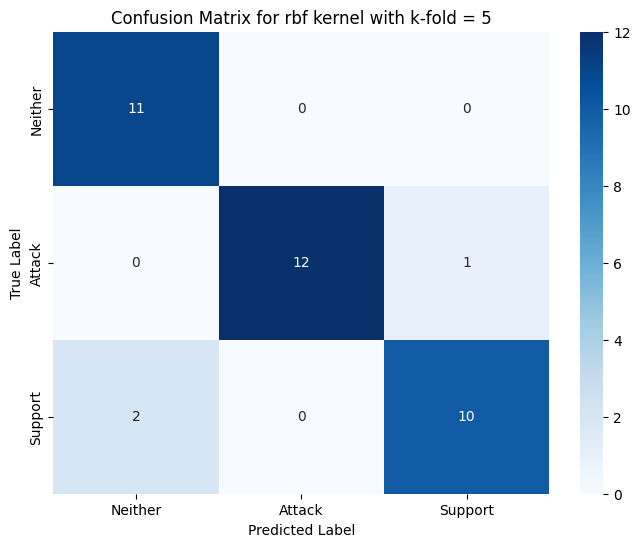

Results for rbf kernel with k_fold = 8:
Mean Accuracy: 0.9278656126482214
Mean Precision: 0.9312635281385282
Mean Recall: 0.9290494227994228
Mean F1 Score: 0.9274294323001249

Confusion Matrix:
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  0  8]]


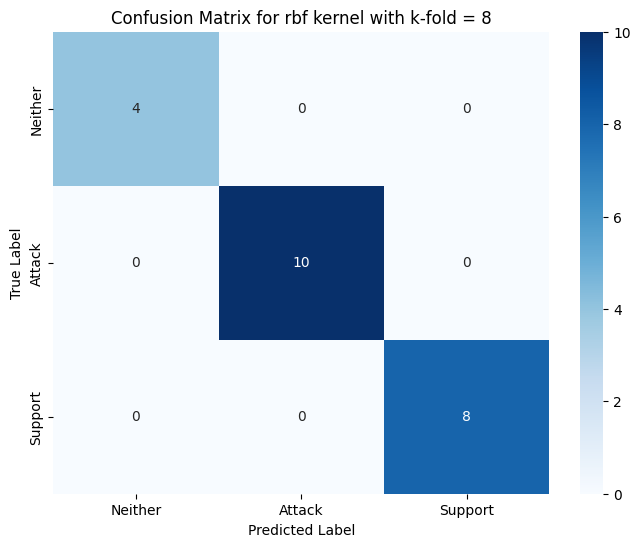

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.8944444444444445
Mean Precision: 0.8868443593443593
Mean Recall: 0.8904422429422428
Mean F1 Score: 0.8872441525252108

Confusion Matrix:
 [[10  0  1]
 [ 0 12  1]
 [ 2  0 10]]


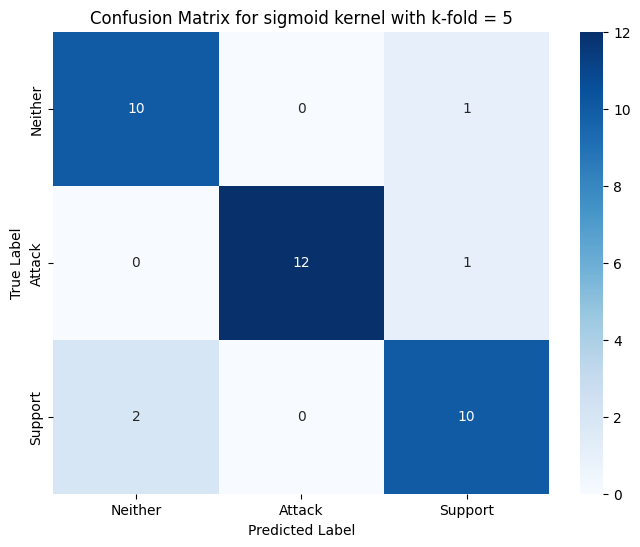

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.9276185770750989
Mean Precision: 0.9309012746512747
Mean Recall: 0.9286706349206348
Mean F1 Score: 0.926915316203915

Confusion Matrix:
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  0  8]]


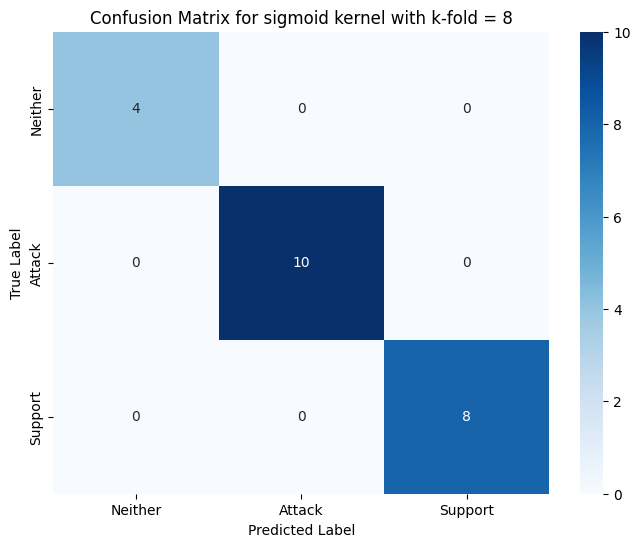

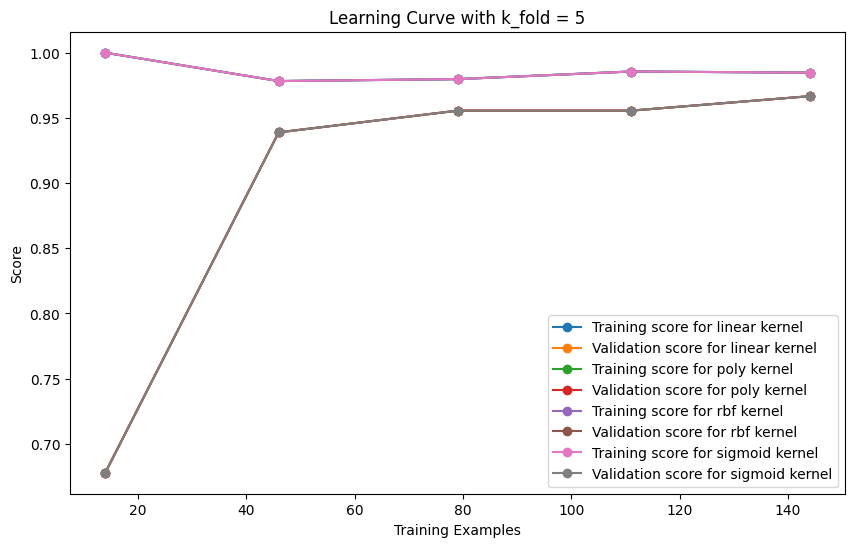

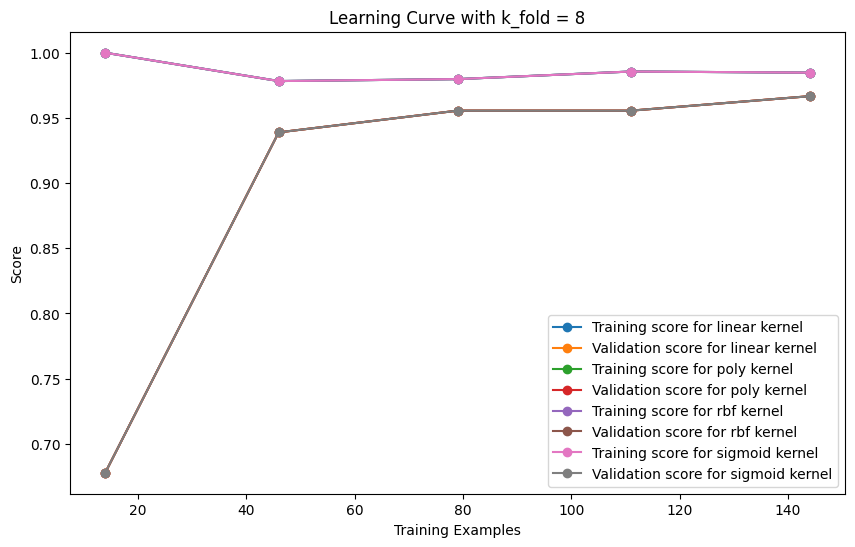

[[[0.8944444444444445, 0.8868765493765494, 0.8917409442409442, 0.8876796490626564], [0.9278656126482214, 0.9312635281385282, 0.9290494227994228, 0.9274294323001249]], [[0.9111111111111111, 0.9075548634372164, 0.9125742775742776, 0.9070271926821298], [0.933300395256917, 0.9356301106301106, 0.9342577561327562, 0.9319905370450532]], [[0.9055555555555556, 0.9023656082479612, 0.907018722018722, 0.9018455348338053], [0.9278656126482214, 0.9312635281385282, 0.9290494227994228, 0.9274294323001249]], [[0.8944444444444445, 0.8868443593443593, 0.8904422429422428, 0.8872441525252108], [0.9276185770750989, 0.9309012746512747, 0.9286706349206348, 0.926915316203915]]]


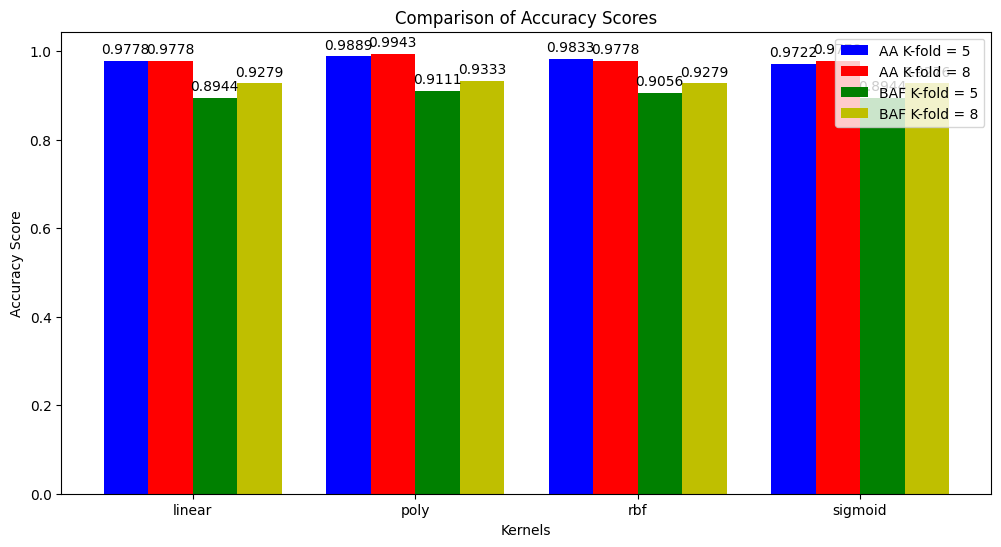

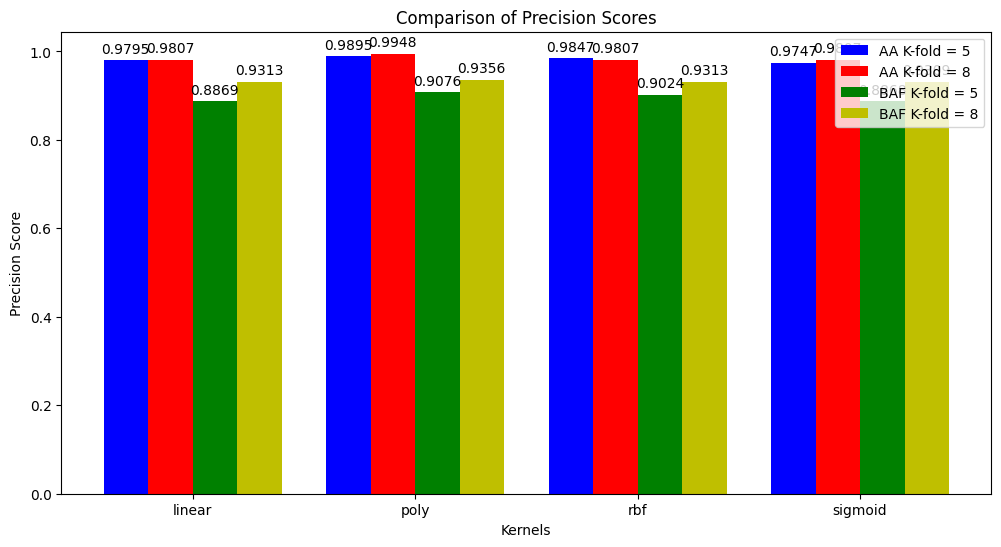

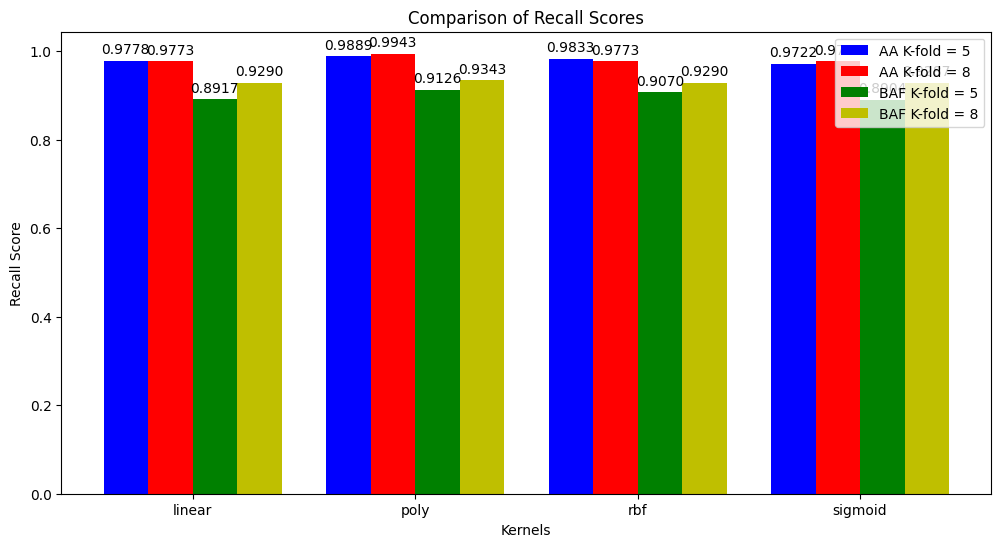

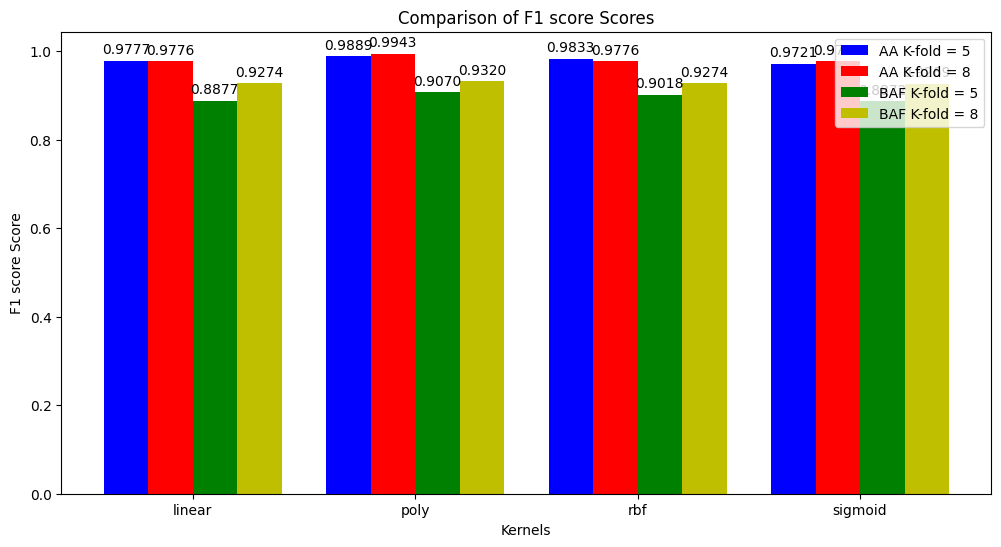

In [43]:
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from collections import Counter
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)


# Assume X and y contain your text data and labels, respectively
minority_class_1_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 1]  # First minority class (Attack)
minority_class_2_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 2]  # Second minority class
majority_class_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 0]    # Dominant class (Non-Attack)

# Oversample the minority classes
oversample_minority_1_baf = random.choices(minority_class_1_baf, k=len(majority_class_baf))
oversample_minority_2_baf = random.choices(minority_class_2_baf, k=len(majority_class_baf))

# Combine oversampled minority classes with majority class
X_oversampled_baf = majority_class_baf + oversample_minority_1_baf + oversample_minority_2_baf
y_oversampled_baf = [0] * len(majority_class_baf) + [1] * len(oversample_minority_1_baf) + [2] * len(oversample_minority_2_baf)

# Shuffle the data to mix classes
combined_baf = list(zip(X_oversampled_baf, y_oversampled_baf))
random.shuffle(combined_baf)
X_oversampled_baf, y_oversampled_baf = zip(*combined_baf)

# Convert back to lists if needed
X_oversampled_baf = list(X_oversampled_baf)
y_oversampled_baf = list(y_oversampled_baf)

y_baf=y_oversampled_baf

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf_baf = []
for ligne in X_oversampled_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)
# Initialisation de StratifiedKFold
k_folds = [5,8]

# Définition des différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

result_baf = []
accu = 0
train_scores_mean_list_5_baf = []
train_scores_mean_list_8_baf = []
val_scores_mean_list_5_baf = []
val_scores_mean_list_8_baf = []
lab_5_baf = []
lab_8_baf = []

for kernel in kernels:
    result_kernel_baf = []
    for k_fold in k_folds: 
        result_kfold_baf = []
        kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
        accuracies_baf = []
        precisions_baf = []
        recalls_baf = []
        f1_scores_baf = []
    
        # Validation croisée
        for train_index_baf, test_index_baf in kf.split(X_tfidf, y):
            X_train_baf, X_test_baf = X_tfidf_baf[train_index_baf], X_tfidf_baf[test_index_baf]
            y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
            
            # Entraînement du classifieur SVM
            clf_baf = SVC(kernel=kernel, C=10, gamma='scale', class_weight='balanced')
            clf_baf.fit(X_train_baf, y_train_baf)
            
            # Prédiction sur les données de test
            y_pred_baf = clf_baf.predict(X_test_baf)
            #print(Counter(y_pred))
            
            # Calcul des métriques
            accuracies_baf.append(accuracy_score(y_test_baf, y_pred_baf))
            precisions_baf.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
            recalls_baf.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
            f1_scores_baf.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        
        print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
        print(f"Mean Accuracy: {np.mean(accuracies_baf)}")
        result_kfold_baf.append(np.mean(accuracies_baf))
        if accu<np.mean(accuracies):
            # Save the vectorizer and classifier
            with open('vectorizer_svm_baf.pkl', 'wb') as f:
                pickle.dump(vectorizer_baf, f)
            with open('classifier_svm_baf.pkl', 'wb') as f:
                pickle.dump(clf_baf, f)
        print(f"Mean Precision: {np.mean(precisions_baf)}")
        result_kfold_baf.append(np.mean(precisions_baf))
        print(f"Mean Recall: {np.mean(recalls_baf)}")
        result_kfold_baf.append(np.mean(recalls_baf))
        print(f"Mean F1 Score: {np.mean(f1_scores_baf)}\n")
        conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
        print("Confusion Matrix:\n",conf_matrix_baf )
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"Confusion Matrix for {kernel} kernel with k-fold = {k_fold}")
        plt.show()

        train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)
        
        if k_fold==5:
            train_scores_mean_list_5_baf.append(train_scores_mean)
            val_scores_mean_list_5_baf.append(val_scores_mean)
            lab_5_baf.append(f"for {kernel} kernel")
        if k_fold==8:
            train_scores_mean_list_8_baf.append(train_scores_mean)
            val_scores_mean_list_8_baf.append(val_scores_mean)
            lab_8_baf.append(f"for {kernel} kernel")
        
        result_kfold_baf.append(np.mean(f1_scores_baf))
        result_kernel_baf.append(result_kfold_baf)
    result_baf.append(result_kernel_baf)


plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5_baf)):
    lab_train = "Training score " + lab_5_baf[i]
    lab_val = "Validation score "+ lab_5_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_5_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8_baf)):
    lab_train = "Training score " + lab_8_baf[i]
    lab_val = "Validation score "+ lab_8_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_8_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

print(result_baf)

result_5 = []
result_8 = []
for i in range(len(result)):
    result_5.append(result[i][0])
    result_8.append(result[i][1])

result_baf_5 = []
result_baf_8 = []
for i in range(len(result_baf)):
    result_baf_5.append(result_baf[i][0])
    result_baf_8.append(result_baf[i][1])

metrics = ['Accuracy','Precision','Recall','F1 score']

def plot_metrics(metric_index):
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.2  # Width of the bars
    x = np.arange(len(kernels))  # x locations for the kernels
    
    # Bars for result_5
    ax.bar(x - 1.5 * width, [result_5[i][metric_index] for i in range(len(kernels))], width, label='AA K-fold = 5', color='b')
    
    # Bars for result_8
    ax.bar(x - 0.5 * width, [result_8[i][metric_index] for i in range(len(kernels))], width, label='AA K-fold = 8', color='r')
    
    # Bars for result_baf_5
    ax.bar(x + 0.5 * width, [result_baf_5[i][metric_index] for i in range(len(kernels))], width, label='BAF K-fold = 5', color='g')
    
    # Bars for result_baf_8
    ax.bar(x + 1.5 * width, [result_baf_8[i][metric_index] for i in range(len(kernels))], width, label='BAF K-fold = 8', color='y')

    # Set labels and title
    ax.set_xlabel('Kernels')
    ax.set_ylabel(f'{metrics[metric_index]} Score')
    ax.set_title(f'Comparison of {metrics[metric_index]} Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(kernels)
    ax.legend()
    
    # Adding value labels on bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    bars_list = [
        ax.bar(x - 1.5 * width, [result_5[i][metric_index] for i in range(len(kernels))], width, color='b'),
        ax.bar(x - 0.5 * width, [result_8[i][metric_index] for i in range(len(kernels))], width, color='r'),
        ax.bar(x + 0.5 * width, [result_baf_5[i][metric_index] for i in range(len(kernels))], width, color='g'),
        ax.bar(x + 1.5 * width, [result_baf_8[i][metric_index] for i in range(len(kernels))], width, color='y')
    ]
    
    for bars in bars_list:
        add_labels(bars)
    
    plt.show()

# Plot each metric
for i, metric in enumerate(metrics):
    plot_metrics(i)

### Extraction

In [32]:
import random

# Load the vectorizer and classifier
with open('vectorizer_svm_baf.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier_svm_baf.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_svm_baf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$conntext$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia
                while indice2==ia:
                    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    if predictions[0] == 1 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
                    elif predictions[0] == 2 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Support$,$This is a support',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
        writer = csv.writer(file)
print('done')

done


# DECISION TREE


## Abstract Argumentation Framework

Results for k_fold = 5:
Mean Accuracy: 0.5407364114552893
Mean Precision: 0.5418536464163026
Mean Recall: 0.5406896551724139
Mean F1 Score: 0.5388406421723183

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50        29
           1       0.52      0.55      0.53        29

    accuracy                           0.52        58
   macro avg       0.52      0.52      0.52        58
weighted avg       0.52      0.52      0.52        58

Confusion Matrix:
 [[14 15]
 [13 16]]


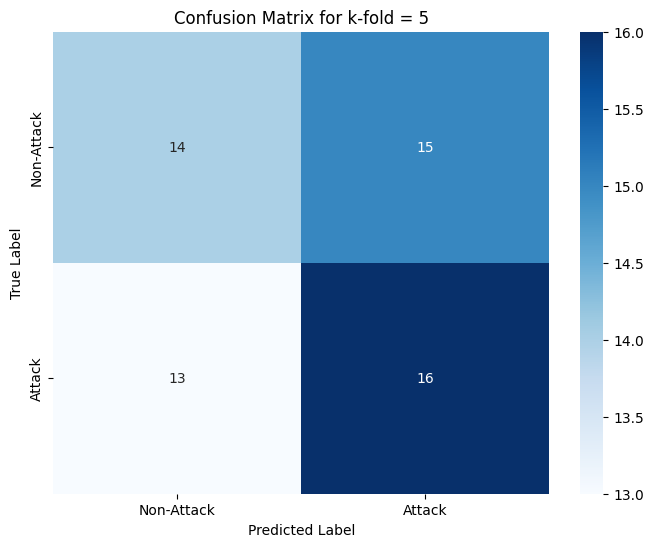

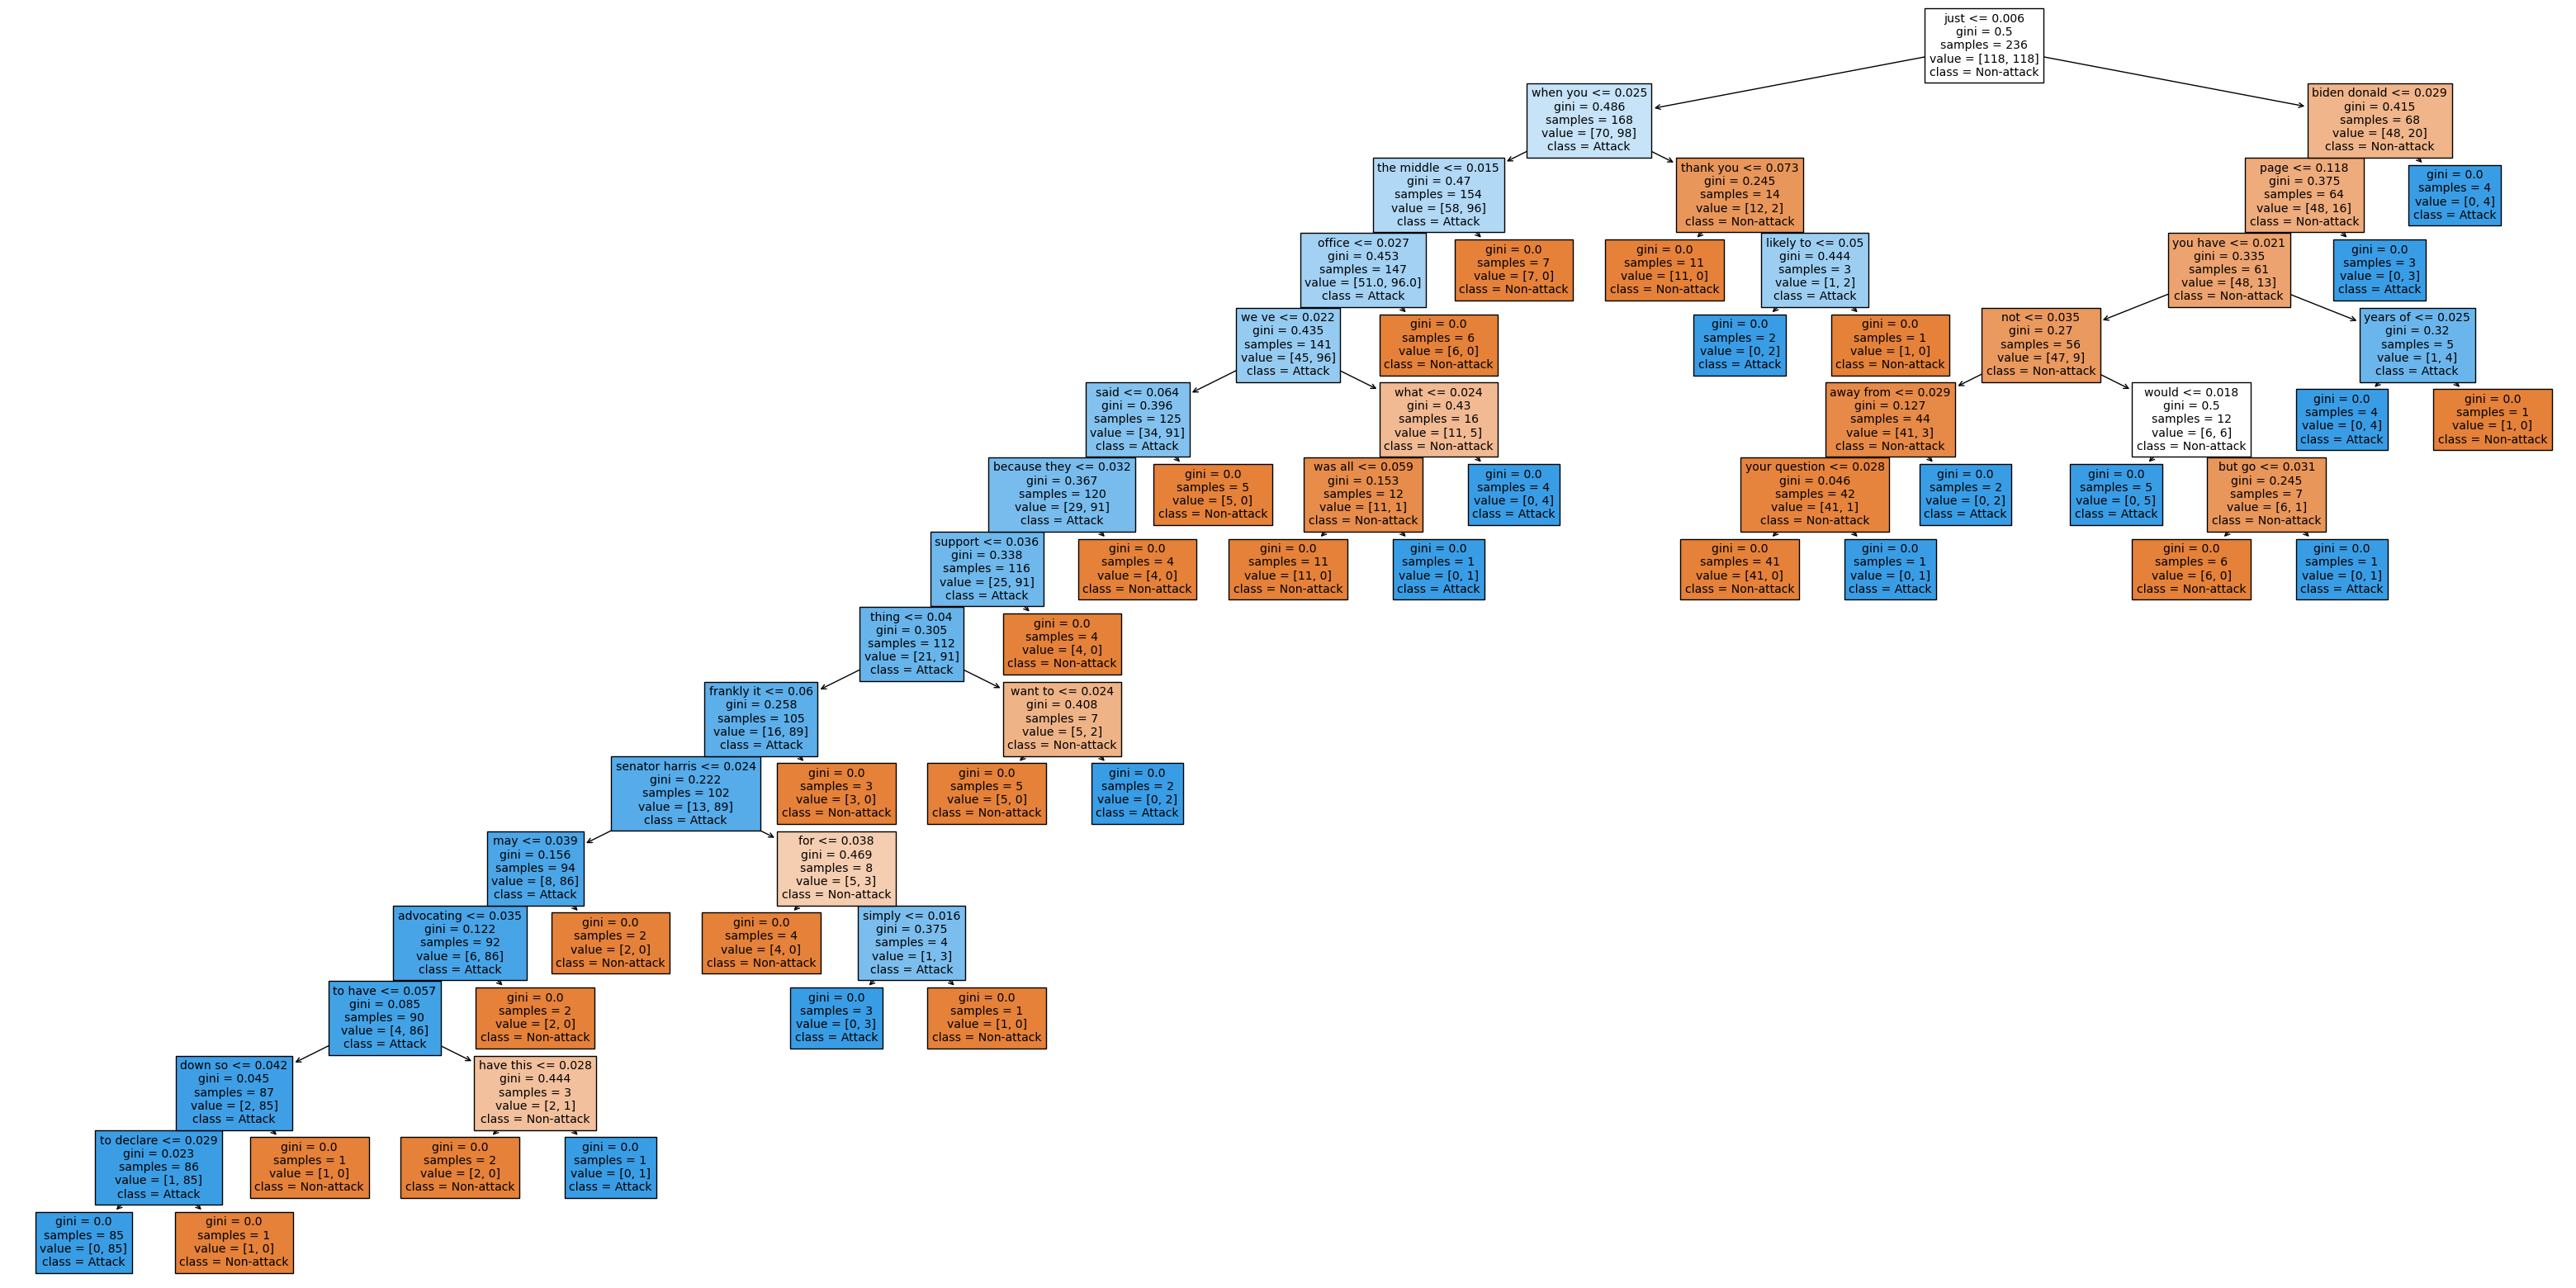

Results for k_fold = 8:
Mean Accuracy: 0.5032845345345346
Mean Precision: 0.5036104926350291
Mean Recall: 0.5036549707602339
Mean F1 Score: 0.49915038843581316

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.39      0.44        18
           1       0.50      0.61      0.55        18

    accuracy                           0.50        36
   macro avg       0.50      0.50      0.49        36
weighted avg       0.50      0.50      0.49        36

Confusion Matrix:
 [[ 7 11]
 [ 7 11]]


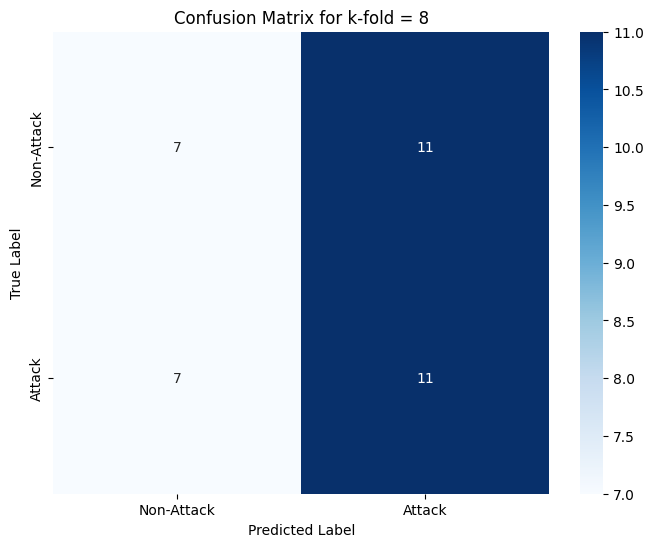

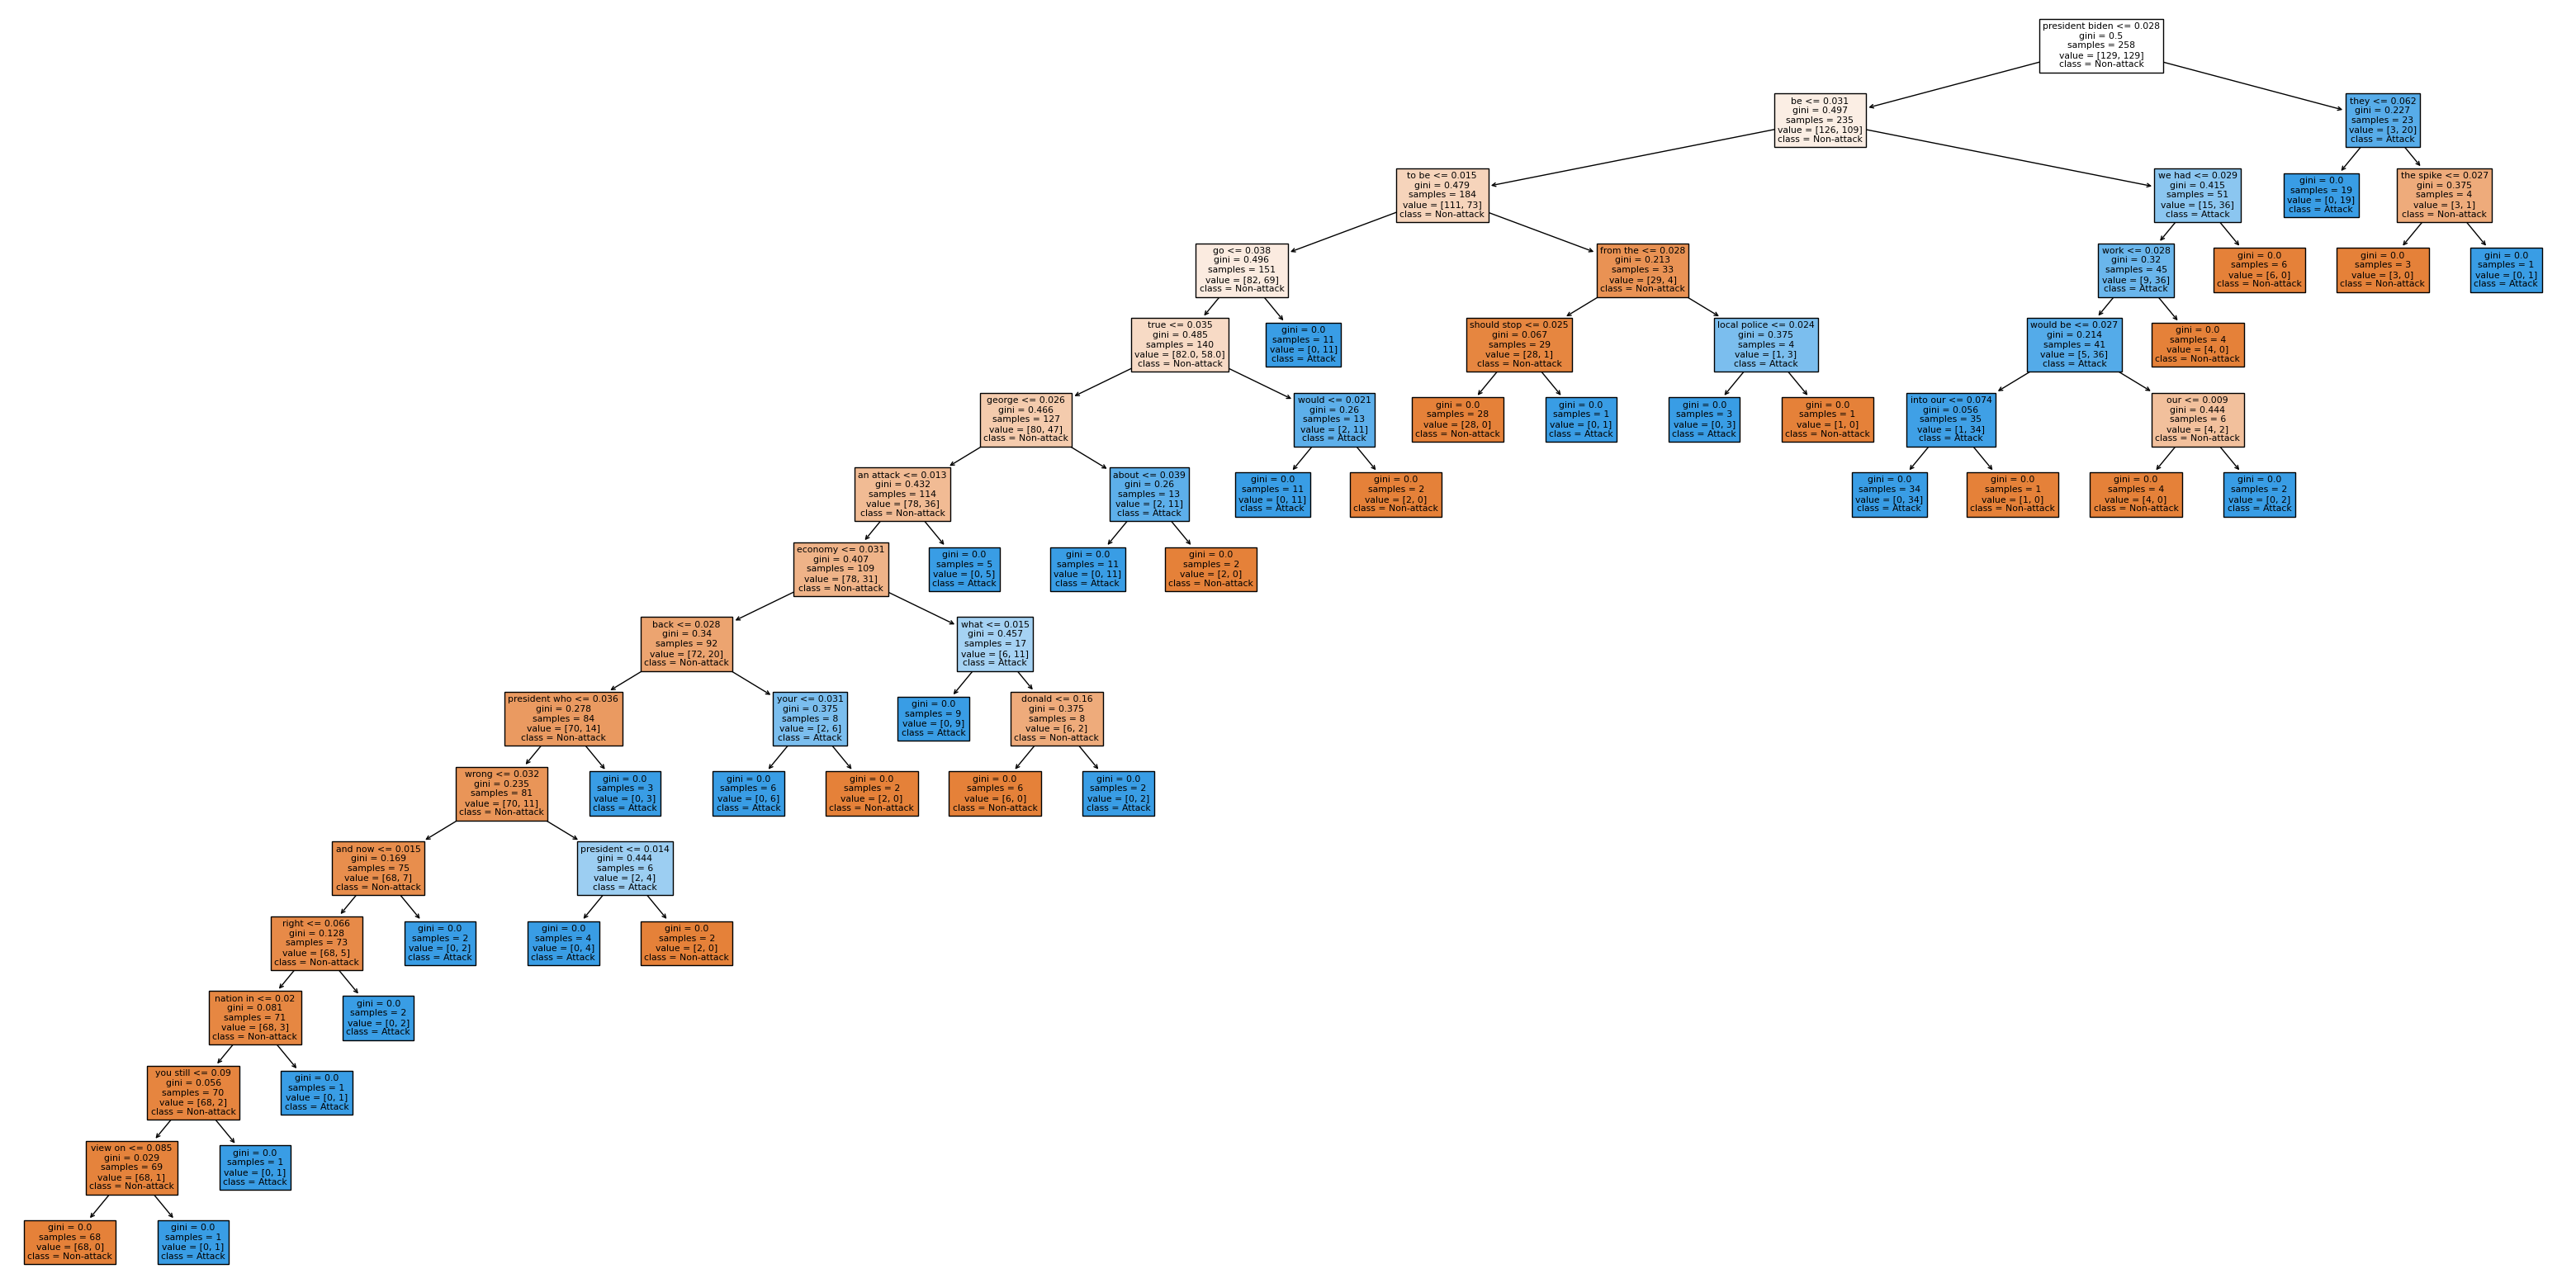

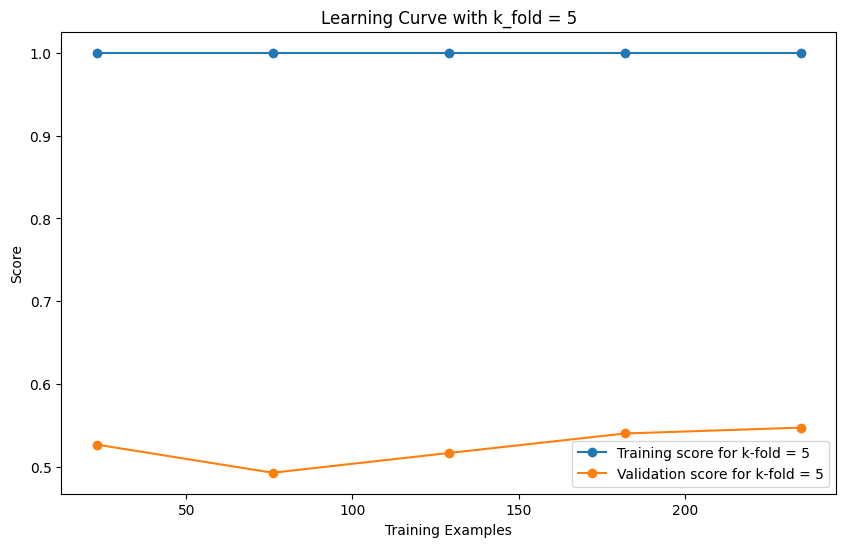

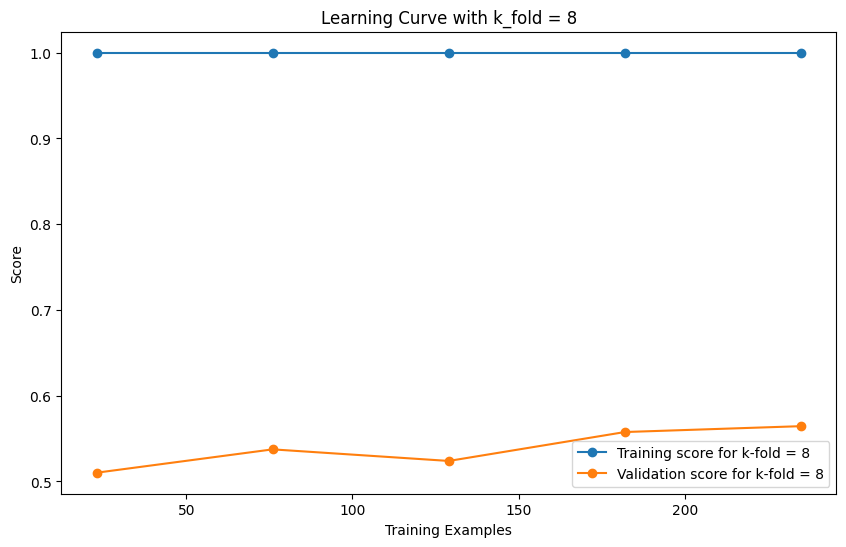

[[0.5407364114552893, 0.5418536464163026, 0.5406896551724139, 0.5388406421723183], [0.5032845345345346, 0.5036104926350291, 0.5036549707602339, 0.49915038843581316]]


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X = []
y = []
for ligne in new_lignes:
    X.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y.append(1)
    else:  # if equal Neither or Support
        y.append(0)

# Assuming X_baf and y_baf contain your text data and labels, respectively
minority_class = [X[i] for i in range(len(y)) if y[i] == 1]  # First minority class (e.g., Attack)
majority_class = [X[i] for i in range(len(y)) if y[i] == 0]    # Dominant class (e.g., Non-Attack)

# Define the number of samples to match for the majority class
num_majority_class = len(minority_class)

# Randomly sample from the majority class
undersampled_majority_class = random.sample(majority_class, num_majority_class)

# Combine the undersampled majority class with minority classes
X_undersampled = undersampled_majority_class + minority_class
y_undersampled = [0] * num_majority_class + [1] * len(minority_class) 

# Shuffle the data
combined = list(zip(X_undersampled, y_undersampled))
random.shuffle(combined)
X_undersampled, y_undersampled = zip(*combined)

y = y_undersampled

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf = []
for ligne in X_undersampled:
    new_l = " ".join(ligne) 
    X_tf.append(new_l)

X_tfidf = vectorizer.fit_transform(X_tf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result = []
accu = 0
train_scores_mean_list_5 = []
train_scores_mean_list_8 = []
val_scores_mean_list_5 = []
val_scores_mean_list_8 = []
lab_5 = []
lab_8 = []

for k_fold in k_folds: 
    result_kfold = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index, test_index in kf.split(X_tfidf, y):
        X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
        # Application de SMOTE sur les données d'entraînement
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Create the decision tree model
        clf = DecisionTreeClassifier(class_weight='balanced')
        # Train the model
        clf.fit(X_train_resampled, y_train_resampled)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=1))

    print(f"Results for k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_tree_aa.pkl', 'wb') as f:
            pickle.dump(vectorizer, f)
        with open('classifier_tree_aa.pkl', 'wb') as f:
            pickle.dump(clf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold.append(np.mean(f1_scores))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attack', 'Attack'], yticklabels=['Non-Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for k-fold = {k_fold}")
    plt.show()

    train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    if k_fold==5:
        train_scores_mean_list_5.append(train_scores_mean)
        val_scores_mean_list_5.append(val_scores_mean)
        lab_5.append(f"for k-fold = {k_fold}")
    if k_fold==8:
        train_scores_mean_list_8.append(train_scores_mean)
        val_scores_mean_list_8.append(val_scores_mean)
        lab_8.append(f"for k-fold = {k_fold}")
    
    # Extract feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
        
    # Visualize the decision tree
    plt.figure(figsize=(40, 20))
    plt.title(f"Visualize the decision tree with k_fold = {k_fold}")
    plot_tree(clf, feature_names=feature_names, class_names=['Non-attack', 'Attack'], filled=True)
    plt.savefig(f'plot_tree_{k_fold}_aa.png')
    plt.show()
    result.append(result_kfold)

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5)):
    lab_train = "Training score " + lab_5[i]
    lab_val = "Validation score "+ lab_5[i]
    plt.plot(train_sizes, train_scores_mean_list_5[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8)):
    lab_train = "Training score " + lab_8[i]
    lab_val = "Validation score "+ lab_8[i]
    plt.plot(train_sizes, train_scores_mean_list_8[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()
    
print(result)        

### Extraction

In [37]:
import random

# Load the vectorizer and classifier
with open('vectorizer_tree_aa.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier_tree_aa.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_tree_aaf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$context$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia
                while indice2==ia:
                    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    if predictions[0] == 1 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
        writer = csv.writer(file)
print('done')

done


## Bipolar Argumentation Framework

Results for k_fold = 5:
Mean Accuracy: 0.47234042553191485
Mean Precision: 0.37853390182110447
Mean Recall: 0.3776736100555854
Mean F1 Score: 0.37763826266467604

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.30      0.32        30
           1       0.20      0.17      0.19        29
           2       0.61      0.66      0.63        82

    accuracy                           0.48       141
   macro avg       0.38      0.38      0.38       141
weighted avg       0.46      0.48      0.47       141

Confusion Matrix:
 [[ 9  5 16]
 [ 5  5 19]
 [13 15 54]]


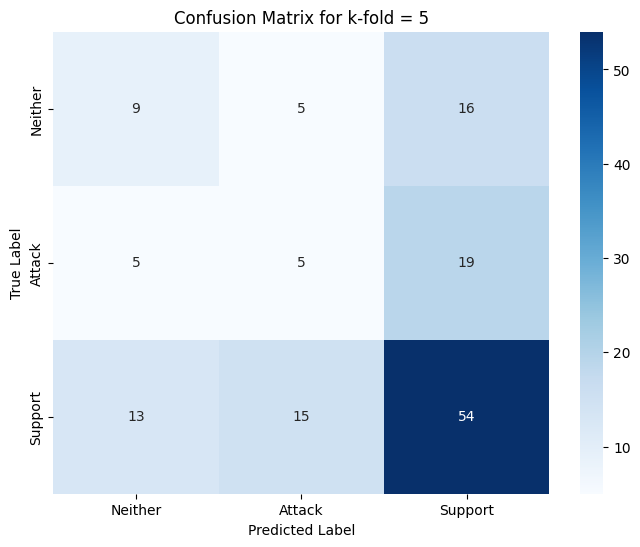

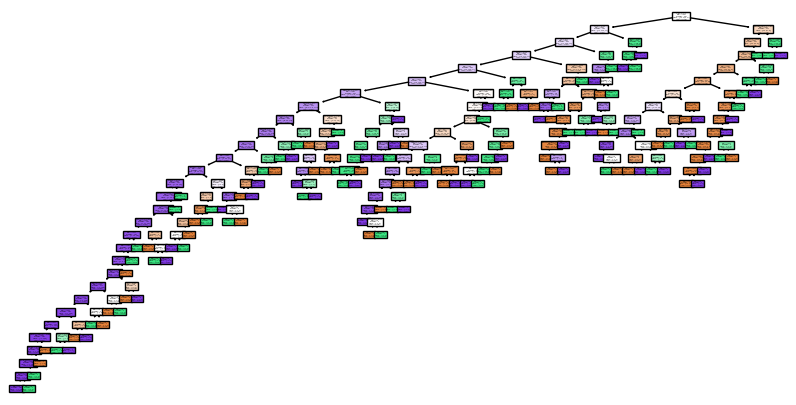

Results for k_fold = 8:
Mean Accuracy: 0.4850772471910112
Mean Precision: 0.39690152134428697
Mean Recall: 0.39572528291568543
Mean F1 Score: 0.3934001889179653

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.38      0.33      0.35        18
           2       0.62      0.73      0.67        51

    accuracy                           0.49        88
   macro avg       0.33      0.35      0.34        88
weighted avg       0.43      0.49      0.46        88

Confusion Matrix:
 [[ 0  4 15]
 [ 4  6  8]
 [ 8  6 37]]


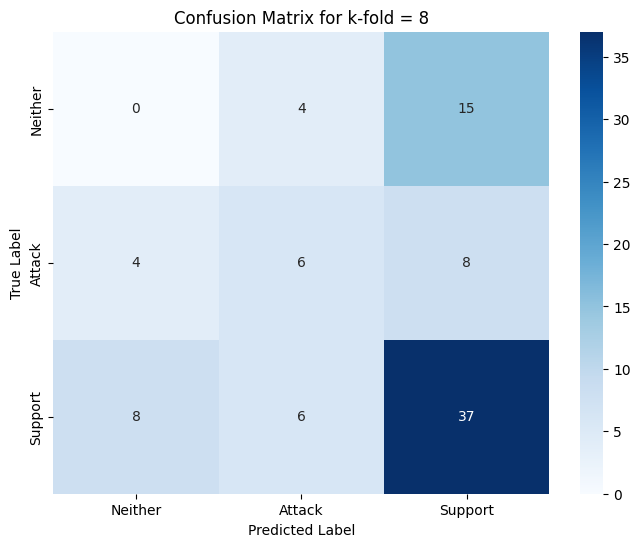

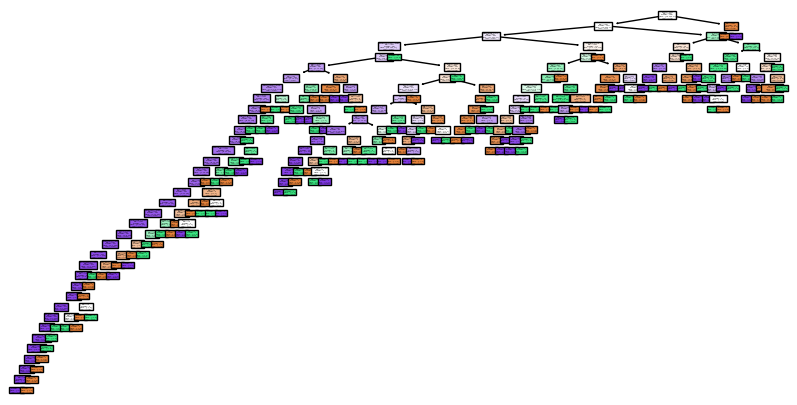

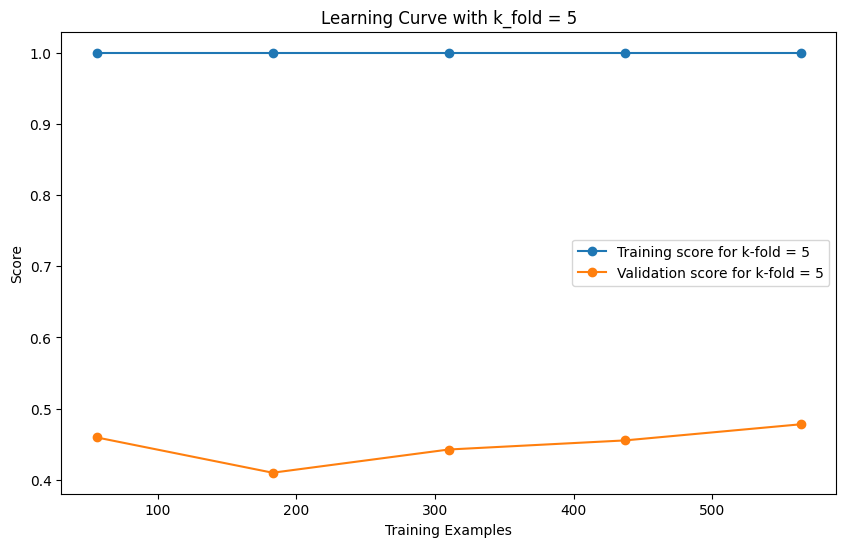

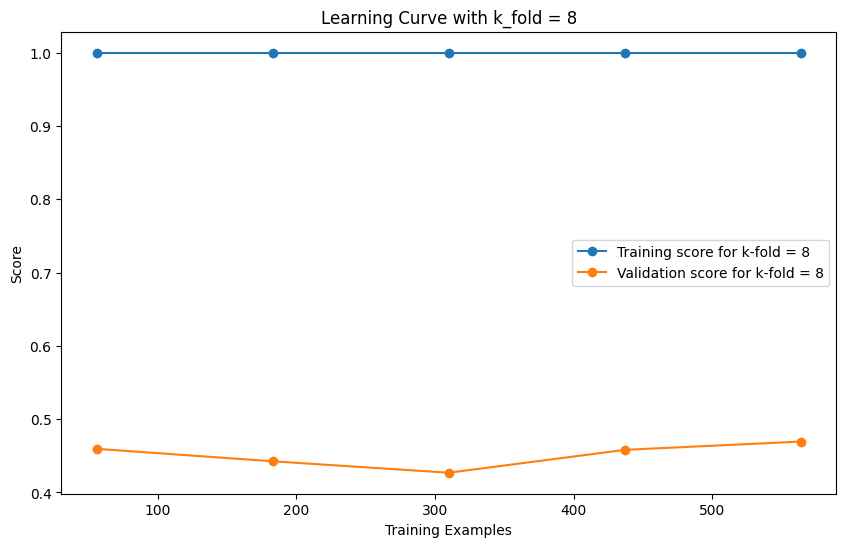

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


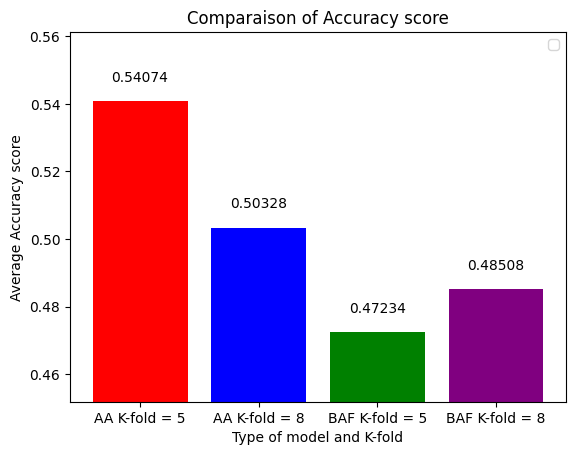

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


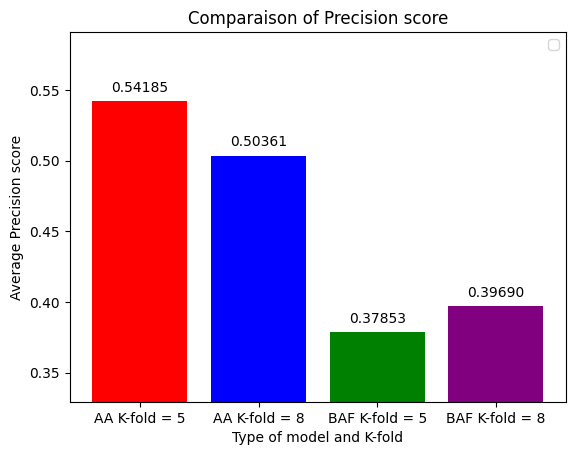

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


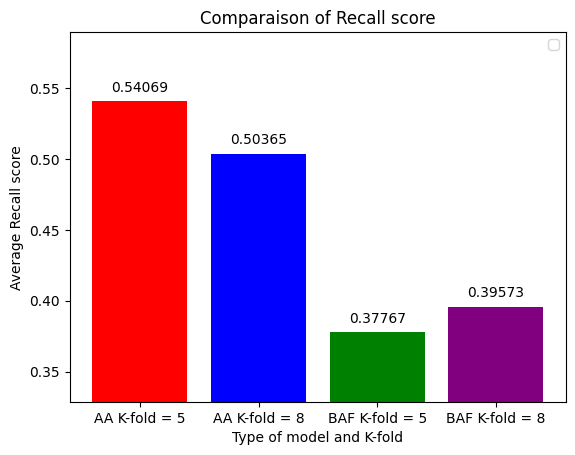

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


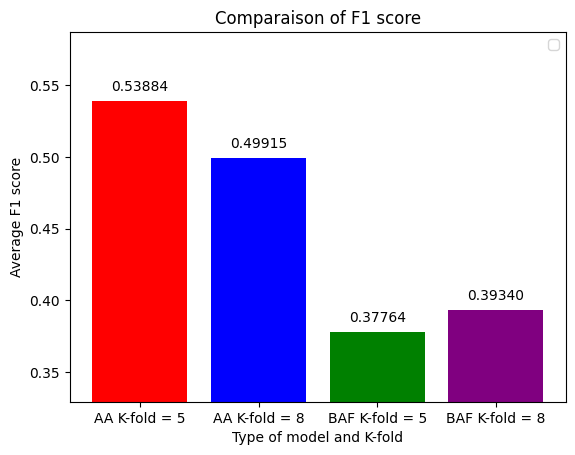

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Assuming X_baf and y_baf contain your text data and labels, respectively
minority_class_1_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 1]  # First minority class (e.g., Attack)
minority_class_2_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 2]  # Second minority class
majority_class_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 0]    # Dominant class (e.g., Non-Attack)

# Define the number of samples to match for the majority class
num_minority_class_1 = len(minority_class_1_baf)
num_minority_class_2 = len(minority_class_2_baf)
num_majority_class = min(num_minority_class_1, num_minority_class_2)  # Choose the smallest class size to balance

# Randomly sample from the majority class
undersampled_majority_class = random.sample(majority_class_baf, num_majority_class)

# Combine the undersampled majority class with minority classes
X_undersampled_baf = undersampled_majority_class + minority_class_1_baf + minority_class_2_baf
y_undersampled_baf = [0] * num_majority_class + [1] * len(minority_class_1_baf) + [2] * len(minority_class_2_baf)

# Shuffle the data
combined_baf = list(zip(X_undersampled_baf, y_undersampled_baf))
random.shuffle(combined_baf)
X_undersampled_baf, y_undersampled_baf = zip(*combined_baf)

y_baf = y_undersampled_baf


# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf_baf = []
for ligne in X_undersampled_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result_baf = []
accu = 0
train_scores_mean_list_5_baf = []
train_scores_mean_list_8_baf = []
val_scores_mean_list_5_baf = []
val_scores_mean_list_8_baf = []
lab_5_baf = []
lab_8_baf = []

for k_fold in k_folds: 
    result_kfold_baf = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index_baf, test_index_baf in kf.split(X_tfidf_baf, y_baf):
        X_train_baf, X_test_baf = X_tfidf_baf[train_index_baf], X_tfidf_baf[test_index_baf]
        y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
    
        # Application de SMOTE sur les données d'entraînement
        smote_baf = SMOTE(random_state=42)
        X_train_resampled_baf, y_train_resampled_baf = smote_baf.fit_resample(X_train_baf, y_train_baf)

        # Create the decision tree model
        clf_baf = DecisionTreeClassifier(class_weight='balanced')
        # Train the model
        clf_baf.fit(X_train_resampled_baf, y_train_resampled_baf)

        # Make predictions on the test set
        y_pred_baf = clf_baf.predict(X_test_baf)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test_baf, y_pred_baf))
        precisions.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        recalls.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))

    print(f"Results for k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold_baf.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_tree_baf.pkl', 'wb') as f:
            pickle.dump(vectorizer_baf, f)
        with open('classifier_tree_baf.pkl', 'wb') as f:
            pickle.dump(clf_baf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold_baf.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold_baf.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold_baf.append(np.mean(f1_scores))
    print("Classification Report:\n", classification_report(y_test_baf, y_pred_baf, zero_division=0))
    conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
    print("Confusion Matrix:\n",conf_matrix_baf )
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for k-fold = {k_fold}")
    plt.show()

    train_sizes, train_scores, val_scores = learning_curve(clf_baf, X_tfidf_baf, y_baf, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
        
    if k_fold==5:
        train_scores_mean_list_5_baf.append(train_scores_mean)
        val_scores_mean_list_5_baf.append(val_scores_mean)
        lab_5_baf.append(f"for k-fold = {k_fold}")
    if k_fold==8:
        train_scores_mean_list_8_baf.append(train_scores_mean)
        val_scores_mean_list_8_baf.append(val_scores_mean)
        lab_8_baf.append(f"for k-fold = {k_fold}")
    
    # Extract feature names from the vectorizer
    feature_names_baf = vectorizer_baf.get_feature_names_out()
        
    # Visualize the decision tree
    plt.figure(figsize=(10, 5))
    plot_tree(clf_baf, feature_names=feature_names_baf, class_names=['Neither', 'Attack', 'Support'], filled=True)
    plt.savefig(f'plot_tree_{k_fold}_baf.png', dpi=1000, format='png')
    plt.show()
    result_baf.append(result_kfold_baf)

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5_baf)):
    lab_train = "Training score " + lab_5_baf[i]
    lab_val = "Validation score "+ lab_5_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_5_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8_baf)):
    lab_train = "Training score " + lab_8_baf[i]
    lab_val = "Validation score "+ lab_8_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_8_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

result_5 = result[0]
result_8 = result[1]

result_baf_5 = result_baf[0]
result_baf_8 = result_baf[1]

metric = ['Accuracy','Precision','Recall','F1']
colors = ['red', 'blue', 'green', 'purple']

for i in range(len(metric)):
    x = ['AA K-fold = 5','AA K-fold = 8', 'BAF K-fold = 5','BAF K-fold = 8']

    y = [result_5[i],result_8[i],result_baf_5[i],result_baf_8[i]]
    # Tracer un graphique en barres avec des couleurs différentes
    bars = plt.bar(x, y, color=colors)
    
    # Ajouter les annotations au-dessus des barres
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.5f}', ha='center', va='bottom')
    
    ma=max(y)
    mi=min(y)
    h = (ma-mi)*0.3
    sup = ma + h
    inf = mi - h
    plt.ylim(inf,sup)
    plt.title(f'Comparaison of {metric[i]} score')
    plt.xlabel('Type of model and K-fold')
    plt.ylabel(f'Average {metric[i]} score')
    plt.legend()
    plt.show()


#### Oversampling

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Assume X and y contain your text data and labels, respectively
minority_class_1_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 1]  # First minority class (Attack)
minority_class_2_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 2]  # Second minority class
majority_class_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 0]    # Dominant class (Non-Attack)

# Oversample the minority classes
oversample_minority_1_baf = random.choices(minority_class_1_baf, k=len(majority_class_baf))
oversample_minority_2_baf = random.choices(minority_class_2_baf, k=len(majority_class_baf))

# Combine oversampled minority classes with majority class
X_oversampled_baf = majority_class_baf + oversample_minority_1_baf + oversample_minority_2_baf
y_oversampled_baf = [0] * len(majority_class_baf) + [1] * len(oversample_minority_1_baf) + [2] * len(oversample_minority_2_baf)

# Shuffle the data to mix classes
combined_baf = list(zip(X_oversampled_baf, y_oversampled_baf))
random.shuffle(combined_baf)
X_oversampled_baf, y_oversampled_baf = zip(*combined_baf)

# Convert back to lists if needed
X_oversampled_baf = list(X_oversampled_baf)
y_oversampled_baf = list(y_oversampled_baf)

y_baf=y_oversampled_baf

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf_baf = []
for ligne in X_oversampled_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result_baf = []
accu = 0
train_scores_mean_list_5_baf = []
train_scores_mean_list_8_baf = []
val_scores_mean_list_5_baf = []
val_scores_mean_list_8_baf = []
lab_5_baf = []
lab_8_baf = []

for k_fold in k_folds: 
    result_kfold_baf = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index_baf, test_index_baf in kf.split(X_tfidf_baf, y_baf):
        X_train_baf, X_test_baf = X_tfidf[train_index_baf], X_tfidf_baf[test_index_baf]
        y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
    
        # Application de SMOTE sur les données d'entraînement
        smote_baf = SMOTE(random_state=42)
        X_train_resampled_baf, y_train_resampled_baf = smote_baf.fit_resample(X_train_baf, y_train_baf)

        # Create the decision tree model
        clf_baf = DecisionTreeClassifier(class_weight='balanced')
        # Train the model
        clf_baf.fit(X_train_resampled_baf, y_train_resampled_baf)

        # Make predictions on the test set
        y_pred_baf = clf_baf.predict(X_test_baf)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test_baf, y_pred_baf))
        precisions.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        recalls.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))

    print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold_baf.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_tree_baf.pkl', 'wb') as f:
            pickle.dump(vectorizer_baf, f)
        with open('classifier_tree_baf.pkl', 'wb') as f:
            pickle.dump(clf_baf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold_baf.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold_baf.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold_baf.append(np.mean(f1_scores))
    print("Classification Report:\n", classification_report(y_test_baf, y_pred_baf, zero_division=0))
    conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
    print("Confusion Matrix:\n",conf_matrix_baf )
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for k-fold = {k_fold}")
    plt.show()

    train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
        
    if k_fold==5:
        train_scores_mean_list_5_baf.append(train_scores_mean)
        val_scores_mean_list_5_baf.append(val_scores_mean)
        lab_5_baf.append(f"for k-fold = {k_fold}")
    if k_fold==8:
        train_scores_mean_list_8_baf.append(train_scores_mean)
        val_scores_mean_list_8_baf.append(val_scores_mean)
        lab_8_baf.append(f"for k-fold = {k_fold}")
    
    # Extract feature names from the vectorizer
    feature_names_baf = vectorizer_baf.get_feature_names_out()
        
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf_baf, feature_names=feature_names_baf, class_names=['Neither', 'Attack', 'Support'], filled=True)
    plt.show()
    result_baf.append(result_kfold_baf)

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5_baf)):
    lab_train = "Training score " + lab_5_baf[i]
    lab_val = "Validation score "+ lab_5_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_5_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8_baf)):
    lab_train = "Training score " + lab_8_baf[i]
    lab_val = "Validation score "+ lab_8_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_8_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

result_5 = result[0]
result_8 = result[1]

result_baf_5 = result_baf[0]
result_baf_8 = result_baf[1]

metric = ['Accuracy','Precision','Recall','F1']
colors = ['red', 'blue', 'green', 'purple']

for i in range(len(metric)):
    x = ['AA K-fold = 5','AA K-fold = 8', 'BAF K-fold = 5','BAF K-fold = 8']

    y = [result_5[i],result_8[i],result_baf_5[i],result_baf_8[i]]
    # Tracer un graphique en barres avec des couleurs différentes
    bars = plt.bar(x, y, color=colors)
    
    # Ajouter les annotations au-dessus des barres
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.5f}', ha='center', va='bottom')
    
    ma=max(y)
    mi=min(y)
    h = (ma-mi)*0.3
    sup = ma + h
    inf = mi - h
    plt.ylim(inf,sup)
    plt.title(f'Comparaison of {metric[i]} score')
    plt.xlabel('Type of model and K-fold')
    plt.ylabel(f'Average {metric[i]} score')
    plt.legend()
    plt.show()


IndexError: index (188) out of range

### Extraction

In [29]:
import random

# Load the vectorizer and classifier
with open('vectorizer_tree_baf.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier_tree_baf.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_tree_baf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$context$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia
                while indice2==ia:
                    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    if predictions[0] == 1 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
                    elif predictions[0] == 2 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Support$,$This is a support',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
        writer = csv.writer(file)
print('done')

done


# Random Forest

## Abstract Argumentation Framework

Results for k_fold = 5:
Mean Accuracy: 0.5544126241963763
Mean Precision: 0.5576915550983228
Mean Recall: 0.5551724137931036
Mean F1 Score: 0.5494289578402405

Confusion Matrix:
 [[17 12]
 [14 15]]


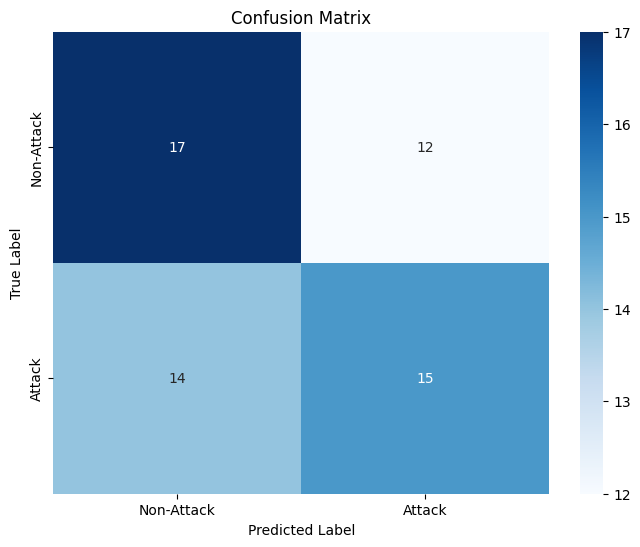

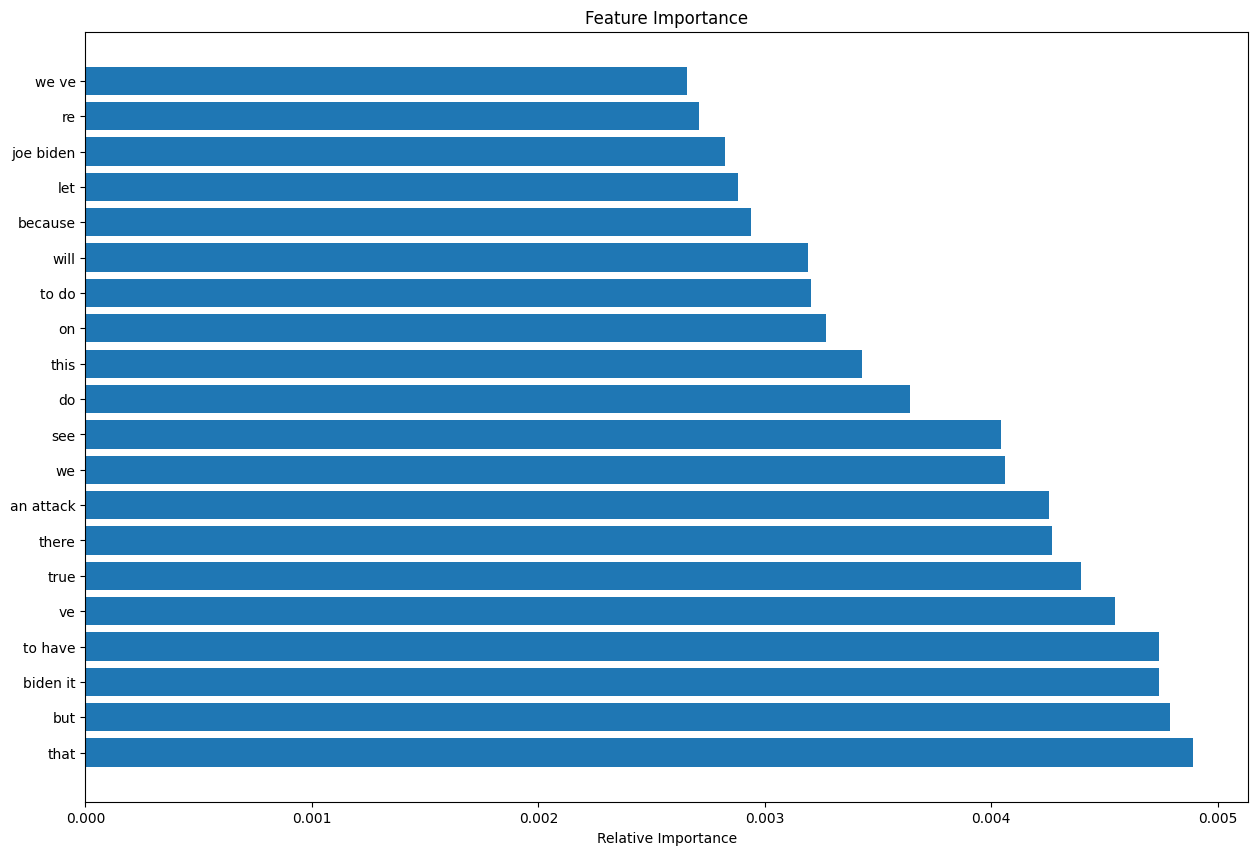

Results for k_fold = 8:
Mean Accuracy: 0.5642830330330331
Mean Precision: 0.565554191519265
Mean Recall: 0.5645102339181287
Mean F1 Score: 0.5612367177374988

Confusion Matrix:
 [[11  7]
 [10  8]]


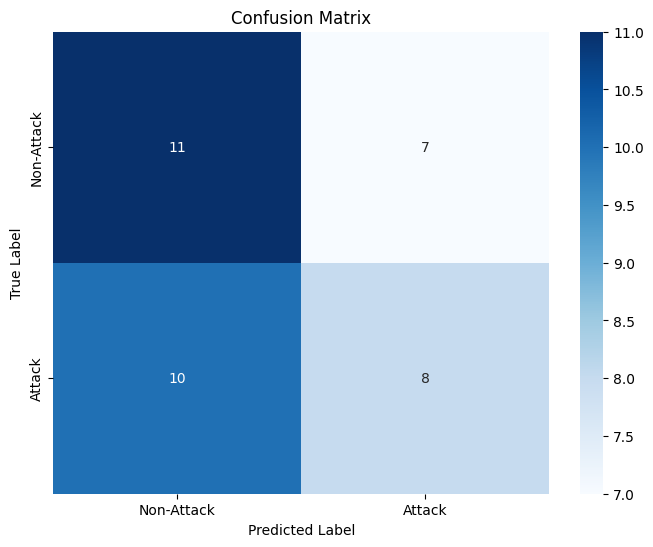

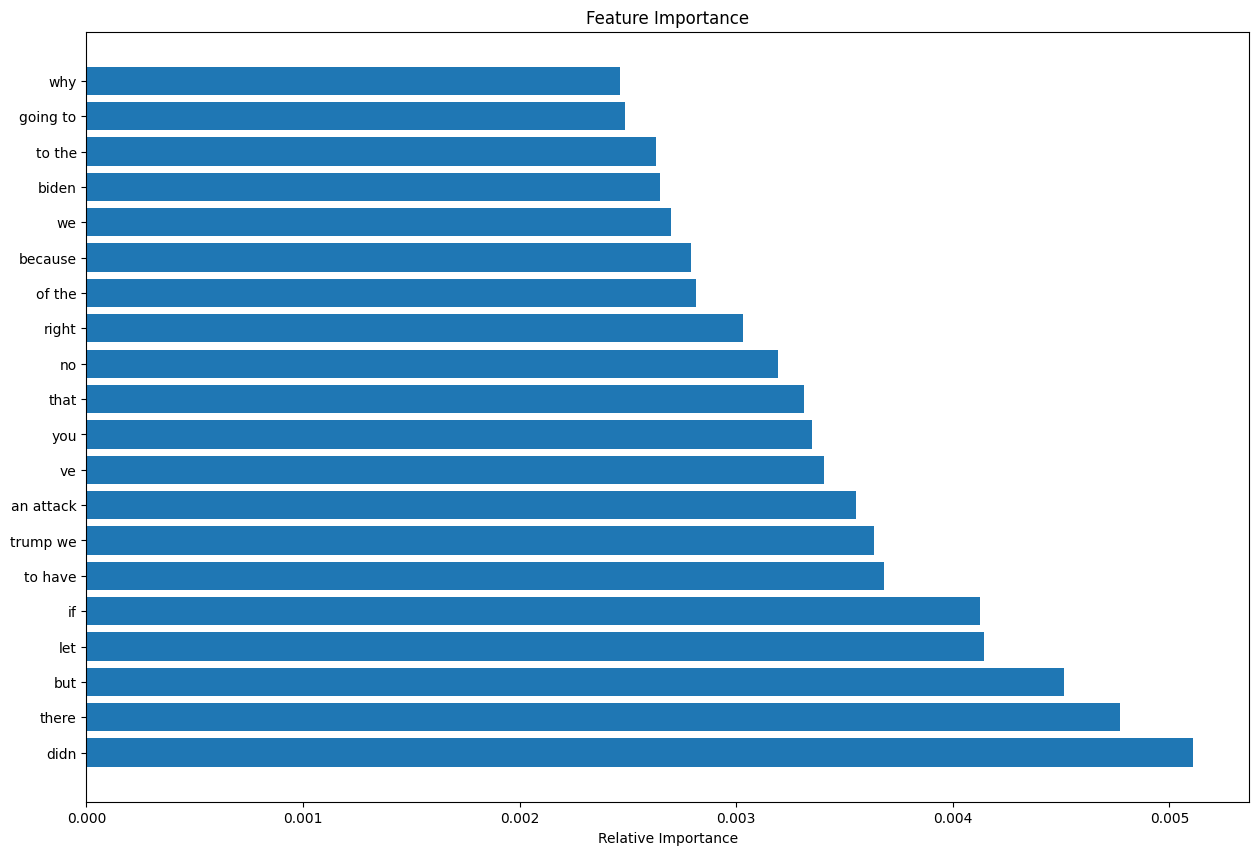

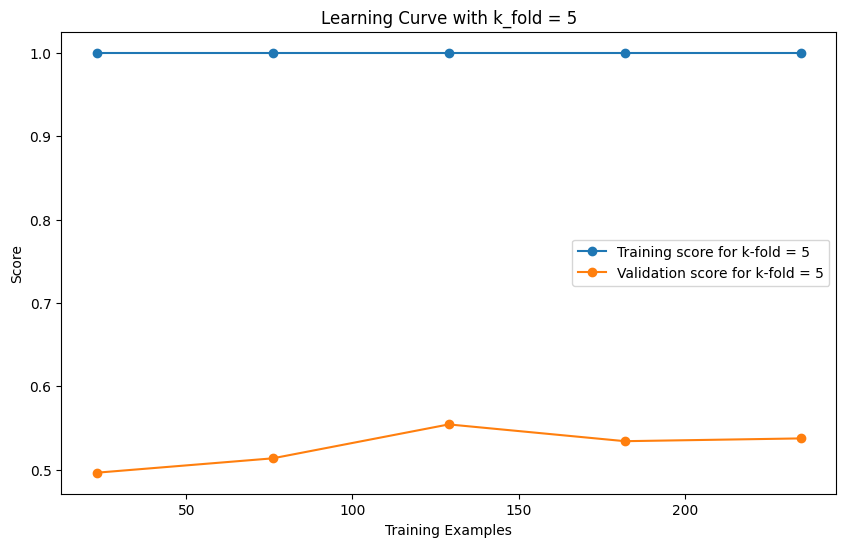

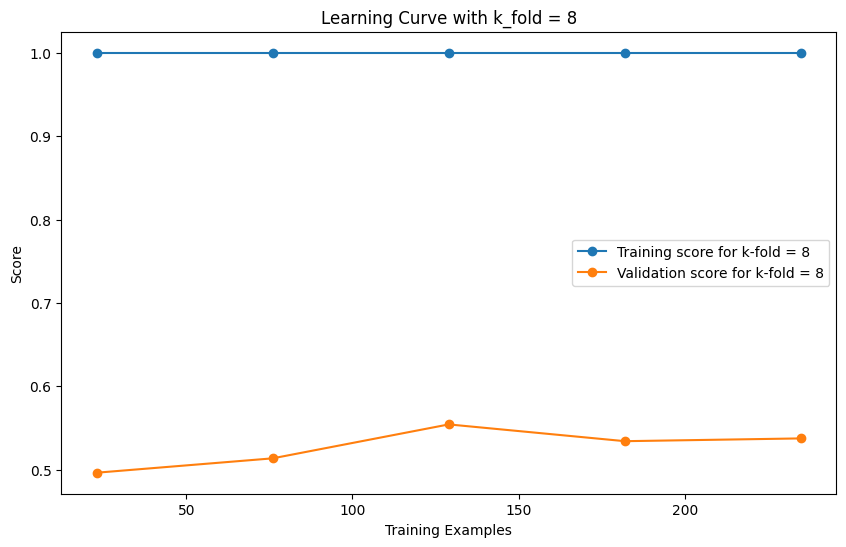

[[0.5544126241963763, 0.5576915550983228, 0.5551724137931036, 0.5494289578402405], [0.5642830330330331, 0.565554191519265, 0.5645102339181287, 0.5612367177374988]]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

X = []
y = []
for ligne in new_lignes:
    #X.append(ligne[0]['speakers'] + ligne[0]['phrases'] + ligne[3:])
    X.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y.append(1)
    else:  # if equal Neither or Support
        y.append(0)

# Assuming X_baf and y_baf contain your text data and labels, respectively
minority_class = [X[i] for i in range(len(y)) if y[i] == 1]  # First minority class (e.g., Attack)
majority_class = [X[i] for i in range(len(y)) if y[i] == 0]    # Dominant class (e.g., Non-Attack)

# Define the number of samples to match for the majority class
num_majority_class = len(minority_class)

# Randomly sample from the majority class
undersampled_majority_class = random.sample(majority_class, num_majority_class)

# Combine the undersampled majority class with minority classes
X_undersampled = undersampled_majority_class + minority_class
y_undersampled = [0] * num_majority_class + [1] * len(minority_class) 

# Shuffle the data
combined = list(zip(X_undersampled, y_undersampled))
random.shuffle(combined)
X_undersampled, y_undersampled = zip(*combined)

y = y_undersampled

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf = []
for ligne in X_undersampled:
    new_l = " ".join(ligne) 
    X_tf.append(new_l)

X_tfidf = vectorizer.fit_transform(X_tf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result = []
accu = 0
train_scores_mean_list_5 = []
train_scores_mean_list_8 = []
val_scores_mean_list_5 = []
val_scores_mean_list_8 = []
lab_5 = []
lab_8 = []

for k_fold in k_folds: 
    result_kfold = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index, test_index in kf.split(X_tfidf, y):
        X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
        # Application de SMOTE sur les données d'entraînement
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Create the decision tree model
        clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        # Train the model
        clf.fit(X_train_resampled, y_train_resampled)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=1))

    print(f"Results for k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_forest_aa.pkl', 'wb') as f:
            pickle.dump(vectorizer, f)
        with open('classifier_forest_aa.pkl', 'wb') as f:
            pickle.dump(clf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold.append(np.mean(f1_scores))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attack', 'Attack'], yticklabels=['Non-Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    train_sizes, train_scores, val_scores = learning_curve(clf, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    if k_fold==5:
        train_scores_mean_list_5.append(train_scores_mean)
        val_scores_mean_list_5.append(val_scores_mean)
        lab_5.append(f"for k-fold = {k_fold}")
    if k_fold==8:
        train_scores_mean_list_8.append(train_scores_mean)
        val_scores_mean_list_8.append(val_scores_mean)
        lab_8.append(f"for k-fold = {k_fold}")
    
    # Extract feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Plotting feature importance
    feature_importances = clf.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    names = [vectorizer.get_feature_names_out()[i] for i in indices]
    
    plt.figure(figsize=(15, 10))
    plt.title("Feature Importance")
    plt.barh(range(len(indices[:20])), feature_importances[indices][:20], align='center')
    plt.yticks(range(len(indices[:20])), [names[i] for i in range(20)])
    plt.xlabel('Relative Importance')
    plt.show()
    
    result.append(result_kfold)

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5)):
    lab_train = "Training score " + lab_5[i]
    lab_val = "Validation score "+ lab_5[i]
    plt.plot(train_sizes, train_scores_mean_list_5[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8)):
    lab_train = "Training score " + lab_8[i]
    lab_val = "Validation score "+ lab_8[i]
    plt.plot(train_sizes, train_scores_mean_list_8[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

print(result)        

#### Normal

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.8752380952380954
Mean Precision: 0.9371428571428572
Mean Recall: 0.5333333333333333
Mean F1 Score: 0.5163967611336033

Confusion Matrix:
 [[18  0]
 [ 2  0]]


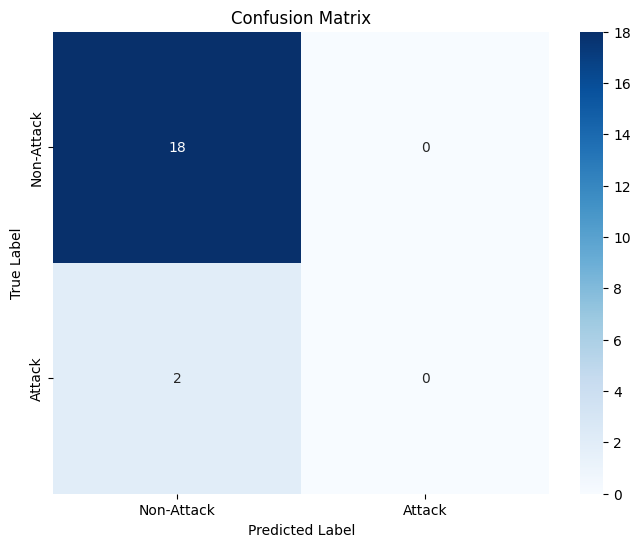

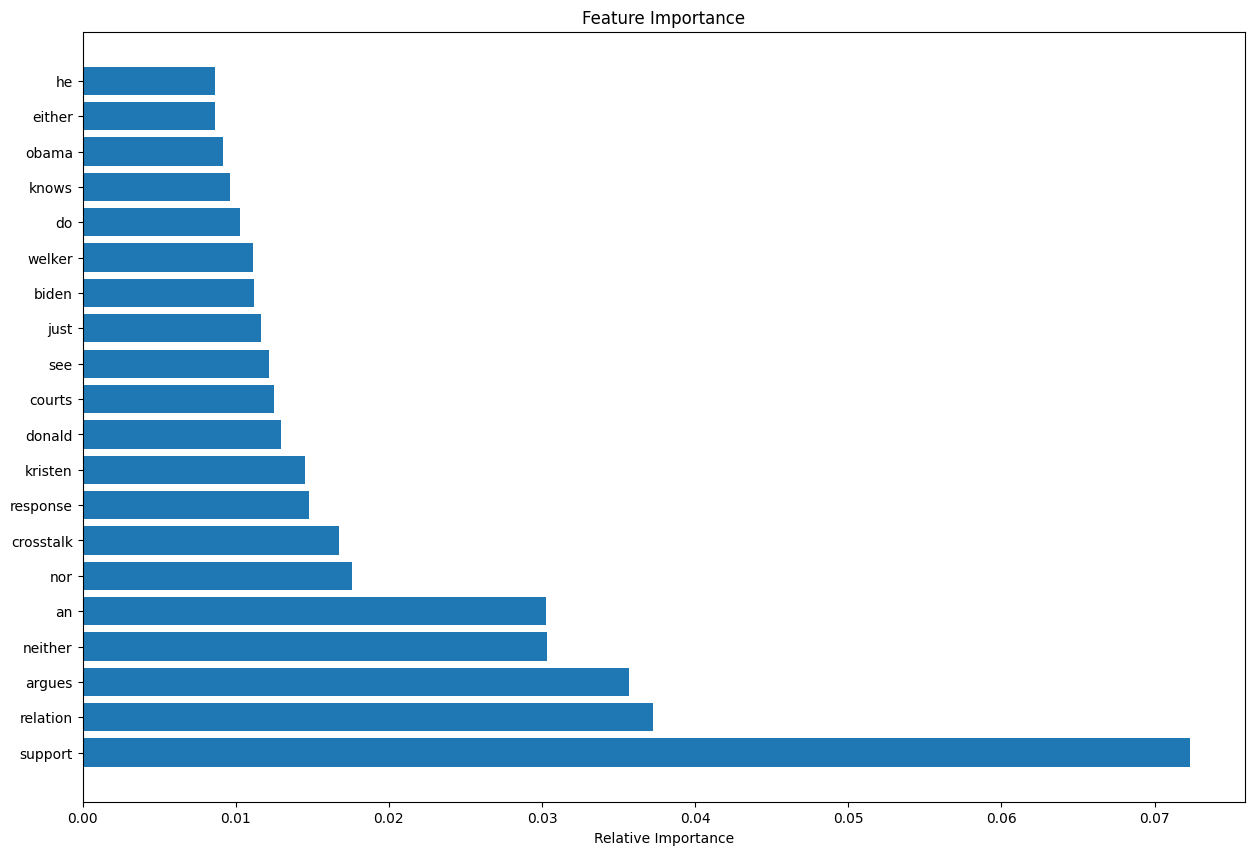

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.8653846153846154
Mean Precision: 0.9326923076923077
Mean Recall: 0.5
Mean F1 Score: 0.46375

Confusion Matrix:
 [[11  0]
 [ 2  0]]


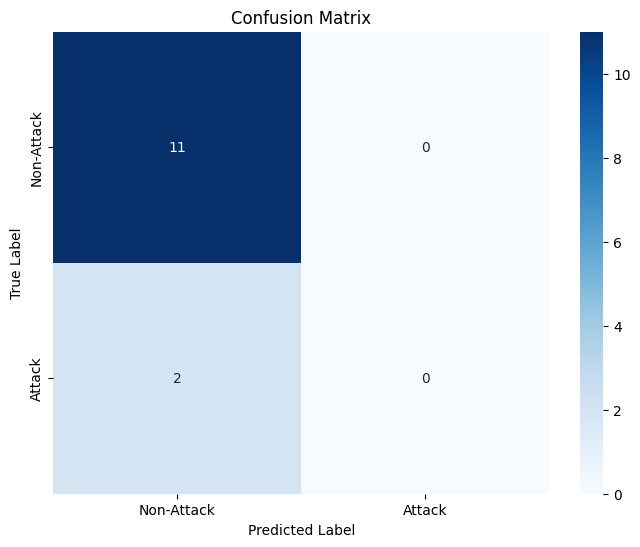

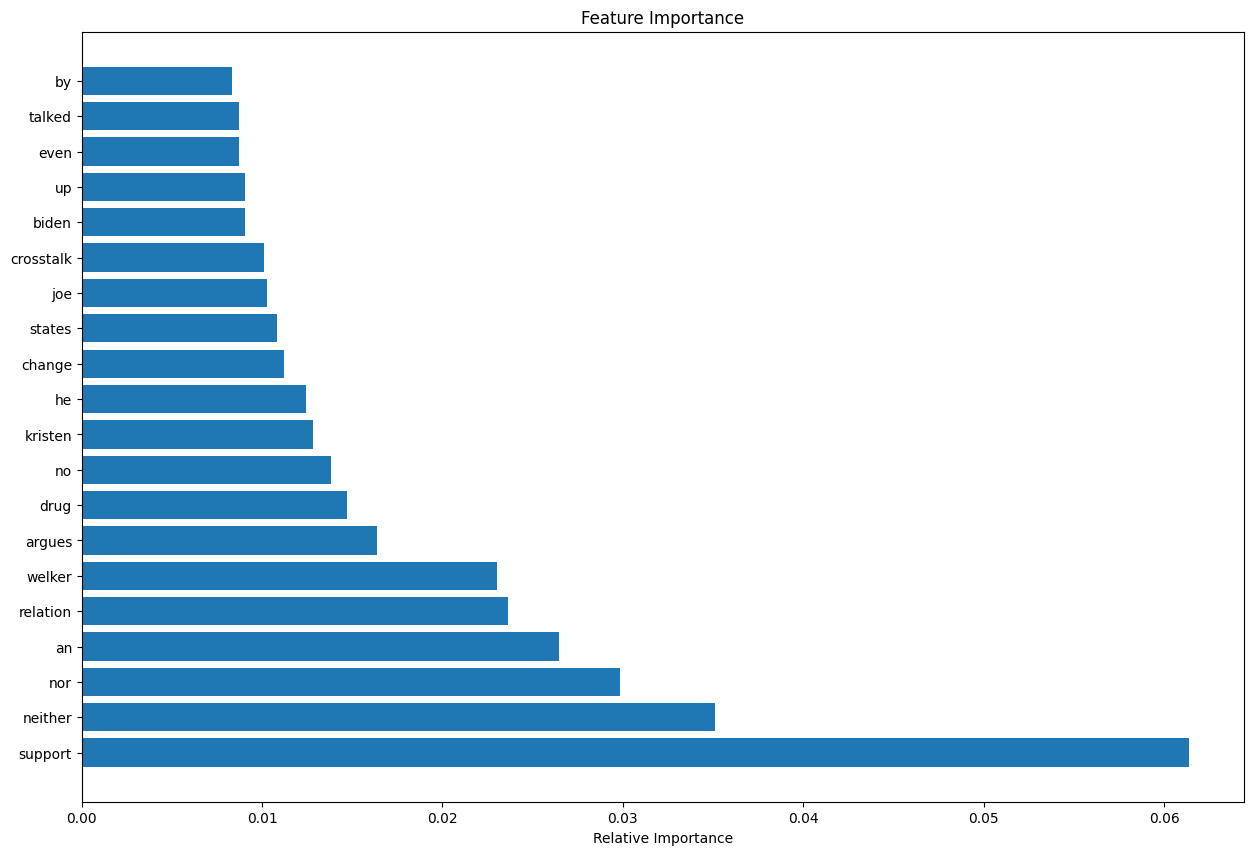

[[0.8752380952380954, 0.9371428571428572, 0.5333333333333333, 0.5163967611336033], [0.8653846153846154, 0.9326923076923077, 0.5, 0.46375]]


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

X = []
y = []
for ligne in new_lignes:
    #X.append(ligne[0]['speakers'] + ligne[0]['phrases'] + ligne[3:])
    X.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y.append(1)
    else:  # if equal Neither or Support
        y.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tf = []
for ligne in X:
    new_l = " ".join(ligne) 
    X_tf.append(new_l)

X_tfidf = vectorizer.fit_transform(X_tf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result = []
accu = 0

for k_fold in k_folds: 
    result_kfold = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index, test_index in kf.split(X_tfidf, y):
        X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
        # Application de SMOTE sur les données d'entraînement
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Create the decision tree model
        clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        # Train the model
        clf.fit(X_train_resampled, y_train_resampled)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=1))

    print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_forest_aa.pkl', 'wb') as f:
            pickle.dump(vectorizer, f)
        with open('classifier_forest_aa.pkl', 'wb') as f:
            pickle.dump(clf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold.append(np.mean(f1_scores))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attack', 'Attack'], yticklabels=['Non-Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Extract feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Plotting feature importance
    feature_importances = clf.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    names = [vectorizer.get_feature_names_out()[i] for i in indices]
    
    plt.figure(figsize=(15, 10))
    plt.title("Feature Importance")
    plt.barh(range(len(indices[:20])), feature_importances[indices][:20], align='center')
    plt.yticks(range(len(indices[:20])), [names[i] for i in range(20)])
    plt.xlabel('Relative Importance')
    plt.show()
    
    result.append(result_kfold)
    
print(result)        

### Extraction

In [14]:
import random

# Load the vectorizer and classifier
with open('vectorizer_forest_aa.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('classifier_forest_aa.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_forest_aaf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$context$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia
                while indice2==ia:
                    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    if predictions[0] == 1 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
        writer = csv.writer(file)
print('done')

done


## Bipolar Argumentation Framework

Results for k_fold = 5:
Mean Accuracy: 0.5319148936170213
Mean Precision: 0.3998714982423029
Mean Recall: 0.3839311718418389
Mean F1 Score: 0.3791108940427594

Confusion Matrix:
 [[ 4  3 23]
 [ 4  4 21]
 [12  7 63]]


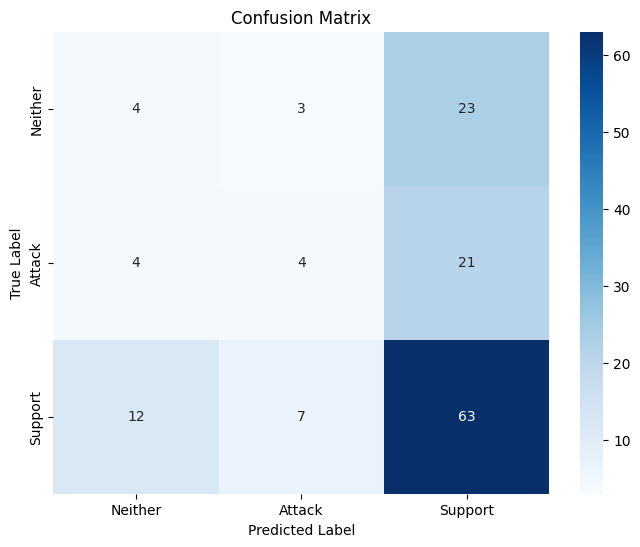

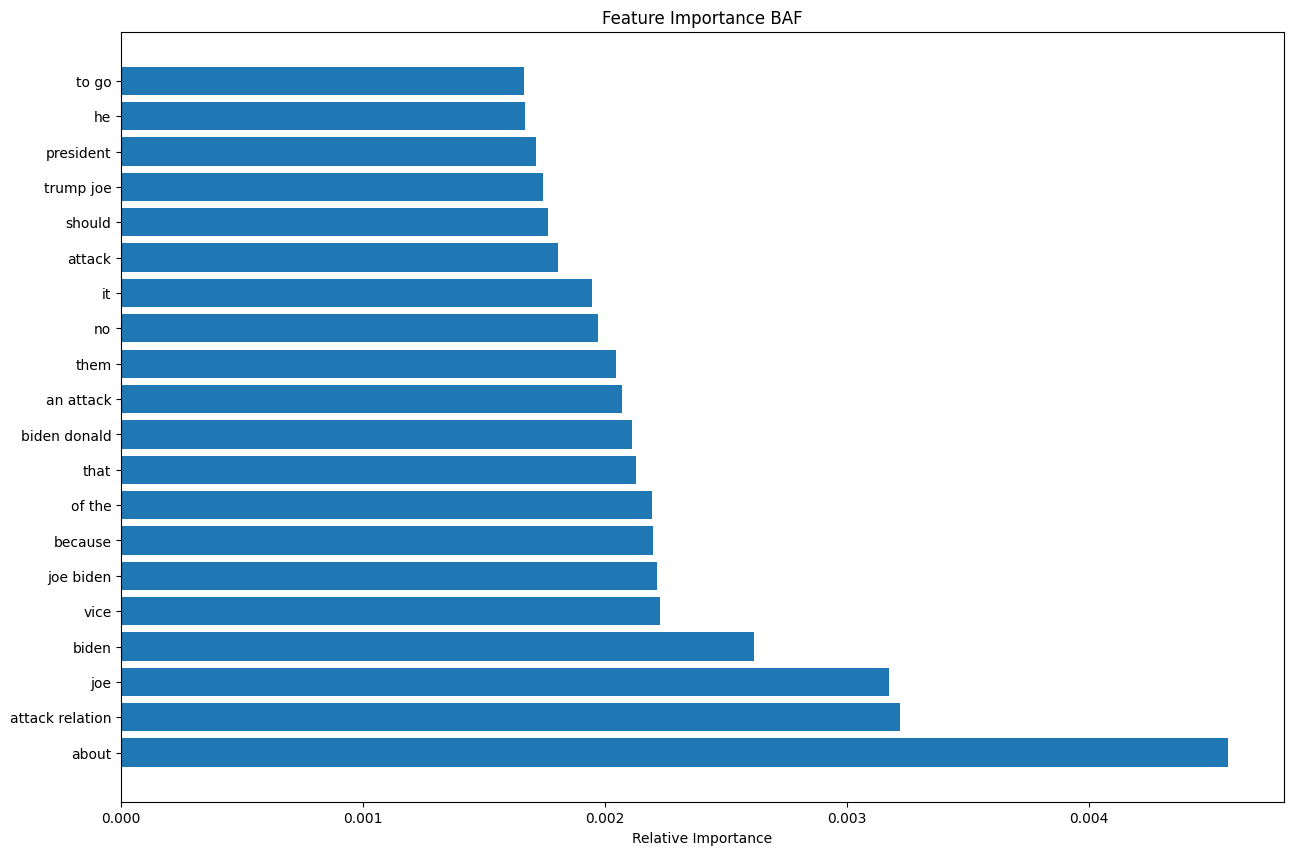

Results for k_fold = 8:
Mean Accuracy: 0.5319841675178754
Mean Precision: 0.4139960729341954
Mean Recall: 0.39224203514064193
Mean F1 Score: 0.389973463861779

Confusion Matrix:
 [[ 2  2 15]
 [ 2  4 12]
 [ 5  4 42]]


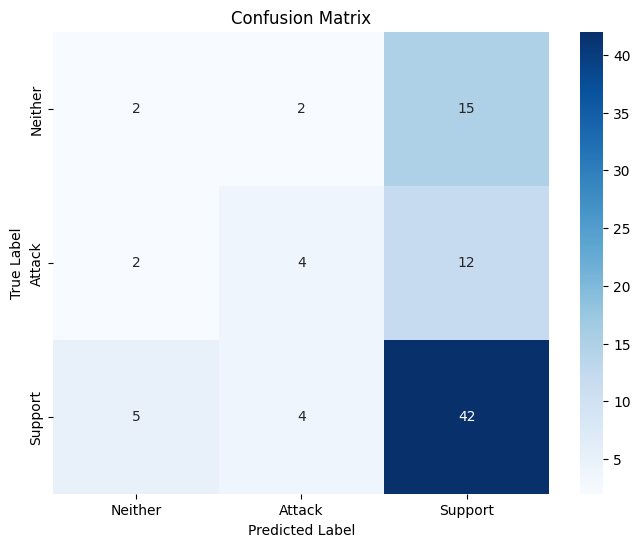

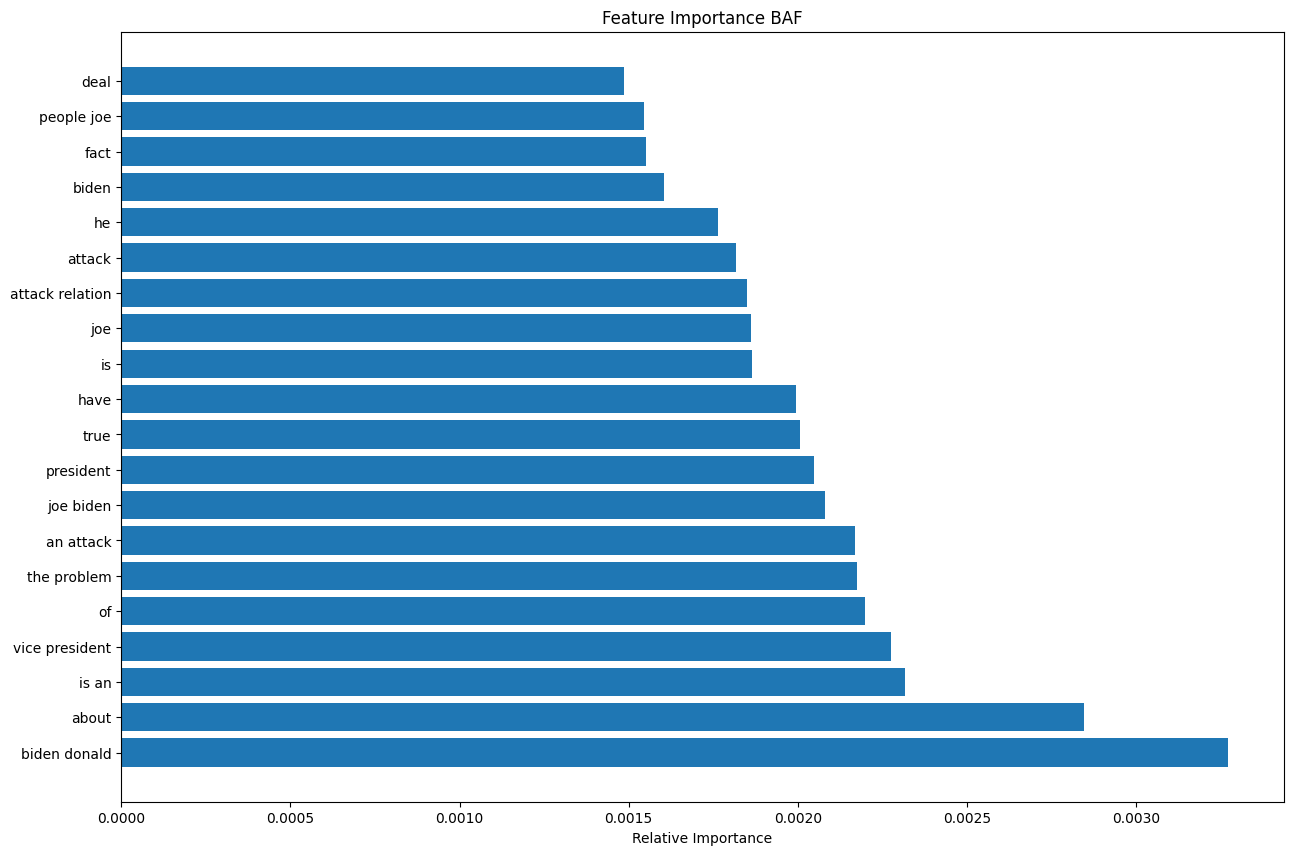

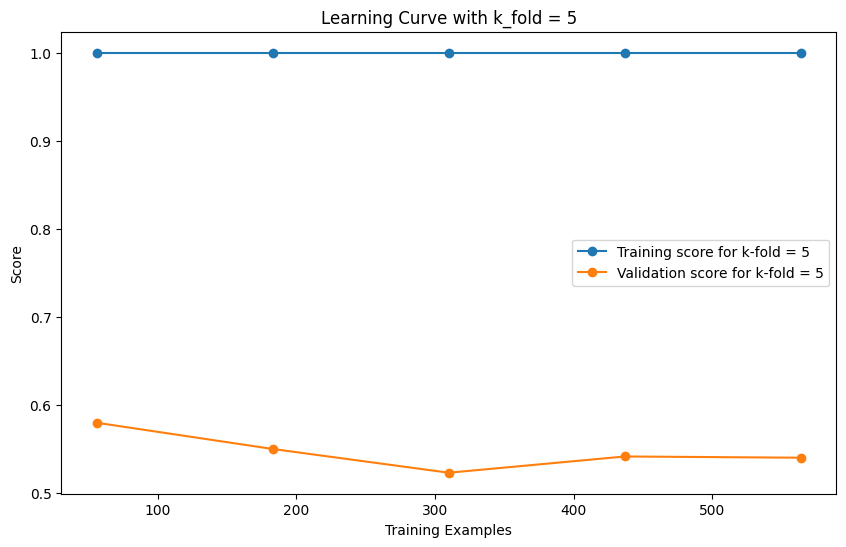

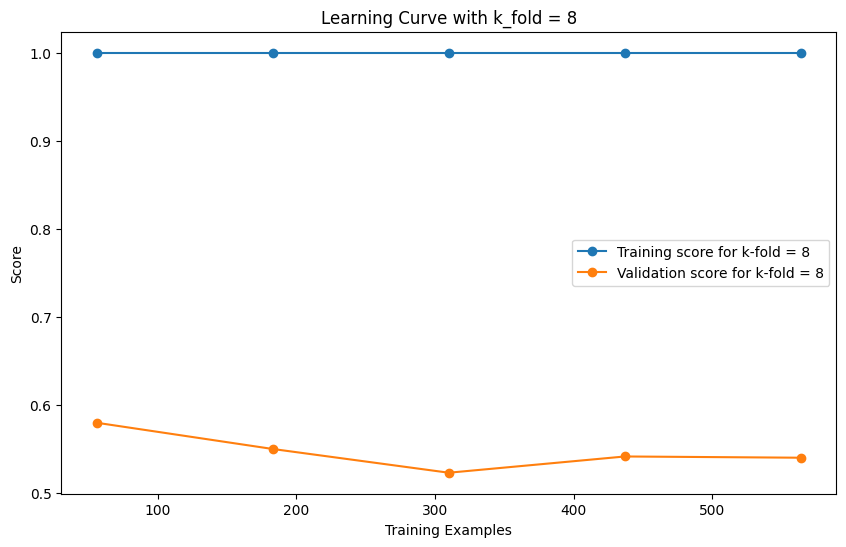

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.5319148936170213, 0.3998714982423029, 0.3839311718418389, 0.3791108940427594], [0.5319841675178754, 0.4139960729341954, 0.39224203514064193, 0.389973463861779]]


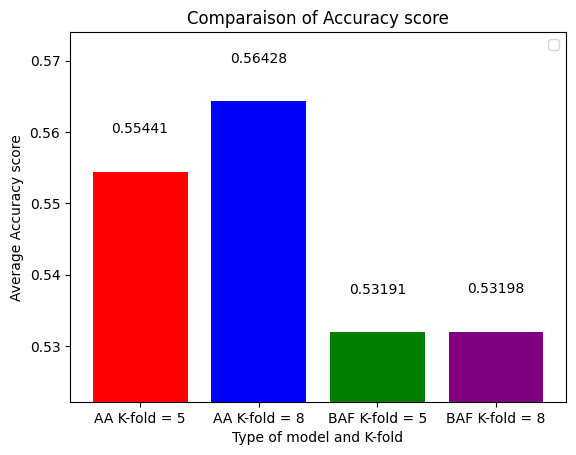

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


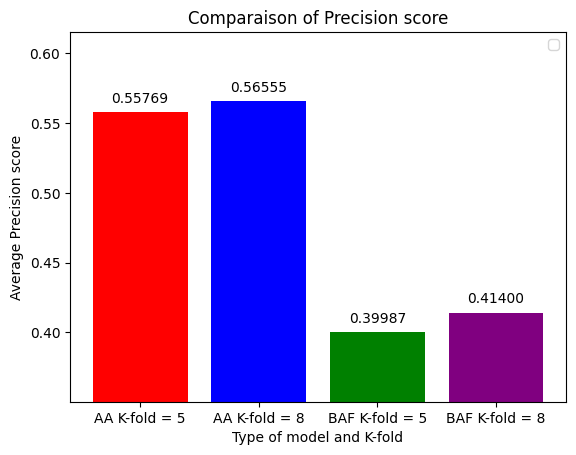

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


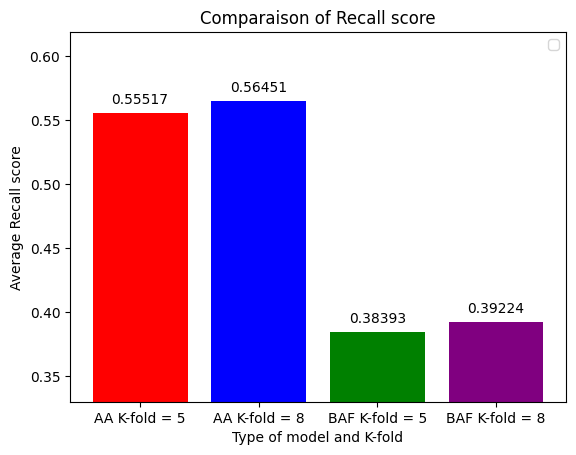

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


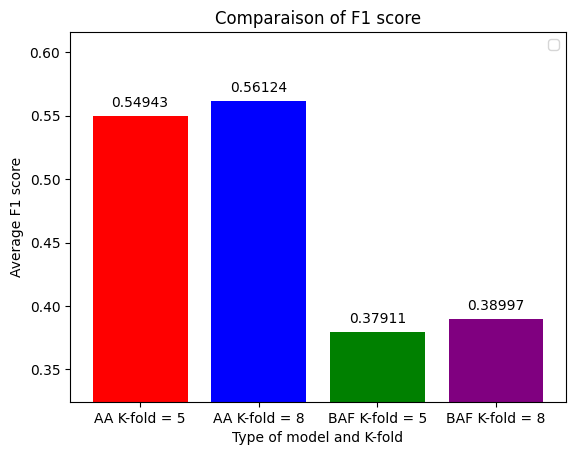

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Assuming X_baf and y_baf contain your text data and labels, respectively
minority_class_1_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 1]  # First minority class (e.g., Attack)
minority_class_2_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 2]  # Second minority class
majority_class_baf = [X_baf[i] for i in range(len(y_baf)) if y_baf[i] == 0]    # Dominant class (e.g., Non-Attack)

# Define the number of samples to match for the majority class
num_minority_class_1 = len(minority_class_1_baf)
num_minority_class_2 = len(minority_class_2_baf)
num_majority_class = min(num_minority_class_1, num_minority_class_2)  # Choose the smallest class size to balance

# Randomly sample from the majority class
undersampled_majority_class = random.sample(majority_class_baf, num_majority_class)

# Combine the undersampled majority class with minority classes
X_undersampled_baf = undersampled_majority_class + minority_class_1_baf + minority_class_2_baf
y_undersampled_baf = [0] * num_majority_class + [1] * len(minority_class_1_baf) + [2] * len(minority_class_2_baf)

# Shuffle the data
combined_baf = list(zip(X_undersampled_baf, y_undersampled_baf))
random.shuffle(combined_baf)
X_undersampled_baf, y_undersampled_baf = zip(*combined_baf)

y_baf = y_undersampled_baf

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer(max_df=0.95, ngram_range=(1, 2))
X_tf_baf = []
for ligne in X_undersampled_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result_baf = []
accu = 0
train_scores_mean_list_5_baf = []
train_scores_mean_list_8_baf = []
val_scores_mean_list_5_baf = []
val_scores_mean_list_8_baf = []
lab_5_baf = []
lab_8_baf = []

for k_fold in k_folds: 
    result_kfold_baf = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index_baf, test_index_baf in kf.split(X_tfidf_baf, y_baf):
        X_train_baf, X_test_baf = X_tfidf_baf[train_index_baf], X_tfidf_baf[test_index_baf]
        y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
    
        # Application de SMOTE sur les données d'entraînement
        smote_baf = SMOTE(random_state=42)
        X_train_resampled_baf, y_train_resampled_baf = smote_baf.fit_resample(X_train_baf, y_train_baf)

        # Create the decision tree model
        clf_baf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
        # Train the model
        clf_baf.fit(X_train_resampled_baf, y_train_resampled_baf)

        # Make predictions on the test set
        y_pred_baf = clf_baf.predict(X_test_baf)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test_baf, y_pred_baf))
        precisions.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        recalls.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))

    print(f"Results for k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold_baf.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_forest_baf.pkl', 'wb') as f:
            pickle.dump(vectorizer_baf, f)
        with open('classifier_forest_baf.pkl', 'wb') as f:
            pickle.dump(clf_baf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold_baf.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold_baf.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold_baf.append(np.mean(f1_scores))
    conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
    print("Confusion Matrix:\n", confusion_matrix(y_test_baf, y_pred_baf))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    train_sizes, train_scores, val_scores = learning_curve(clf_baf, X_tfidf_baf, y_baf, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
        
    if k_fold==5:
        train_scores_mean_list_5_baf.append(train_scores_mean)
        val_scores_mean_list_5_baf.append(val_scores_mean)
        lab_5_baf.append(f"for k-fold = {k_fold}")
    if k_fold==8:
        train_scores_mean_list_8_baf.append(train_scores_mean)
        val_scores_mean_list_8_baf.append(val_scores_mean)
        lab_8_baf.append(f"for k-fold = {k_fold}")
    
    # Extract feature names from the vectorizer
    feature_names_baf = vectorizer_baf.get_feature_names_out()

    # Plotting feature importance
    feature_importances_baf = clf_baf.feature_importances_
    indices_baf = np.argsort(feature_importances_baf)[::-1]
    names_baf = [vectorizer_baf.get_feature_names_out()[i] for i in indices_baf]
    
    plt.figure(figsize=(15, 10))
    plt.title("Feature Importance BAF")
    plt.barh(range(len(indices_baf[:20])), feature_importances_baf[indices_baf][:20], align='center')
    plt.yticks(range(len(indices_baf[:20])), [names_baf[i] for i in range(20)])
    plt.xlabel('Relative Importance')
    plt.show()
    
    result_baf.append(result_kfold_baf)

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_5_baf)):
    lab_train = "Training score " + lab_5_baf[i]
    lab_val = "Validation score "+ lab_5_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_5_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_5_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 5")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(train_scores_mean_list_8_baf)):
    lab_train = "Training score " + lab_8_baf[i]
    lab_val = "Validation score "+ lab_8_baf[i]
    plt.plot(train_sizes, train_scores_mean_list_8_baf[i], 'o-', label=lab_train)
    plt.plot(train_sizes, val_scores_mean_list_8_baf[i], 'o-', label=lab_val)
    
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve with k_fold = 8")
plt.legend(loc="best")
plt.show()

print(result_baf)   

result_5 = result[0]
result_8 = result[1]

result_baf_5 = result_baf[0]
result_baf_8 = result_baf[1]

metric = ['Accuracy','Precision','Recall','F1']
colors = ['red', 'blue', 'green', 'purple']

for i in range(len(metric)):
    x = ['AA K-fold = 5','AA K-fold = 8', 'BAF K-fold = 5','BAF K-fold = 8']

    y = [result_5[i],result_8[i],result_baf_5[i],result_baf_8[i]]
    # Tracer un graphique en barres avec des couleurs différentes
    bars = plt.bar(x, y, color=colors)
    
    # Ajouter les annotations au-dessus des barres
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.5f}', ha='center', va='bottom')
    
    ma=max(y)
    mi=min(y)
    h = (ma-mi)*0.3
    sup = ma + h
    inf = mi - h
    plt.ylim(inf,sup)
    plt.title(f'Comparaison of {metric[i]} score')
    plt.xlabel('Type of model and K-fold')
    plt.ylabel(f'Average {metric[i]} score')
    plt.legend()
    plt.show()


#### Normal

Results for sigmoid kernel with k_fold = 5:
Mean Accuracy: 0.8257142857142856
Mean Precision: 0.8038353803059686
Mean Recall: 0.7030769230769232
Mean F1 Score: 0.722580629247296

Confusion Matrix:
 [[12  0  0]
 [ 2  0  1]
 [ 2  1  2]]


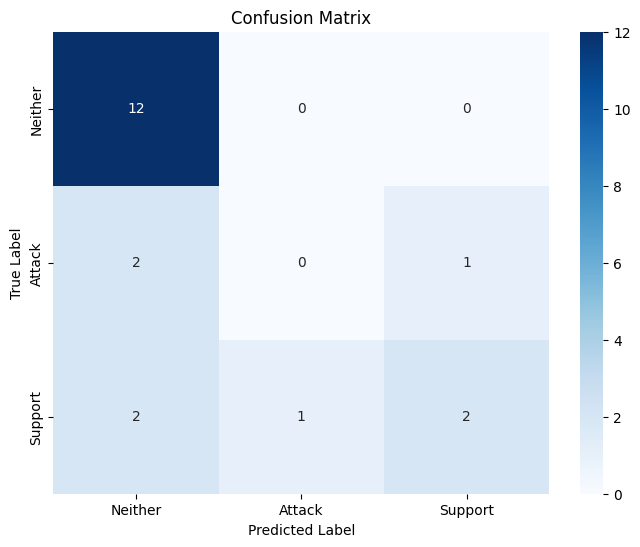

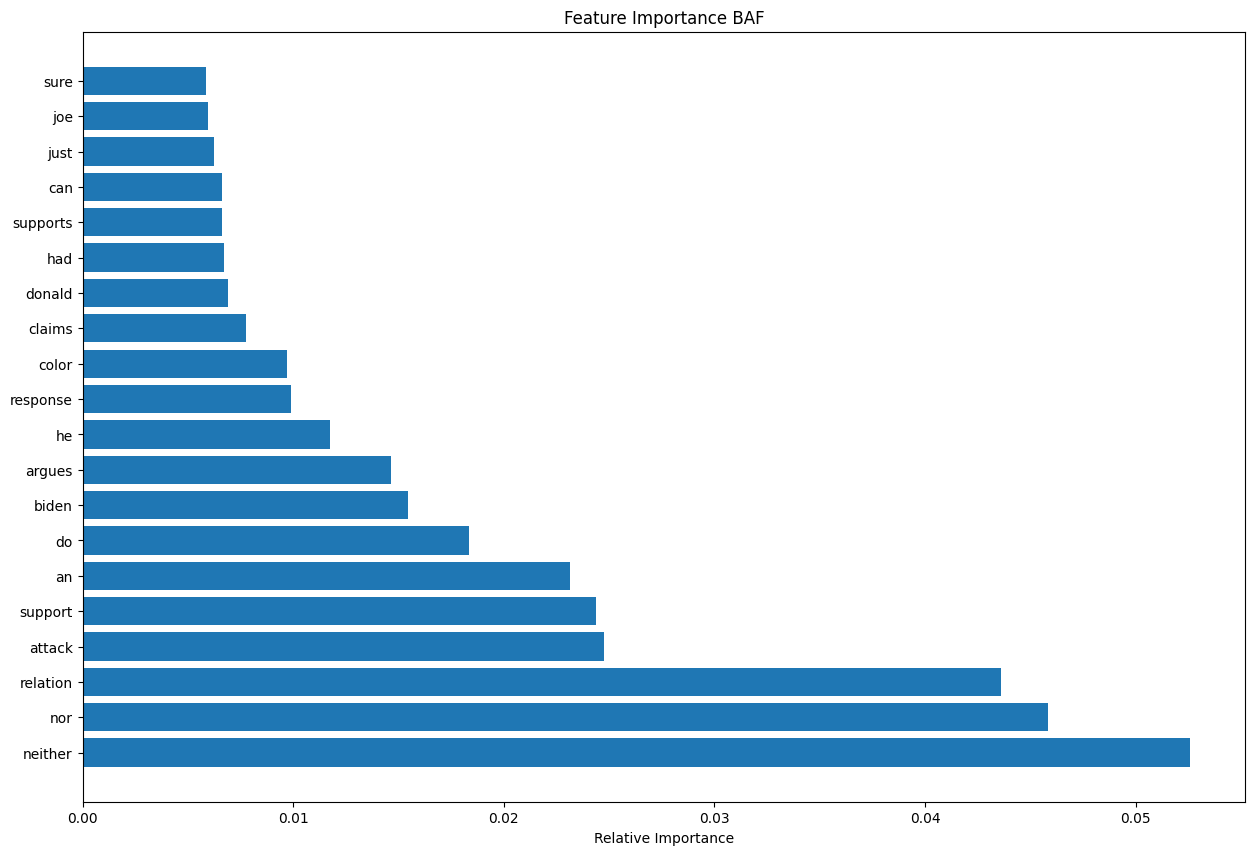

Results for sigmoid kernel with k_fold = 8:
Mean Accuracy: 0.875
Mean Precision: 0.9053902116402116
Mean Recall: 0.7847222222222222
Mean F1 Score: 0.787298669467787

Confusion Matrix:
 [[7 0 0]
 [1 1 0]
 [1 1 2]]


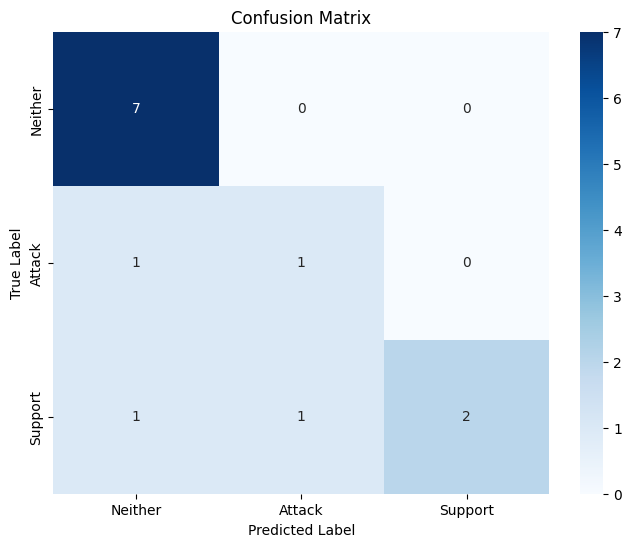

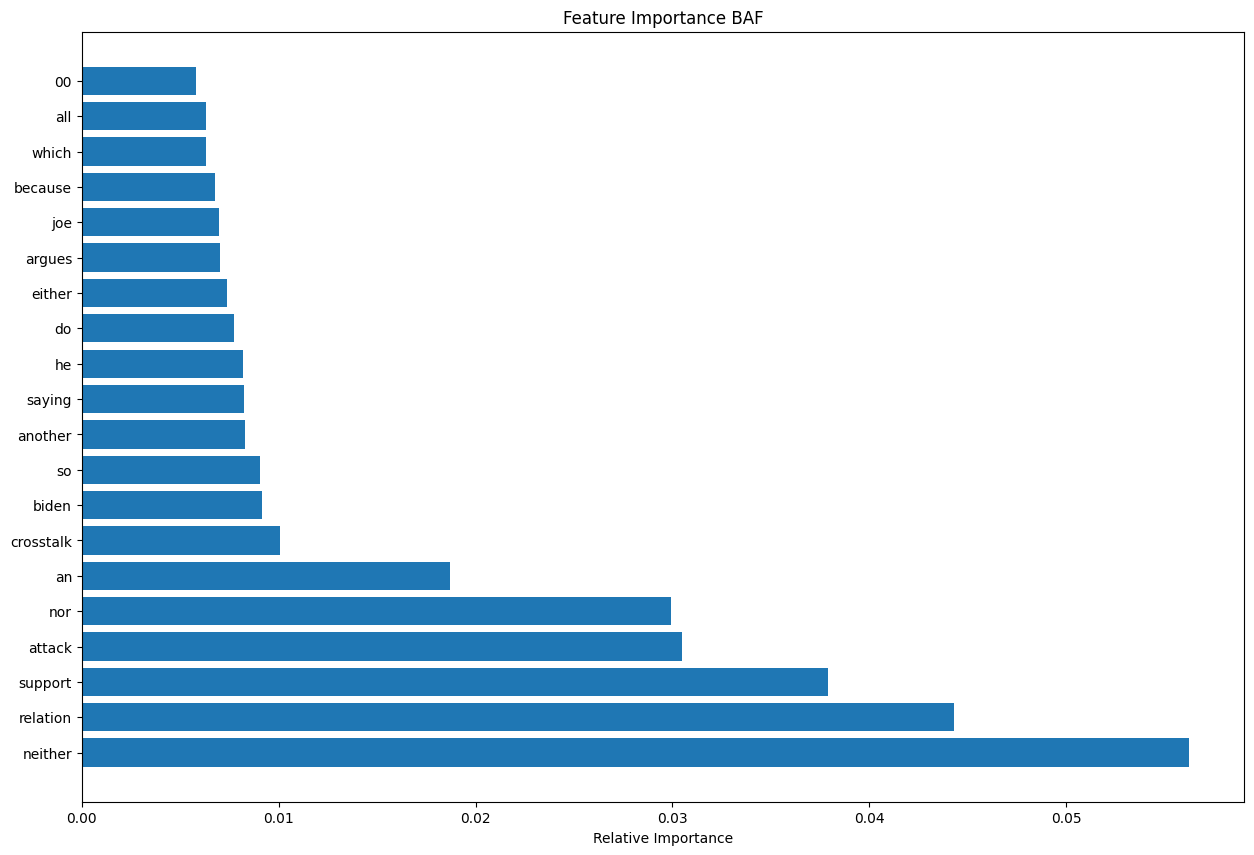

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.8257142857142856, 0.8038353803059686, 0.7030769230769232, 0.722580629247296], [0.875, 0.9053902116402116, 0.7847222222222222, 0.787298669467787]]


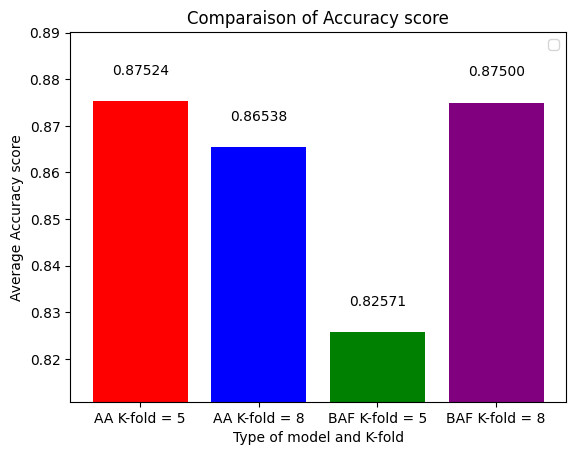

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


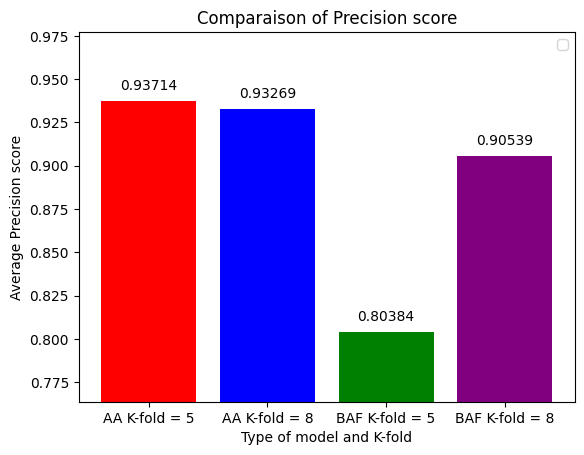

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


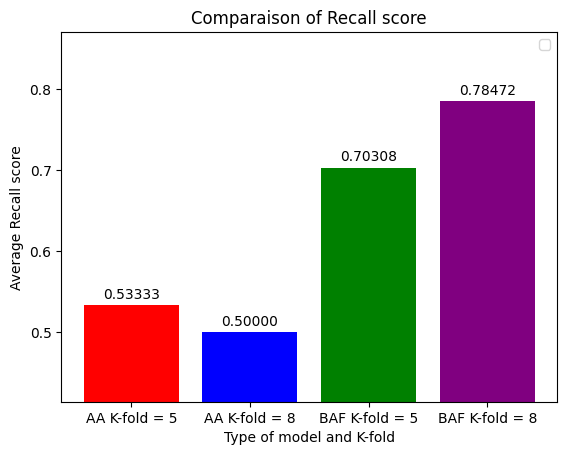

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


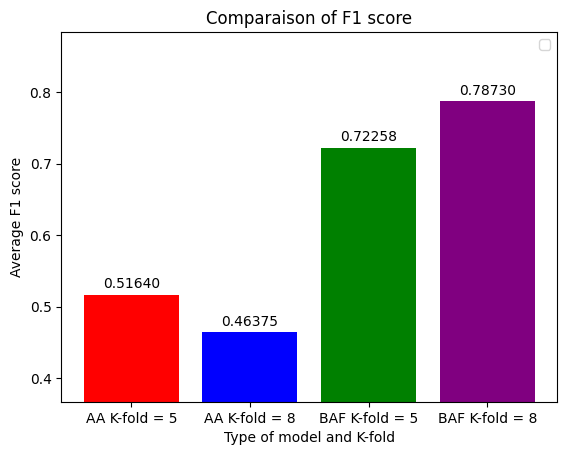

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle

X_baf = []
y_baf = []
for ligne in new_lignes:
    X_baf.append([ligne[0]]+ligne[2:])
    if ligne[1] == 'Attack' or ligne[1] == 'attack':
        y_baf.append(1)
    elif ligne[1] == 'Support' or ligne[1] == 'support':
        y_baf.append(2)
    else:  # if equal Neither
        y_baf.append(0)

# Convert the text data to numerical data using TF-IDF
vectorizer_baf = TfidfVectorizer()
X_tf_baf = []
for ligne in X_baf:
    new_l = " ".join(ligne) 
    X_tf_baf.append(new_l)

X_tfidf_baf = vectorizer_baf.fit_transform(X_tf_baf)

# Initialisation de StratifiedKFold
k_folds = [5,8]

result_baf = []
accu = 0

for k_fold in k_folds: 
    result_kfold_baf = []
    kf = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

     # Validation croisée
    for train_index_baf, test_index_baf in kf.split(X_tfidf_baf, y_baf):
        X_train_baf, X_test_baf = X_tfidf[train_index_baf], X_tfidf_baf[test_index_baf]
        y_train_baf, y_test_baf = np.array(y_baf)[train_index_baf], np.array(y_baf)[test_index_baf]
    
        # Application de SMOTE sur les données d'entraînement
        smote_baf = SMOTE(random_state=42)
        X_train_resampled_baf, y_train_resampled_baf = smote_baf.fit_resample(X_train_baf, y_train_baf)

        # Create the decision tree model
        clf_baf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
        # Train the model
        clf_baf.fit(X_train_resampled_baf, y_train_resampled_baf)

        # Make predictions on the test set
        y_pred_baf = clf_baf.predict(X_test_baf)

        # Calcul des métriques
        accuracies.append(accuracy_score(y_test_baf, y_pred_baf))
        precisions.append(precision_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        recalls.append(recall_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))
        f1_scores.append(f1_score(y_test_baf, y_pred_baf, average='macro', zero_division=1))

    print(f"Results for {kernel} kernel with k_fold = {k_fold}:")
    print(f"Mean Accuracy: {np.mean(accuracies)}")
    result_kfold_baf.append(np.mean(accuracies))
    if accu<np.mean(accuracies):
        # Save the vectorizer and classifier
        with open('vectorizer_forest_baf.pkl', 'wb') as f:
            pickle.dump(vectorizer_baf, f)
        with open('classifier_forest_baf.pkl', 'wb') as f:
            pickle.dump(clf_baf, f)
    print(f"Mean Precision: {np.mean(precisions)}")
    result_kfold_baf.append(np.mean(precisions))
    print(f"Mean Recall: {np.mean(recalls)}")
    result_kfold_baf.append(np.mean(recalls))
    print(f"Mean F1 Score: {np.mean(f1_scores)}\n")
    result_kfold_baf.append(np.mean(f1_scores))
    conf_matrix_baf = confusion_matrix(y_test_baf, y_pred_baf)
    print("Confusion Matrix:\n", confusion_matrix(y_test_baf, y_pred_baf))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_baf, annot=True, fmt='d', cmap='Blues', xticklabels=['Neither', 'Attack', 'Support'], yticklabels=['Neither', 'Attack', 'Support'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Extract feature names from the vectorizer
    feature_names_baf = vectorizer_baf.get_feature_names_out()

    # Plotting feature importance
    feature_importances_baf = clf_baf.feature_importances_
    indices_baf = np.argsort(feature_importances_baf)[::-1]
    names_baf = [vectorizer_baf.get_feature_names_out()[i] for i in indices_baf]
    
    plt.figure(figsize=(15, 10))
    plt.title("Feature Importance BAF")
    plt.barh(range(len(indices_baf[:20])), feature_importances_baf[indices_baf][:20], align='center')
    plt.yticks(range(len(indices_baf[:20])), [names_baf[i] for i in range(20)])
    plt.xlabel('Relative Importance')
    plt.show()
    
    result_baf.append(result_kfold_baf)
    
print(result_baf)   

result_5 = result[0]
result_8 = result[1]

result_baf_5 = result_baf[0]
result_baf_8 = result_baf[1]

metric = ['Accuracy','Precision','Recall','F1']
colors = ['red', 'blue', 'green', 'purple']

for i in range(len(metric)):
    x = ['AA K-fold = 5','AA K-fold = 8', 'BAF K-fold = 5','BAF K-fold = 8']

    y = [result_5[i],result_8[i],result_baf_5[i],result_baf_8[i]]
    # Tracer un graphique en barres avec des couleurs différentes
    bars = plt.bar(x, y, color=colors)
    
    # Ajouter les annotations au-dessus des barres
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.5f}', ha='center', va='bottom')
    
    ma=max(y)
    mi=min(y)
    h = (ma-mi)*0.3
    sup = ma + h
    inf = mi - h
    plt.ylim(inf,sup)
    plt.title(f'Comparaison of {metric[i]} score')
    plt.xlabel('Type of model and K-fold')
    plt.ylabel(f'Average {metric[i]} score')
    plt.legend()
    plt.show()


### Extraction

In [17]:
import random

# Load the vectorizer and classifier
with open('vectorizer_forest_baf.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('classifier_forest_baf.pkl', 'rb') as f:
    clf = pickle.load(f)


dataset  = "full_feature_extraction_dataset.csv"
with open(dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    op = 0 
    ap = 0
    predictions = [0]

    # Nom du fichier
    filename = "result_forest_baf.csv"

    # Écriture des données dans le fichier CSV
    with open(filename, mode='w', newline='') as file:
        file.write('_unit_id$,$pair_id$,$relation_gold$,$relation_gold_reason$,$context$,$sentence_1$,$sentence_2$,$speaker_1$,$speaker_2$,$topic\n')
        
        
        while ap < 100:
            op+=1
    
            indice = random.randint(1, len(lignes)-1)  # Génère un nombre entier entre 1 et len(lignes) inclus
            #print(f'indice:{indice}')
            topic = lignes[indice][5]
            context = []
            if topic != '':
                if indice-16 < 1:
                    n = indice - 1
                    l = 16-n
                    arr = indice + 16 + l
                    dep = 1
                elif indice+16 > len(lignes):
                    n = len(lignes)-indice
                    l = 16-n
                    dep = indice - 16 - l
                    arr = len(lignes)
                else:
                    arr = indice + 16
                    dep = indice - 16
                #print(f'dep:{dep}')
                if lignes[dep][5] != topic:
                    i=0
                    i1=0
                    while lignes[dep+i1][5] != topic:
                        i1=i1+1
                    dep = dep+i1
                    if arr+i1 > len(lignes): 
                        i = arr+i1 - len(lignes)
                        arr = len(lignes)
                    else:
                        arr = arr+i1
        
                    if lignes[arr][5] != topic and i == 0:
                        i2 = 0 
                        while lignes[arr-i2][5] != topic:
                            i2=i2+1
                        arr = arr + i2
                        if i1 == 0: 
                            while  lignes[dep][5] == topic and i2>0 and dep>0:
                                i2=i2-1
                                dep = dep-1
    
                if arr-dep < 32:
                    context = lignes[dep:arr]
                    for i in range(arr-dep):
                        context.append(['','','','','','','',''])
                else:
                    context = lignes[dep:arr]
    
            ia=0
            while ia < len(context) and context[ia] != lignes[indice]:
                ia= ia+1
            if ia < len(context)-1:
                indice2 = ia
                while indice2==ia:
                    indice2 = random.randint(ia, arr-dep -1)
                cont = {'speakers': [], 'phrases': []}
                for ligne in context:
                    if ligne != context[indice2] and ligne != context[ia]:
                        cont['speakers'].append(ligne[2])
                        cont['phrases'].append(ligne[1])
            
                X_new_brut = [' '.join(cont['speakers']) + ' ' + ' '.join(cont['phrases']) + ' ' + context[ia][1] + ' ' + context[indice2][1] + ' ' + context[ia][2] + ' ' + context[indice2][2] + ' ' + context[ia][5]]
            
                # Preprocess X to ensure each element is a string
                X_new = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_new_brut]
                
                # Convert the text data to numerical data using TF-IDF
                X_new_tfidf = vectorizer.transform(X_new)
            
            
                # Faire des prédictions sur les nouvelles données
                predictions = clf.predict(X_new_tfidf)
                if predictions[0] != 0 : 
                    ap+=1
                    if predictions[0] == 1 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Attack$,$This is an attack',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
                    elif predictions[0] == 2 : 
                        # Construire la chaîne de caractères
                        reco = '<,>'.join(f"{speaker}: {phrase}" for speaker, phrase in zip(cont['speakers'], cont['phrases']))
                        st = '$,$'.join([
                            '0$,$0$,$Support$,$This is a support',
                            reco.replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[indice2][1].replace("’","'").replace("[","/").replace("]","/").replace("…","...").replace("“","''").replace("”","''"),
                            context[ia][2],
                            context[indice2][2],
                            context[ia][5]
                        ])+ '\n'
                        file.write(st)
                        st = ''
        writer = csv.writer(file)
print('done')

done
